Todo: velká/malá!

In [2]:
import os
import re
import statistics
from src.najdi_rok import najdi_rok
import pandas as pd

In [3]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

In [4]:
df = pd.read_parquet("data/cnb_vyber.parquet")

In [5]:
df['rok'] = df["008"].apply(lambda x: najdi_rok(x))

In [6]:
df = df[df['rok'].notnull()]

In [7]:
df.columns

Index(['008', '020_a', '020_c', '020_q', '041_a', '041_h', '041_ind1', '044_a',
       '072_a', '072_x', '080_a', '100_4', '100_7', '100_a', '100_d', '240_l',
       '245_a', '245_c', '245_n', '245_p', '246_a', '250_a', '250_b', '260_a',
       '260_b', '260_c', '260_e', '260_f', '260_ind1', '264_a', '264_b',
       '264_c', '264_ind2', '300_a', '300_b', '300_c', '490_a', '490_v',
       '500_a', '521_a', '546_a', '648_a', '650_a', '650_x', '650_y', '650_z',
       '651_a', '653_a', '655_a', '700_4', '700_7', '700_a', '700_d', '710_4',
       '710_7', '710_a', '710_b', '830_a', '928_a', '964_a', 'leader', 'rok'],
      dtype='object')

In [8]:
df.sample(10)

,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader,rok
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nkc20193122857,190807s2019 xr acf e 000 0dcze d,[978-80-264-2560-1],"[Kč 499,00]",[(vázáno) :],[cze],[eng],1,None,[323],"[Vnitropolitický vývoj, politický život]","[32-051, 329.17-051, 323.285-021.332, 323.25/....",[aut],xx0239013,"Orbach, Dani,",1981-,Česky,Spiknutí proti Hitlerovi /,Danny Orbach ; překlad: Zdeněk Kubík,None,None,None,[1. vydání],None,None,None,None,None,None,None,[V Brně :],"[CPress,]",[2019],[1],"[404 stran, 4 nečíslované strany obrazových př...","[ilustrace, portréty ;]",[24 cm],None,None,"[Přeloženo z angličtiny, Obálkový podnázev: př...",None,None,"[1933-1945, 20. století]","[politici, nacisté, pokusy o atentát, protifaš...",None,"[20. století, 20. století, 1933-1945, 1933-194...","[Německo, Německo, Německo, Německo, Germany, ...",None,None,"[literatura faktu, non-fiction]",[trl],[hka2015886846],"[Kubík, Zdeněk,]",[1976-],None,None,None,None,None,[Albatros Media - CPress],None,cam a22 i 4500,2019.0
cpk19960116904,961105s1996 xr a e p 000 0 cze,[80-7184-121-8],"[Kč 82,00]",[(brož.) :],None,None,None,None,"[616, 37.016]","[Patologie. Klinická medicína, Učební osnovy. ...","[616.1/.6, (075.8), 616.1, 616.2]",[aut],jk01060408,"Klener, Pavel,",1937-2024,None,Základy vnitřního lékařství pro bakalářské stu...,Pavel Klener a kolektiv,None,None,None,[1. vyd.],None,[Praha :],"[Karolinum,]",[1996],None,None,None,None,None,None,None,[170 s. :],[il. ;],[21 cm],None,None,"[Tab., 500 výt., Vydavatel: Univerzita Karlova]",[Určeno pro posl. 1. lékařské fak. Univ. Karlovy],None,None,[vnitřní lékařství],None,None,None,None,None,[učebnice vysokých škol],None,None,None,None,None,[kn20010710036],[Univerzita Karlova],None,None,None,None,nam a22 a 4500,1996.0
bkn20010573918,000131s1911 xr ||| | cze,None,None,None,[cze],[ukr],1,None,None,None,None,[aut],js2008489203,"Jackìv, Mychajlo,",1873-1961,None,Hořčičné zrno /,Mychajlo Jackiv ; z ukrajinštiny přeložil a úv...,None,None,None,None,None,[V Praze :],"[J. Otto,]",[[1911]],None,[(Unie)],None,None,None,None,None,"[175, [I] s. ;]",None,[15 cm],[Světová knihovna ;],[č. 899-900],None,None,None,None,None,None,None,None,None,None,None,[aui],[jk01033385],"[Handzel, Karel,]",[1885-1948],None,None,None,None,[Světová knihovna (J. Otto)],None,None,nam a22 1 4500,1911.0
bk194604848,980911s1946 xr g 000 f cze,None,None,[(Váz.)],[cze],[ger],1,None,[821.112.2-3],"[Německá próza, německy psaná]","[821.112.2-31, (0:82-31)]",[aut],jn19981002244,"Traven, B.,",1890-1969,Česky,Carreta =,B. Traven ; [z německého originálu přeložila J...,None,None,[Karren],[Vyd. 1.],None,[Praha :],"[V. Škubal,]",[1946],None,None,None,None,None,None,None,[265 s. ;],None,[20 cm],None,None,None,None,None,None,None,None,None,None,None,None,[německy psané romány],[trl],[jk01141479],"[Vaněčková, Jiřina]",None,None,None,None,None,None,None,None,nam a22 4500,1946.0
bk195203004,980408s1952 xr a 0|0 0 cze,None,None,[(Váz.)],None,None,None,None,None,None,None,[ill],jk01010178,"Aleš, Mikoláš,",1852-1913,None,Vlast /,Mikoláš Aleš ; S textem Antonína Matějčka: Alš...,None,None,None,[1. vyd.],None,[Praha :],"[Orbis,]",[1952],None,[(Orbis 1)],None,None,None,None,None,"[70, [6] s. :]","[[8], 115 s. obr. příl. [4] barev. obr. příl. ;]",[4°],"[Aleš, Mikoláš: Dílo ;]",[Sv. 1],"[Odkazy na lit., Vysvětl. k obr., 7700 výt.]",None,None,None,None,None,None,None,None,None,None,"[aui, edt, aui, aut]","[jk01081400, jk01122126, jk01121937, jk01080629]","[Míčko, Miroslav,, Svobodová-Alšová, Maryna,, ...","[1912-1970, 1882-1973, 1883-1967, 1889-1950]",None,None,None,None,"[Aleš, Mikoláš: Dílo]",None,"[Aleš, Mik

In [69]:
petdvanula = pd.read_parquet("data/cnb_sloupce/520.parquet")

In [77]:
df = df.join(petdvanula[['520_a']], how='left')

In [79]:
df

,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader,rok,520_a
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
68868,010202s2000 xr a 000 0 cze d,[80-238-3703-6],None,None,None,None,None,None,None,None,"[36, 577.3, 504, 55, 577.4, 615.849.2]",None,None,None,None,None,Principy a praxe radiační ochrany /,kolektiv autorů ; editor Vladislav Klener,None,None,None,[[1. vyd.]],None,[Praha :],"[Státní úřad pro jadernou bezpečnost,]",[2000],None,None,None,None,None,None,None,[619 s. :],[il.],None,None,None,[Vydal Azin CZ pro Státní úřad pro jadernou be...,None,None,None,"[RADIAČNÍ OCHRANA, RADIAČNÍ OCHRANA /záření/, ...",None,None,None,[zeměkoule],None,"[příručky, texty]",[edt],[nlk19990073367],"[Klener, Vladislav,]",[1927-],None,None,None,None,None,[Azin CZ],None,nam a22 a 4500,2000.0,NaN
angl01291,930610s1948 xr e d 00| 0 cze,None,None,[(Váz.)],"[cze, eng]",None,1,None,"[796, 81]","[Sport. Hry. Tělesná cvičení, Lingvistika. Jaz...","[796.034.2, 796/799, 811.162.3, 811.111, 81'37...",[com],None,"Prokeš, Miroslav",None,None,Stručný česko-anglický a anglicko-český slovní...,"sestavili Miroslav Prokeš, Jarmila Prokšová-Ev...",None,None,[Concise Czech-English and English-Czech dicti...,None,None,[[Praha] :],"[Min. školství a osvěty,]",[1948],None,None,None,None,None,None,None,[168 s. ;],None,[8°],[Knihovna tělesné výchovy MŠO ;],[8],None,None,None,None,"[tělovýchova, sport, čeština, angličtina, obor...",None,None,None,None,None,[dvojjazyčné překladové slovníky],[com],[jk01101346],"[Prokšová-Ewaldová, Jarmila,]",[1900-1989],None,None,None,None,[Knihovna tělesné výchovy MŠO],None,None,nam a22 4500,1948.0,NaN
angl01627a,931001s1991 xr 000 0 cze,None,None,[(Brož.)],"[cze, eng]",None,0,None,None,None,[801.32],[aut],None,"Mulač, Viktor",None,None,Česko-anglický slovník ;,[zpracoval Viktor Mulač a kolektiv],None,None,"[Czech English dictionary, English Czech dicti...",None,None,[[Praha] :],"[BonArt,]",[1991],None,None,None,None,None,None,None,[161; 185 s. ;],None,[15 cm],None,None,[Anglicko-český slovník tištěn zvratmo],None,None,None,[Angličtina-čeština-slovníky],None,None,None,None,"[slovníky anglicko-české, slovníky česko-angli...",None,None,None,None,None,None,None,None,None,None,None,"[Angličtina - čeština - slovníky, Čeština - an...",nam a22 a 4500,1991.0,NaN
bk190000512,980311s1961 xr af e | 000 0 cze,None,None,[(Brožováno)],None,None,None,None,[614],[Veřejné zdraví a hygiena],"[614.2:725.511, (437.319), (082)]",None,None,None,None,None,50 let písecké nemocnice,None,None,None,[50 let nemocnice v Písku],None,None,None,None,None,None,None,None,[Písek :],"[OÚNZ,]",[1961],[1],"[45 stran, 20 nečíslovaných stran obrazových p...",[ilustrace ;],[21 cm],None,None,[750 výtisků],None,None,None,[nemocnice],None,[20. století],[Česko],[Písek (Česko)],None,[sborníky],None,None,None,None,None,None,None,None,None,None,None,nam a22 1i 4500,1961.0,NaN
bk190900003,981116s1957 xr a 000 cze,None,"[Kčs 6,90]",[(Brož.) :],[cze],[ger],1,None,None,None,None,[aut],jn19990002507,"Fühmann, Franz,",1922-1984,None,Proměna :,Franz Fühmann ; z německého originálu ... přel...,None,None,None,[1. vyd.],None,[Praha :],"[Naše vojsko,]",[1957],None,None,None,None,None,None,None,"[65, [ii] s. :]",[il. ;],[21 cm],None,None,"[Název originálu: Die Fahrt nach Stalingrad, 1...",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Poemy],nam a22 1 4500,1957.0,[Německý pokrokový básník řeší ve své poemě os...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [9]:
df['650_x'].sample(50)

001
cpk19950116101                                                  None
cpk20041416317                                                  None
bk194904054                                                     None
bk194102918                                                     None
nkc20071782173                                                  None
bk195501576                                                     None
nkc20243644459                                                  None
nkc20112172105                                                  None
np9305735                                                       None
cpk20021179931                                                  None
bk197504241                                                     None
nkc20081824176                                                  None
cpk20000970697                                                  None
nos190235215001                                                 None
bk198203440                   

In [81]:
df3 = df[['rok','072_x','245_a','245_c','520_a','650_a','653_a','655_a','964_a']].sort_values(by='rok')

In [83]:
df3.explode('072_x').groupby('072_x').size().nlargest(30)

072_x
Učební osnovy. Vyučovací předměty. Učebnice               53105
Česká próza                                               44071
Literatura pro děti a mládež (beletrie)                   37722
Biografie                                                 25669
Americká próza                                            18981
Anglická próza, anglicky psaná                            16337
Česká poezie                                              16087
Milostná, dobrodružná, fantastická próza                  15830
Literatura pro děti a mládež (naučná)                     13669
Sport. Hry. Tělesná cvičení                                7522
Dějiny Česka a Slovenska                                   7496
Patologie. Klinická medicína                               7204
Kuchařství. Potraviny. Vařená jídla                        6321
Německá próza, německy psaná                               6016
Architektura                                               5953
Vojenství. Obrana země. Ozbrojené 

In [84]:
df3.explode('653_a').groupby('653_a').size().nlargest(30)

653_a
Česká republika            692
sčítání obyvatelstva       670
sčítání bytů               581
sčítání domácností         578
sčítání domů               572
Československo             440
česká próza                380
dějiny                     379
denní četba                317
česká poezie               281
demografická statistika    259
jazyková úroveň A2         205
stol. 20., léta 90.        198
křesťanský život           188
čeština jako cizí jazyk    188
jazyková úroveň A1         186
sídelní jednotky           178
světová válka 2.           176
čeština                    173
matematika                 162
duchovní život             141
jazyková úroveň B1         139
české země                 137
politický vývoj            132
vlastivěda                 121
české pohádky              118
obce                       110
česká literatura           110
základní školy             105
firmy                      100
dtype: int64

In [85]:
df3.explode('650_a').groupby('650_a').size().nlargest(30)

650_a
čeština                            8328
Czech language                     6382
druhá světová válka (1939-1945)    4890
World War (1939-1945)              3771
matematika                         3618
křesťanský život                   3544
biblické citáty                    3335
angličtina                         2781
Christian life                     2769
Biblical quotations                2768
oborová terminologie               2611
mathematics                        2575
každodenní život                   2522
kultura a společnost               2495
čeští spisovatelé                  2480
česká literatura                   2432
Bůh a člověk                       2410
sebepoznání                        2351
fauna                              2315
everyday life                      2279
účetnictví                         2255
management                         2211
cesty a pobyt                      2207
architektonické památky            2186
české malířství                   

In [158]:
tema_poprve = df3.explode('650_a').groupby('650_a')['rok'].min()
tema_valikost = df3.explode('650_a').groupby('650_a').size()

In [159]:
porevoluci = tema_poprve[tema_poprve > 1989].index.to_list()
porevoluci

['"normalization" (1969-1989 : Czechoslovakia)',
 '"normalization", Czechoslovakia, 1968-1989',
 '"normalization", Czechoslovakia, 1969-1989',
 "'ndrangheta",
 '1. ročník ZŠ',
 '131 (locomotives)',
 '131 (lokomotivy)',
 '141 (locomotives)',
 '141 (lokomotivy)',
 '16. stol.',
 '1919-1993',
 '1993-1999',
 '2-chlorodeoxyadenosin',
 '2. ročník ZŠ',
 '21. století',
 '360-degree feedback',
 '360stupňová zpětná vazba',
 '363 (locomotives)',
 '363 (lokomotivy)',
 '387.0 (lokomotivy)',
 '3D Studio 4.0',
 '3D Studio 4.0 (software)',
 '3D Studio MAX',
 '3D Studio MAX (computer file)',
 '3D Studio MAX (software)',
 '3D Studio MAX 2',
 '3D Studio MAX 2 (software)',
 '3D Studio MAX 3',
 '3D Studio MAX 3 (software)',
 '3D Studio MAX 4',
 '3D Studio MAX 4 (software)',
 '3D Studio MAX 5 (software)',
 '3D Studio MAX 6',
 '3D Studio MAX 6 (software)',
 '3D Studio MAX 7',
 '3D Studio MAX 7 (software)',
 '3D Studio MAX 8',
 '3D Studio MAX 8 (software)',
 '3D Studio VIZ',
 '3D Studio VIZ (software)',
 '3D S

In [162]:
temata_650 = df3.explode('650_a')
pozdejsi = tema_poprve[tema_poprve >= 1945].index.to_list()
vetsi = tema_valikost[tema_valikost >= 10].index.to_list()

In [163]:
poletech = []
for rok in range(1945,2024):
    rocnik = {}
    tehdy_poprve = tema_poprve[tema_poprve == rok].index.to_list()
    nejvetsi_tehdejsi = temata_650[temata_650['650_a'].isin(tehdy_poprve)].groupby('650_a').size().nlargest(1).index.to_list()[0]
    rocnik['rok'] = rok
    rocnik['nejvetsi'] = nejvetsi_tehdejsi
    poletech.append(rocnik)

In [164]:
pd.DataFrame(poletech)

,rok,nejvetsi
0,1945,concentration camps
1,1946,holocaust (1939-1945)
2,1947,preschool children
3,1948,soccer
4,1949,finanční management
5,1950,odborné předměty
6,1951,educational programs
7,1952,hlavolamy
8,1953,výpočetní technika
9,1954,animal training


In [165]:
tema_poprve2 = df3.explode('072_x').groupby('072_x')['rok'].min()

In [166]:
temata_072 = df3.explode('072_x')

In [167]:
poletech = []
for rok in range(1945,2024):
    rocnik = {}
    rocnik['rok'] = rok
    tehdy_poprve = tema_poprve2[tema_poprve2 == rok].index.to_list()
    try:
        nejvetsi_tehdejsi = temata_072[temata_072['072_x'].isin(tehdy_poprve)].groupby('072_x').size().nlargest(1).index.to_list()[0]
        rocnik['nejvetsi'] = nejvetsi_tehdejsi
    except:
        rocnik['nejvetsi'] = None
    poletech.append(rocnik)

In [168]:
pd.DataFrame(poletech)

,rok,nejvetsi
0,1945,Italská literatura
1,1946,None
2,1947,None
3,1948,None
4,1949,Automatizační a řídicí technika
5,1950,Biotechnologie. Genetické inženýrství
6,1951,Jaderná technika
7,1952,None
8,1953,Sino-tibetské literatury (o nich)
9,1954,Počítače. Hardware


In [169]:
temata_650[temata_650['650_a'].isin(porevoluci)].groupby('650_a').size().nlargest(50)

650_a
channeling                          891
programs and projects               801
regional development                695
positive thinking                   636
special education                   611
sustainable development             569
environmental education             546
counting                            538
communication skills                532
educational projects                521
historical postcards                516
personnel management                512
e-learning                          511
social service                      496
internet                            467
evropské právo                      459
integrovaná výchova a vzdělávání    433
dinosauři                           430
European law                        427
people with disabilities            425
tourism                             418
dinosaurs                           411
integrated education                402
Internet                            393
globalizace                       

In [170]:
temata_650[(temata_650['650_a'].isin(pozdejsi)) & (temata_650['650_a'].isin(vetsi))]

,rok,072_x,245_a,245_c,520_a,650_a,653_a,655_a,964_a
001,,,,,,,,,
nkc20193077029,1945.0,"[Vnitropolitický vývoj, politický život]",Sedmnáctý listopad v Ruzyni /,k vzpomínkové pouti do Ruzyně v rámci Mezináro...,NaN,oběti nacismu,None,[příležitostné texty],None
nkc20193077029,1945.0,"[Vnitropolitický vývoj, politický život]",Sedmnáctý listopad v Ruzyni /,k vzpomínkové pouti do Ruzyně v rámci Mezináro...,NaN,nacistická perzekuce,None,[příležitostné texty],None
nkc20243633341,1945.0,"[Vnitropolitický vývoj, politický život]",Plzeň 28.X.1945,None,NaN,státní svátky,None,[brožury],None
bk194601484,1945.0,[Literatura. Literární život],Národ se bránil :,Albert Pražák,NaN,jazyk a literatura,None,"[pojednání, essays]",None
bk194601484,1945.0,[Literatura. Literární život],Národ se bránil :,Albert Pražák,NaN,"language, culture and society",None,"[pojednání, essays]",None
...,...,...,...,...,...,...,...,...,...
nkc20243644862,2025.0,[Vývojová psychologie. Individuální psychologie],Jak nevyhořet a zůstat nad věcí :,Christina Hillesheim ; překlad Lenka Dvorská,NaN,psychic crisis,None,"[příručky, handbooks and manuals]",None
nkc20243644862,2025.0,[Vývojová psychologie. Individuální psychologie],Jak nevyhořet a zůstat nad věcí :,Christina Hillesheim ; překlad Lenka Dvorská,NaN,stress management,None,"[příručky, handbooks and manuals]",None
nkc20243644862,2025.0,[Vývojová psychologie. Individuální psychologie],Jak nevyhořet a zůstat nad věcí :,Christina Hillesheim ; překlad Lenka Dvorská,NaN,relaxation,None,"[příručky, handbooks and manuals]",None


In [171]:
temata_650.groupby('650_a')['rok'].min().sort_values()

650_a
folk culture                           1900.0
heraldika                              1900.0
literární místopis                     1900.0
vodní cesty                            1900.0
vodní doprava                          1900.0
                                        ...  
jednotné environmentální stanovisko    2024.0
associations of bibliophiles           2024.0
posvátný prostor                       2024.0
fine motor skills                      2024.0
scleroderma                            2024.0
Name: rok, Length: 66133, dtype: float64

In [172]:
df3.explode('650_a').groupby('650_a')['rok'].min()

650_a
"normalization" (1969-1989 : Czechoslovakia)    1990.0
"normalization", Czechoslovakia, 1968-1989      2002.0
"normalization", Czechoslovakia, 1969-1989      1995.0
'ndrangheta                                     2010.0
1. ročník ZŠ                                    1996.0
                                                 ...  
žíla rudní                                      1978.0
žíly                                            2009.0
žíly dolních končetin                           1957.0
žížalovití                                      2011.0
žížaly                                          2002.0
Name: rok, Length: 66133, dtype: float64

In [173]:
df3.explode('964_a').groupby('964_a').size().nlargest(20)

964_a
Pohádky                                          394
Básně                                            315
Praha - výstavy výtvarné                         292
Kuchařky (knihy)                                 290
Bibliofilie (tisky)                              195
Hry divadelní                                    187
Veselohry                                        174
Pohádky moderní                                  172
Povídky                                          155
Pohádky české                                    141
Matematika vyšší - učebnice vysokoškol.          135
Fyzika - učebnice vysokoškol.                    134
Podniky průmyslové - dějiny                      134
Básně lyrické                                    131
Hry loutkové                                     125
Brno - výstavy výtvarné                          116
pohádky české - publikace pro děti               107
Geometrie deskriptivní - učebnice vysokoškol.     94
Chemie anorganická - učebnice vysokoškol

In [174]:
df2 = df[['rok','072_x','245_a','245_c','520_a','650_a','653_a','655_a','964_a']].astype(str).sort_values(by='rok')

In [175]:
df2['rok'] = pd.to_numeric(df2['rok'])

In [176]:
def r(frejm):
    return frejm.groupby('rok').size().reindex([x for x in range(1900,2025)]).fillna(0).plot.bar(figsize=(25,5))

In [177]:
df2['rok'].iloc[0]

1900.0

In [178]:
df2

,rok,072_x,245_a,245_c,520_a,650_a,653_a,655_a,964_a
001,,,,,,,,,
nkc20091853241,1900.0,['Filologie'],Odpověd V. Flajšhansa :,None,nan,['filologie'],None,['polemiky' 'články'],None
bknbau03929,1900.0,['Světové dějiny'],Kronika politických a kulturních událostí v ro...,sestavil. Antonín Jul. Grégr,nan,['události' 'světová politika' 'kultura a spol...,None,['chronologické přehledy'],None
bknjaj18050,1900.0,['Dějiny Česka a Slovenska'],O počátcích dějin zemí českých /,Lubor Niederle,nan,None,None,['studie'],None
bknban00074,1900.0,['Dějiny Česka a Slovenska'],Slovo o židech /,sepsal Karel Adámek,nan,['Židé'],None,['pojednání'],None
cpk20041298330,1900.0,"['Křesťanské církve, sekty, denominace'\n 'Lit...",Upomínka na den konfirmace /,uspořádal G. Ad. Skalský,nan,['evangelická víra' 'křesťanský život'],None,['publikace pro mládež'],None
...,...,...,...,...,...,...,...,...,...
nkc20243653613,2025.0,['Česká poezie'],Ptačí rok :,ilustrovala Veronika Zubíková ; básně vybral a...,"['Exkluzivní publikace, kterou můžete využívat...",['česká poezie' 'ptáci' 'Czech poetry' 'birds'],None,['česká poezie' 'antologie' 'diáře' 'Czech poe...,None
nkc20243595343,2025.0,['Architektura'],Fotografova hřbitovní překvapení /,Richard Ulman,nan,['náhrobky' 'hroby' 'umělecká výzdoba' 'tombst...,None,['fotografické publikace' 'photographical works'],None
nkc20243644862,2025.0,['Vývojová psychologie. Individuální psycholog...,Jak nevyhořet a zůstat nad věcí :,Christina Hillesheim ; překlad Lenka Dvorská,nan,['psychická krize' 'sebepoznání' 'zvládání str...,None,['příručky' 'handbooks and manuals'],None


<Axes: xlabel='rok'>

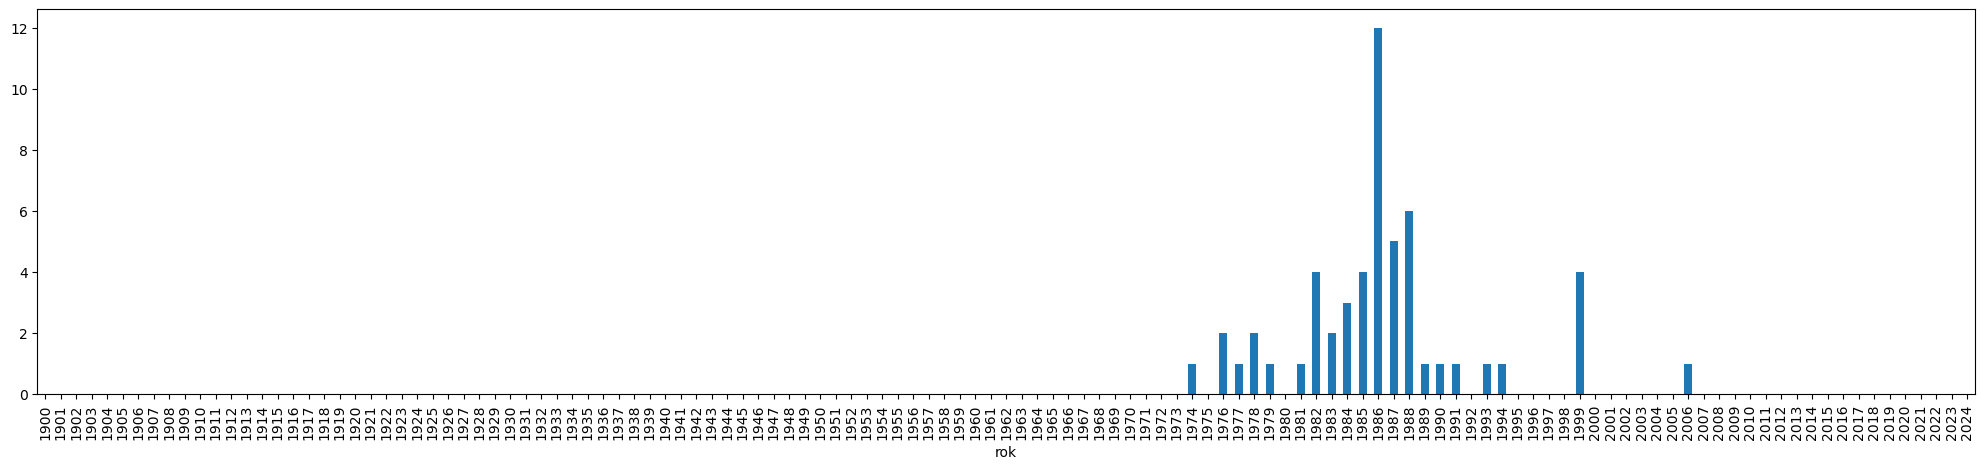

In [179]:
r(df2[df2.apply(lambda row: any("BASIC" in str(value) for value in row), axis=1)])

<Axes: xlabel='rok'>

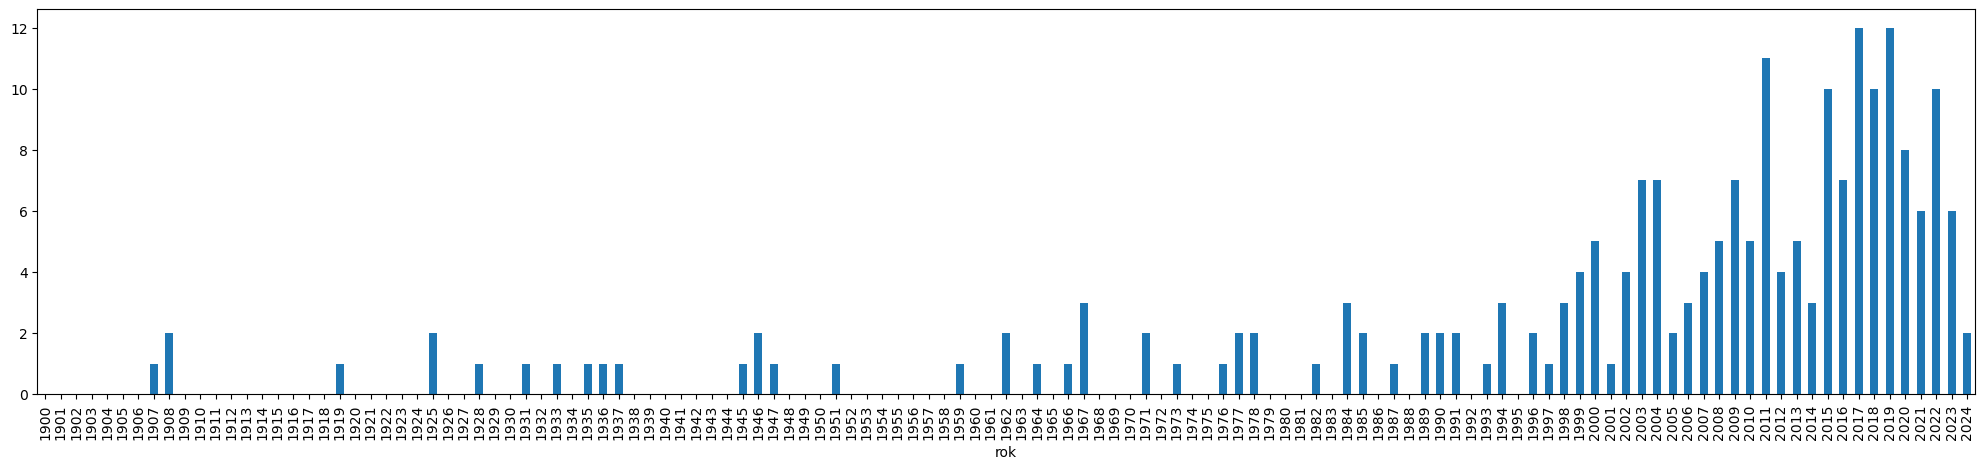

In [180]:
r(df2[df2.apply(lambda row: any("gay" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

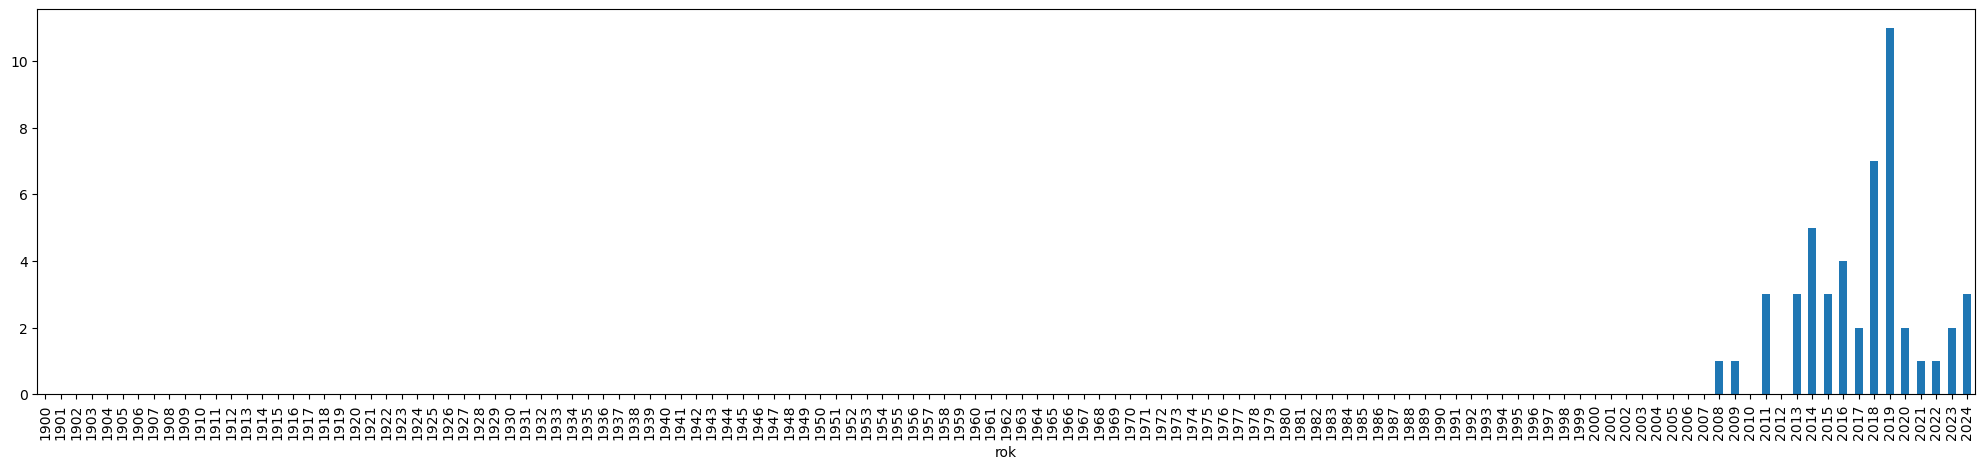

In [181]:
r(df2[df2.apply(lambda row: any("ADHD" in str(value) for value in row), axis=1)])

<Axes: xlabel='rok'>

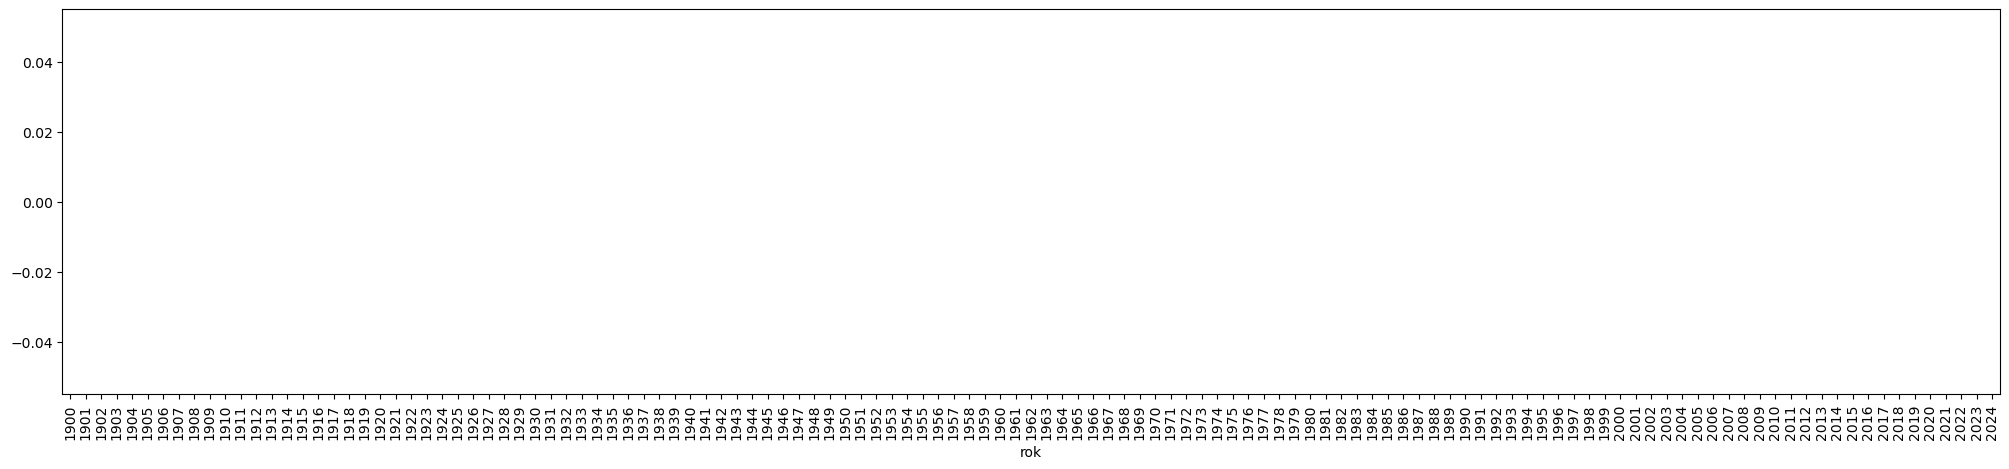

In [182]:
r(df2[df2.apply(lambda row: any("eurodiverg" in str(value) for value in row), axis=1)])

<Axes: xlabel='rok'>

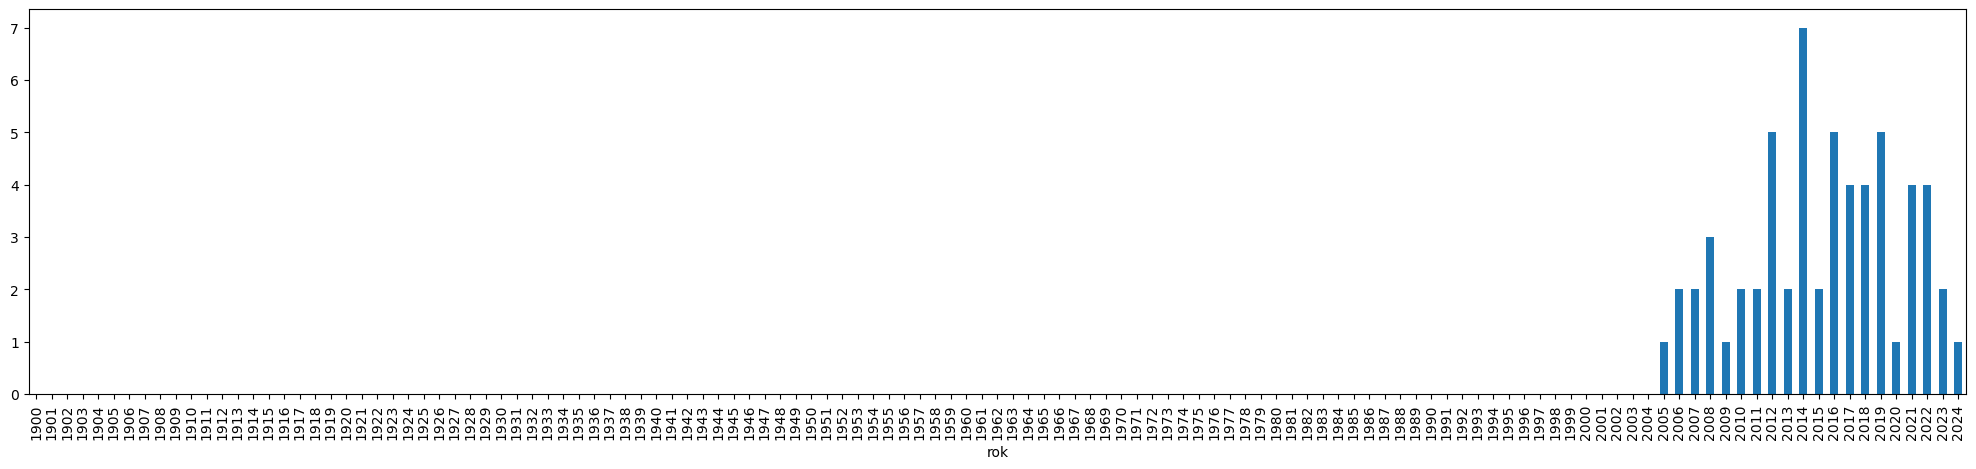

In [183]:
r(df2[df2.apply(lambda row: any("Asperg" in str(value) for value in row), axis=1)])

<Axes: xlabel='rok'>

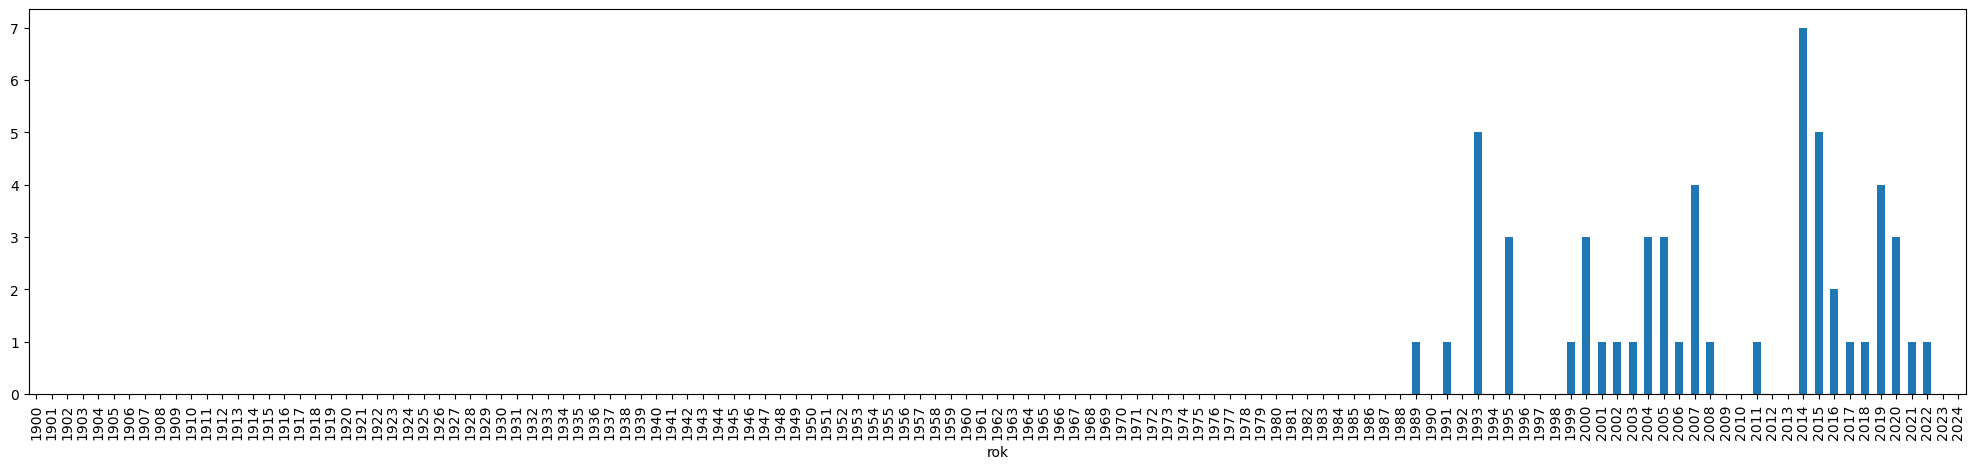

In [184]:
r(df2[df2.apply(lambda row: any("HIV" in str(value) for value in row), axis=1)])

<Axes: xlabel='rok'>

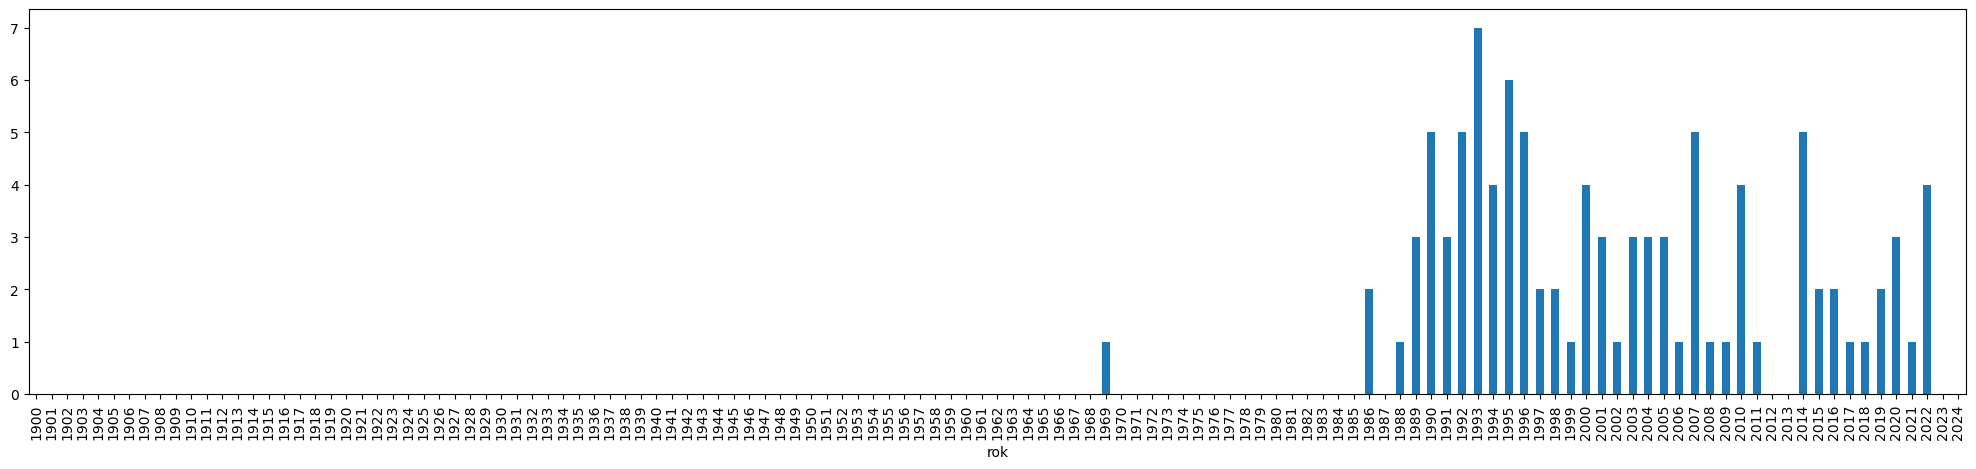

In [185]:
r(df2[df2.apply(lambda row: any("AIDS" in str(value) for value in row), axis=1)])

<Axes: xlabel='rok'>

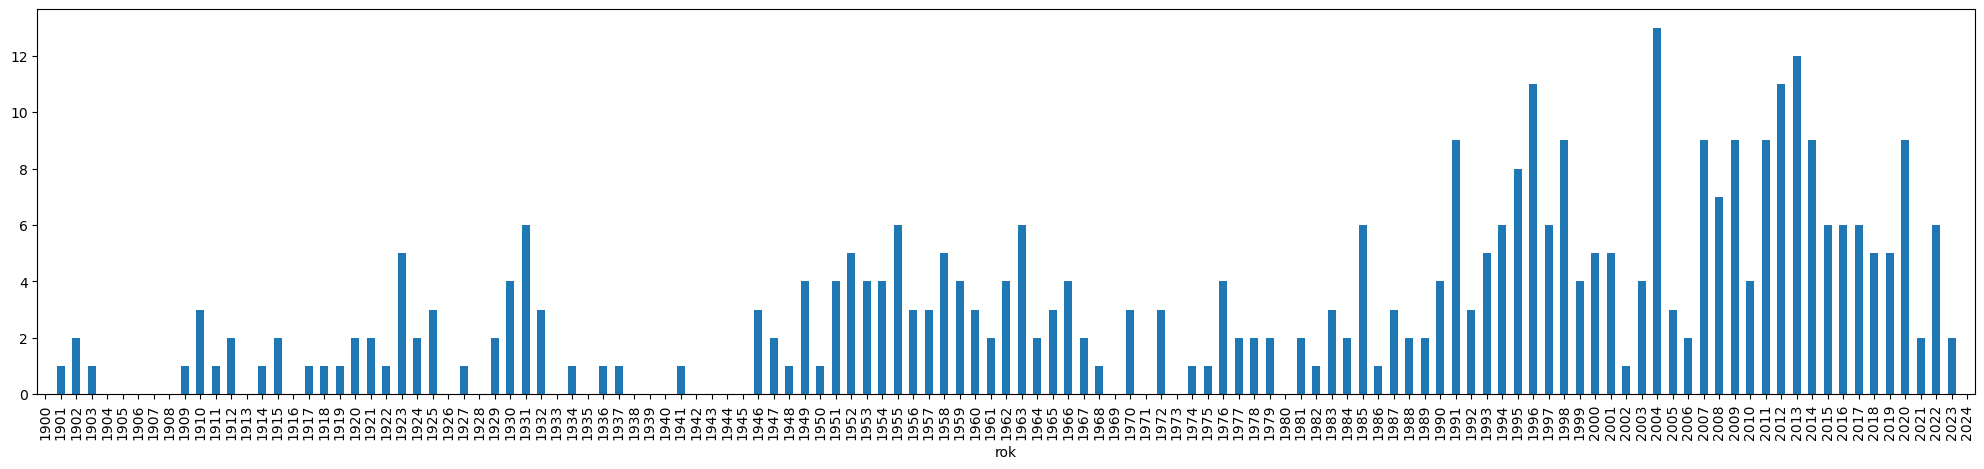

In [186]:
r(df2[df2.apply(lambda row: any("konop" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

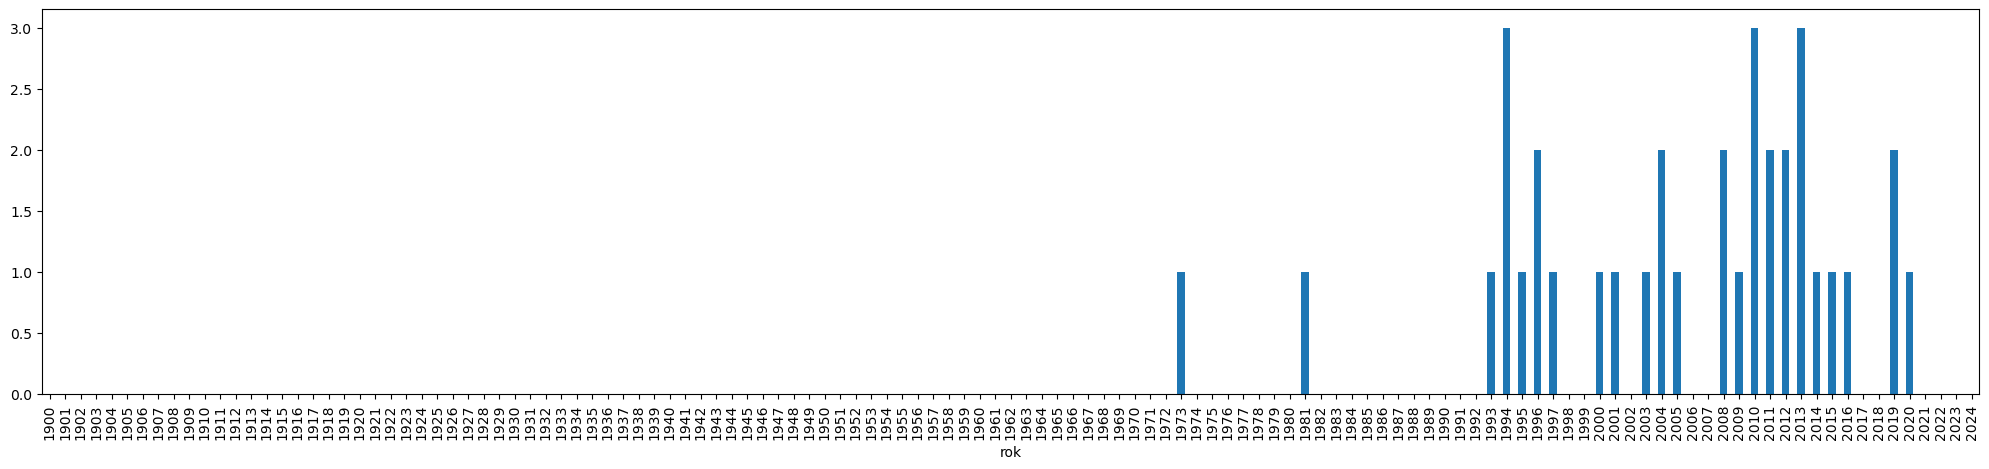

In [187]:
r(df2[df2.apply(lambda row: any("marihuan" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

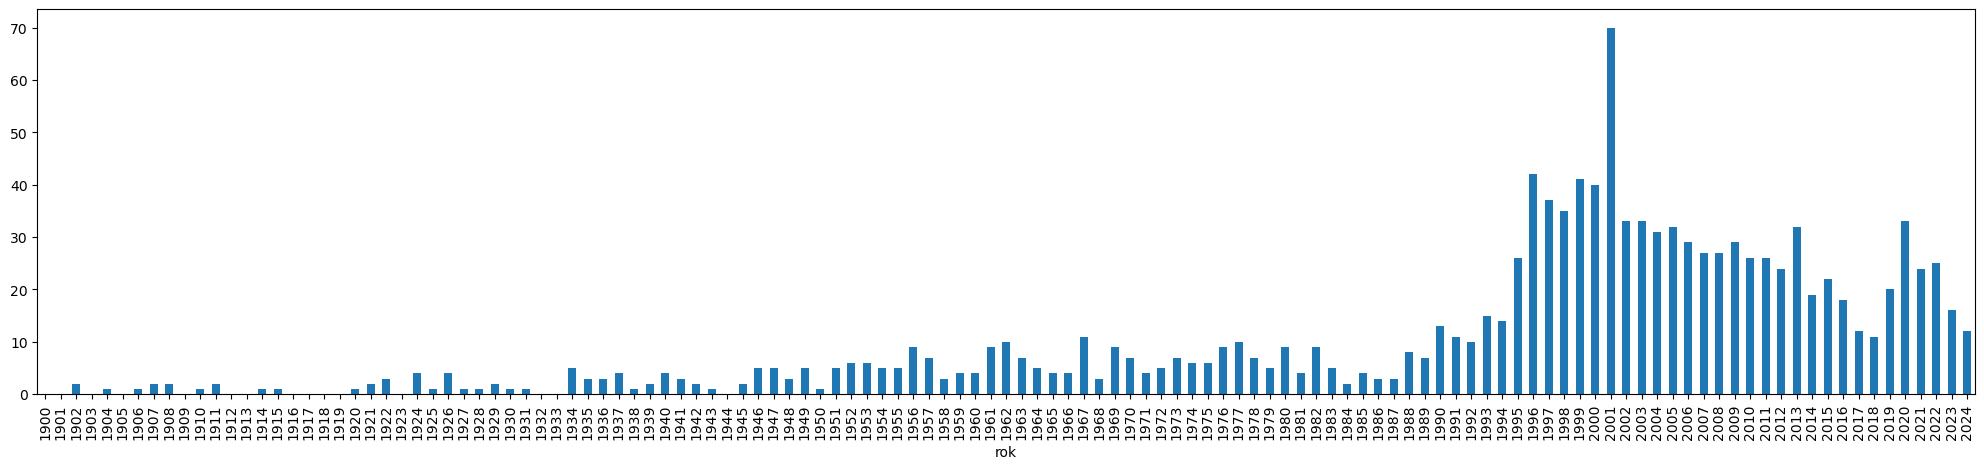

In [188]:
r(df2[df2.apply(lambda row: any("drog" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

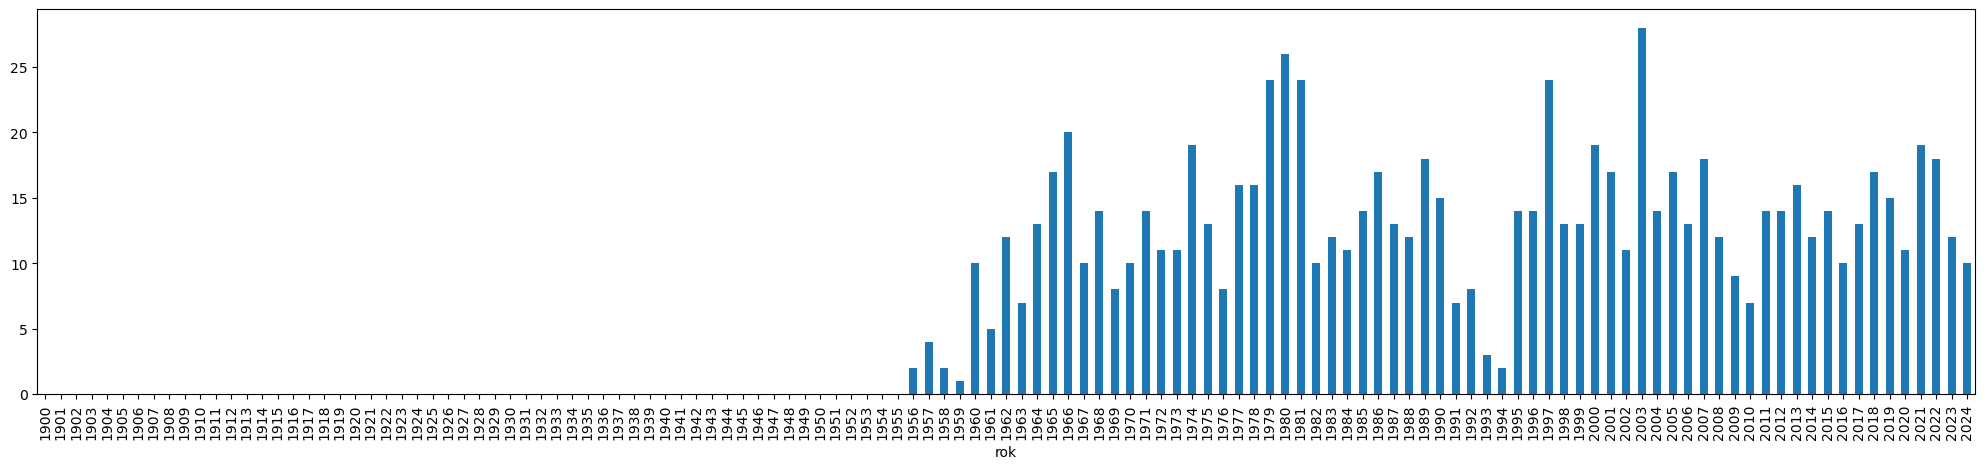

In [189]:
r(df2[df2.apply(lambda row: any("kyberneti" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

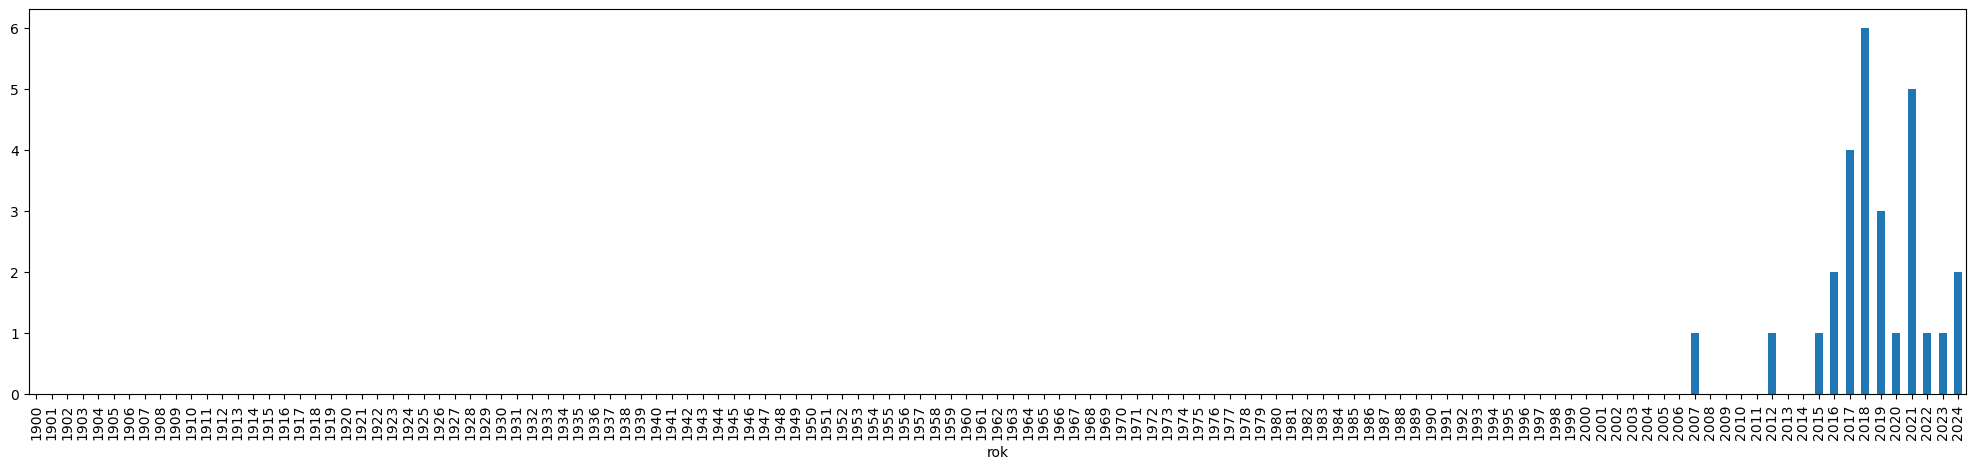

In [190]:
r(df2[df2.apply(lambda row: any("youtube" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

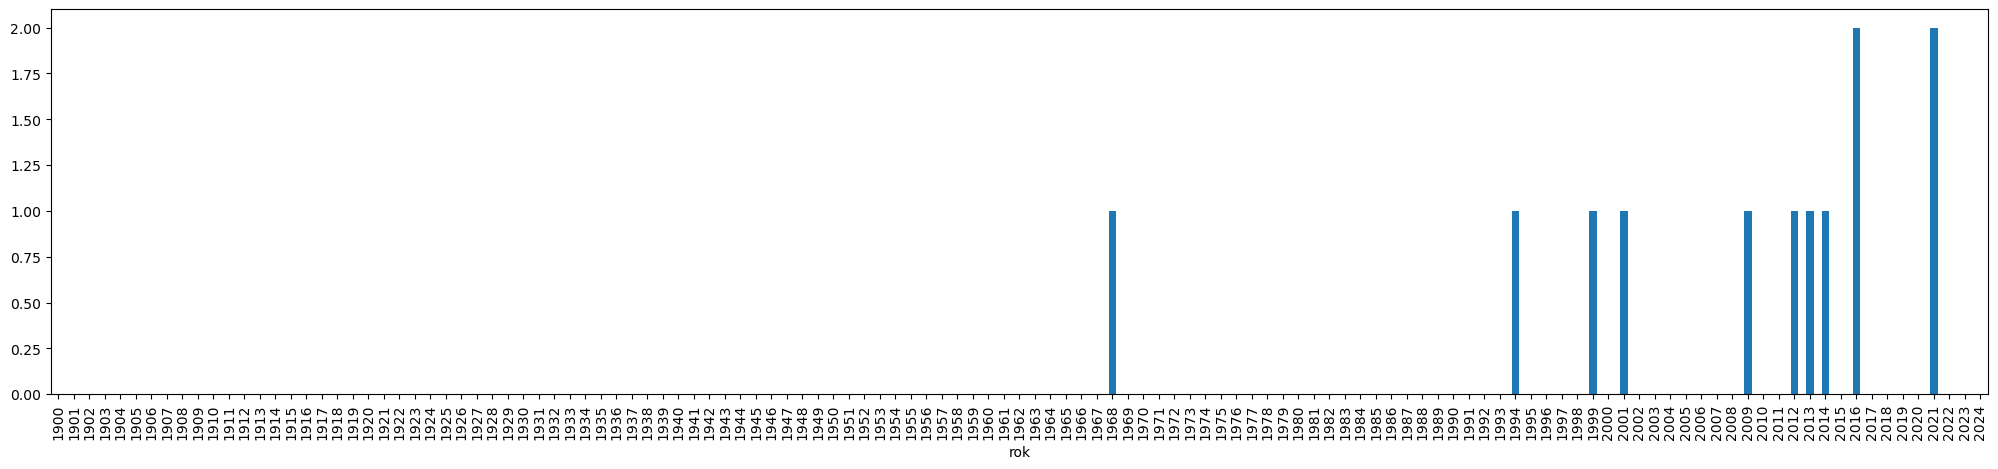

In [191]:
r(df2[df2.apply(lambda row: any("sadomaso" in str(value).lower() for value in row), axis=1)])

In [192]:
df2[df2.apply(lambda row: any("sadomaso" in str(value).lower() for value in row), axis=1)].head(2)

,rok,072_x,245_a,245_c,520_a,650_a,653_a,655_a,964_a
001,,,,,,,,,
bk196802996,1968.0,None,Lež romantismu a pravda románu /,René Girard ; z francouzského originálu ... př...,['Studie francouzského esejisty vychází z romá...,None,None,None,"['Román - stol. 19.-20., 1. pol. - rozbory kri..."
np9539153,1994.0,None,S kůží na trh aneb Otrokářova zpověď :,Jiří Hartmann,nan,['sadomasochismus' 'homosexuálové'],None,['informační publikace'],None


<Axes: xlabel='rok'>

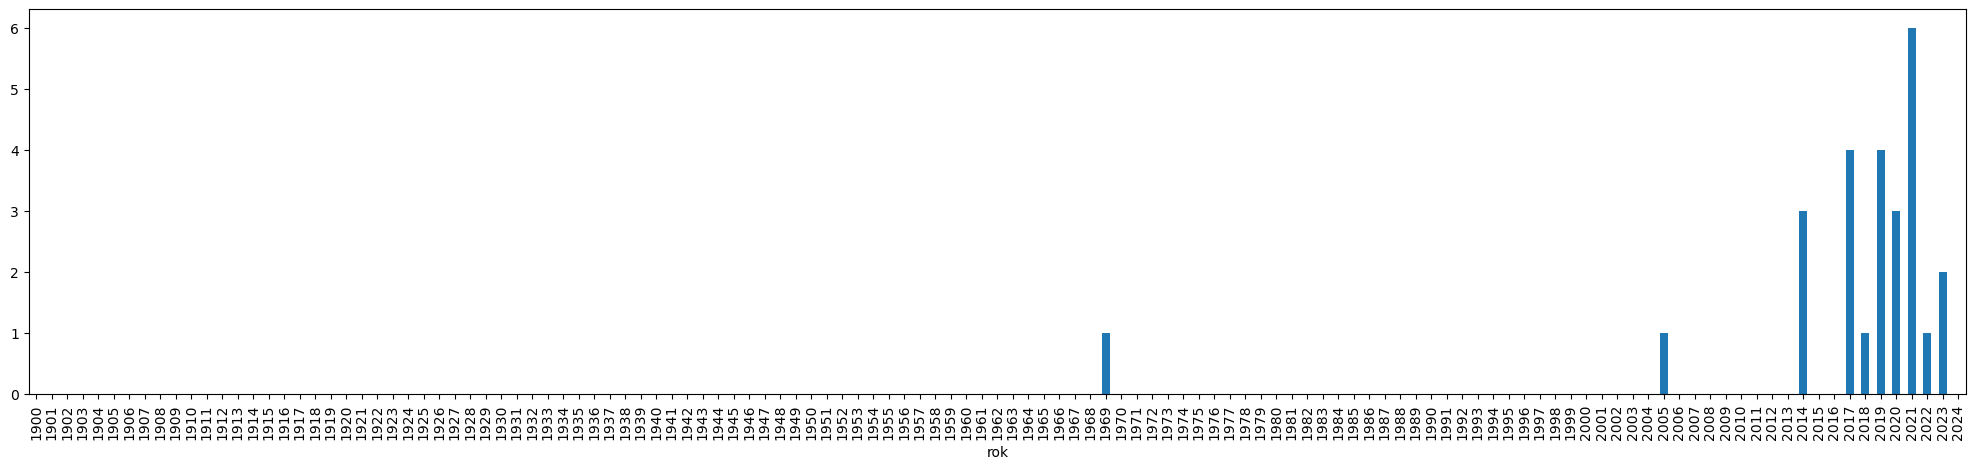

In [193]:
r(df2[df2.apply(lambda row: any("Babiš" in str(value) for value in row), axis=1)])

<Axes: xlabel='rok'>

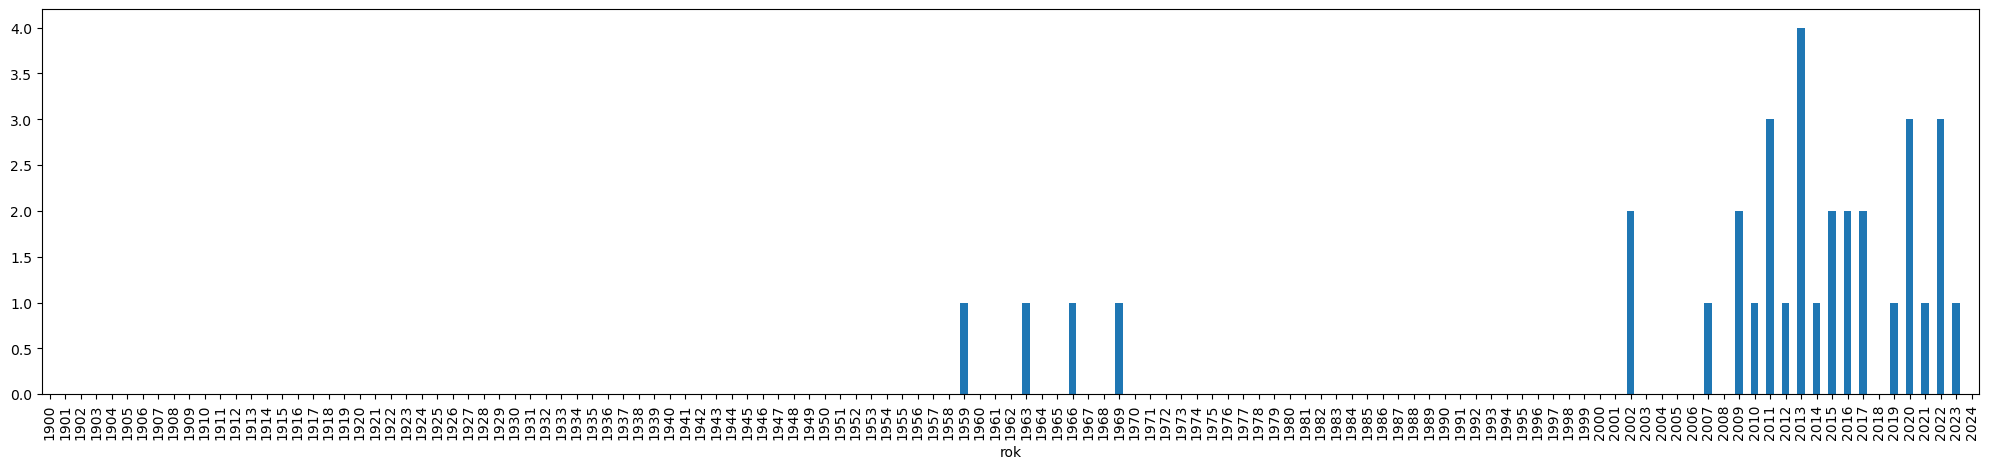

In [194]:
r(df2[df2.apply(lambda row: any("neoliber" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

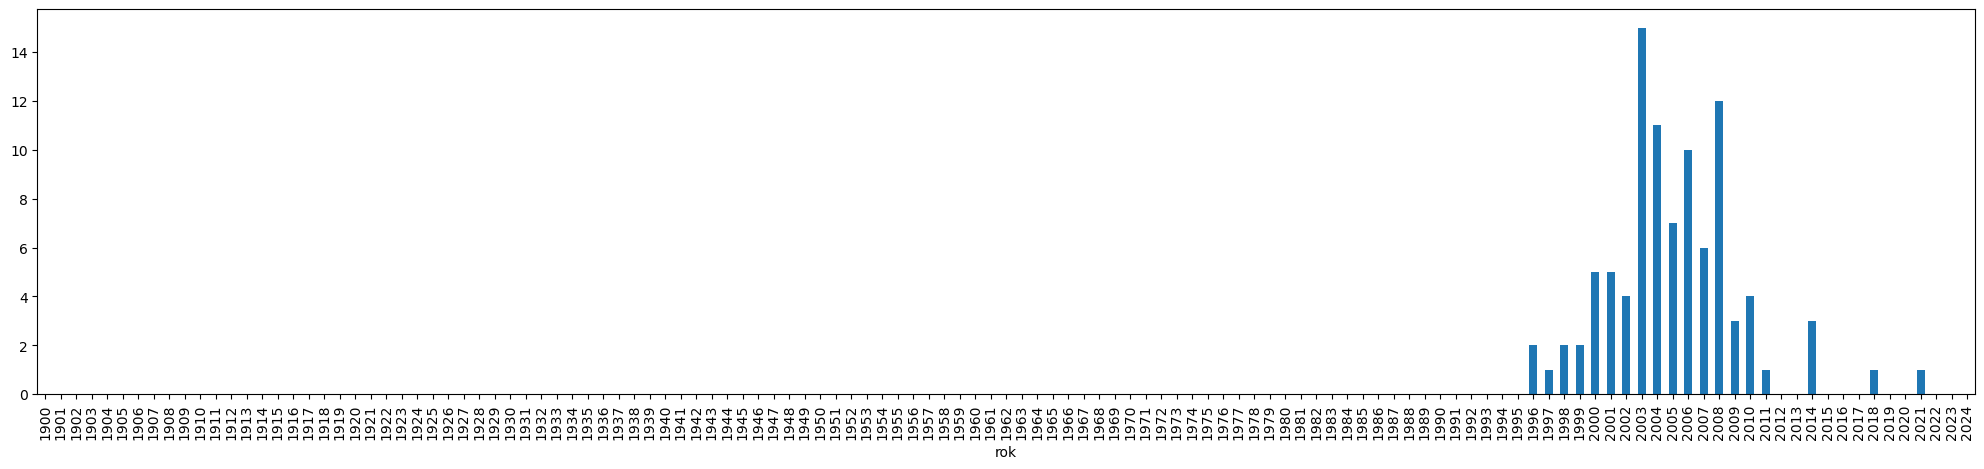

In [195]:
r(df2[df2.apply(lambda row: any("linux" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

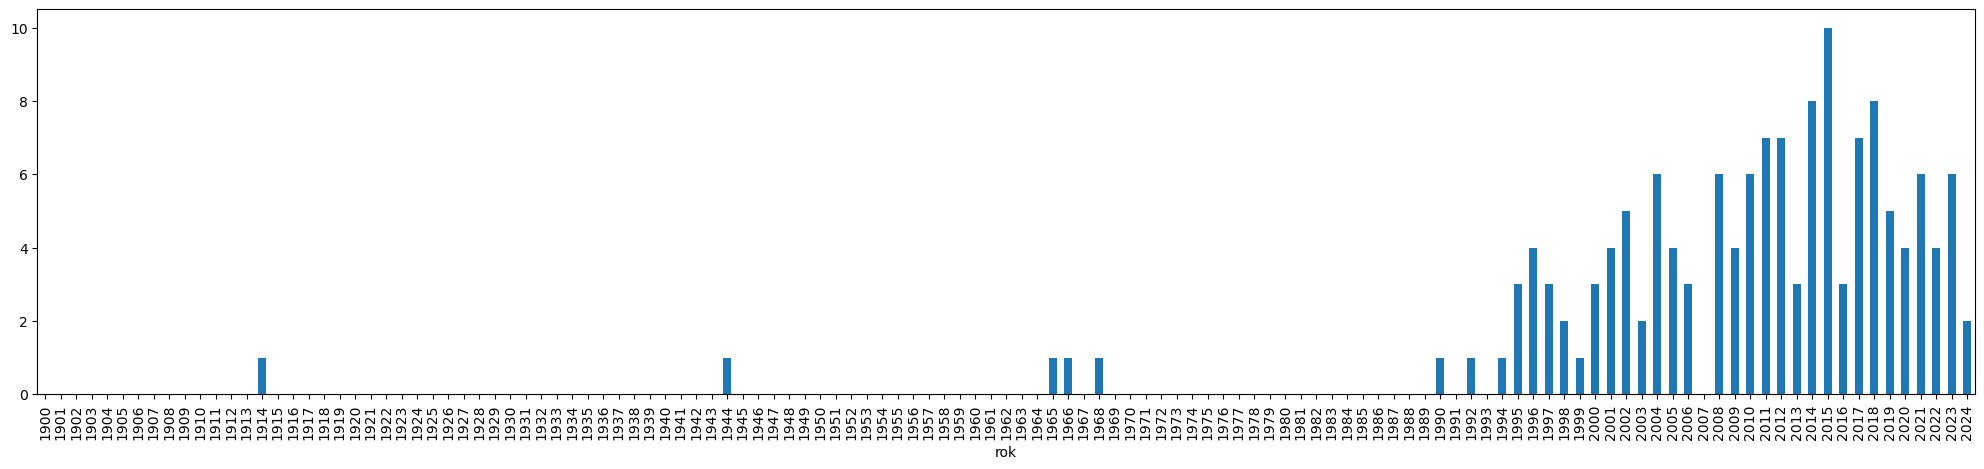

In [196]:
r(df2[df2.apply(lambda row: any("tantr" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

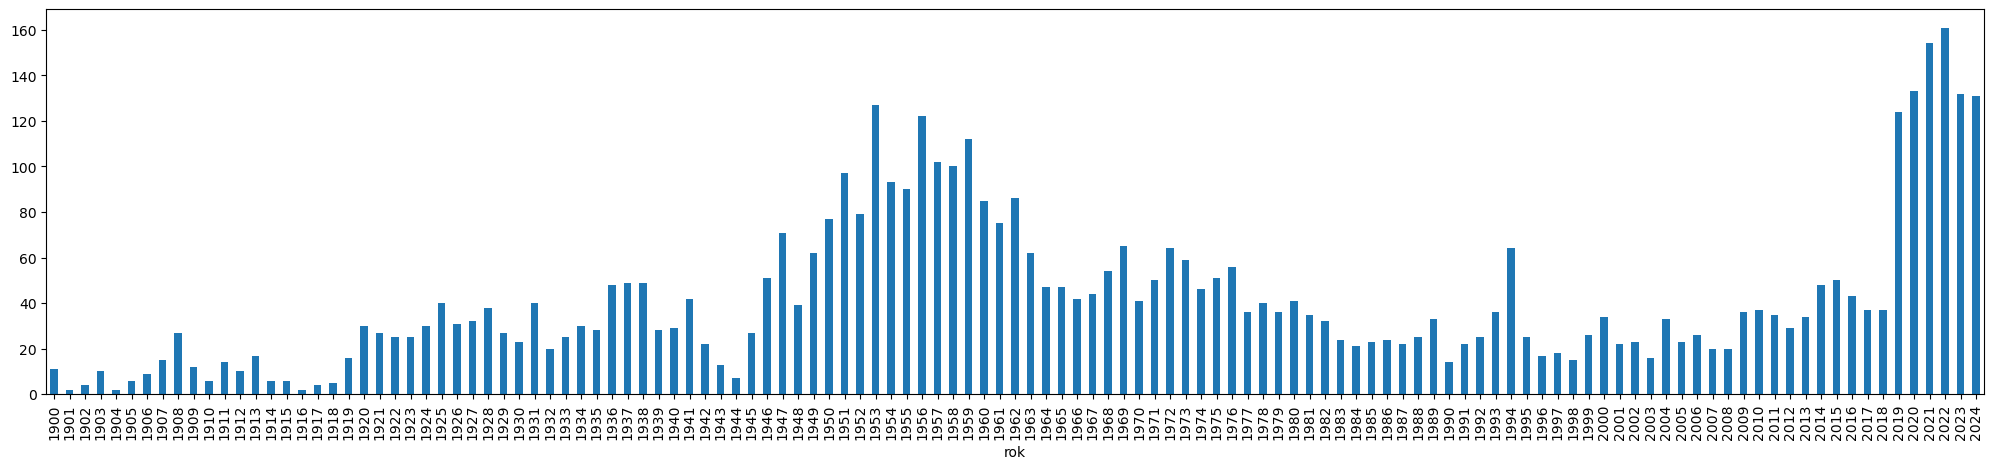

In [197]:
r(df2[df2.apply(lambda row: any("družst" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

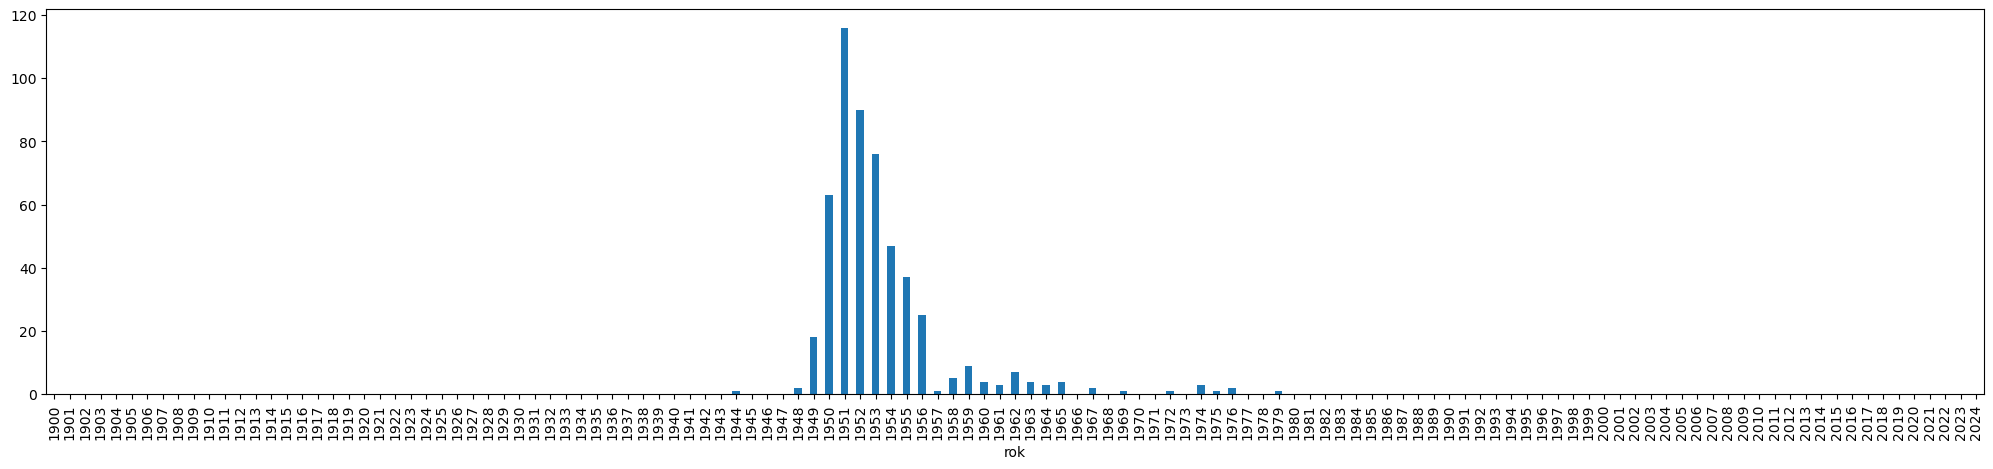

In [198]:
r(df2[df2.apply(lambda row: any("kolchoz" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

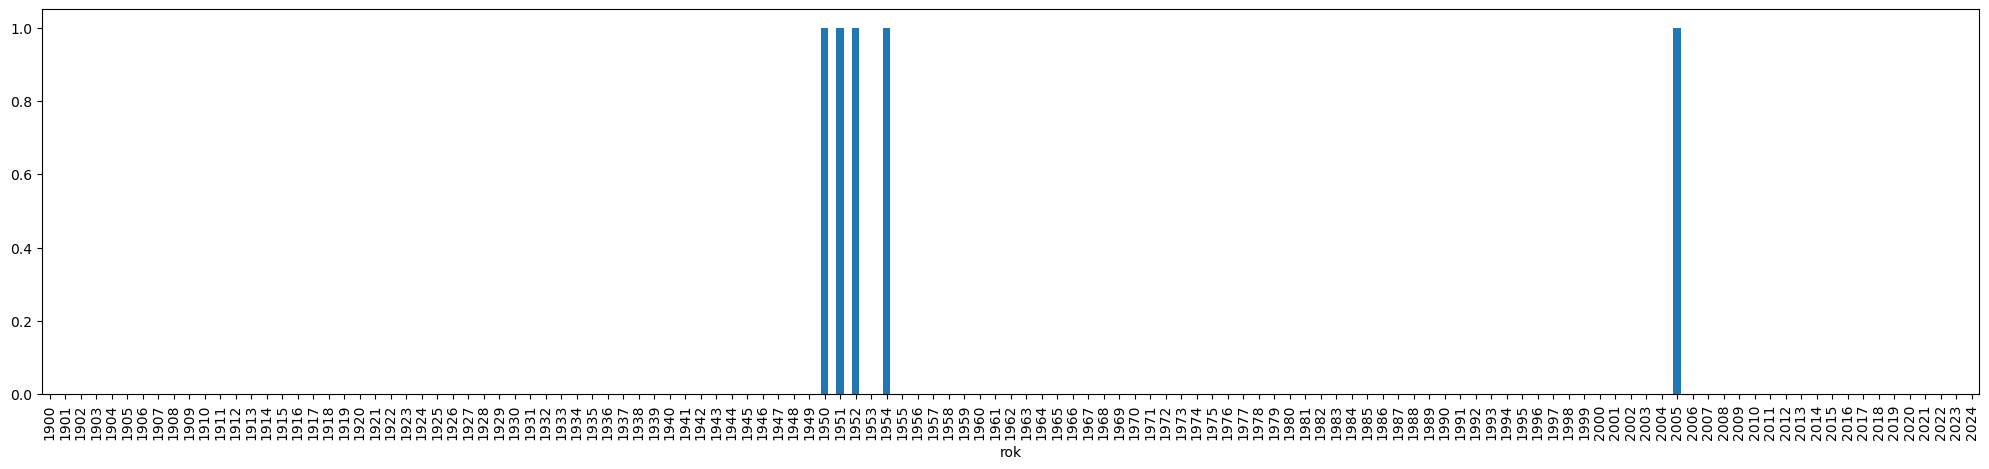

In [199]:
r(df2[df2.apply(lambda row: any("gorodk" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

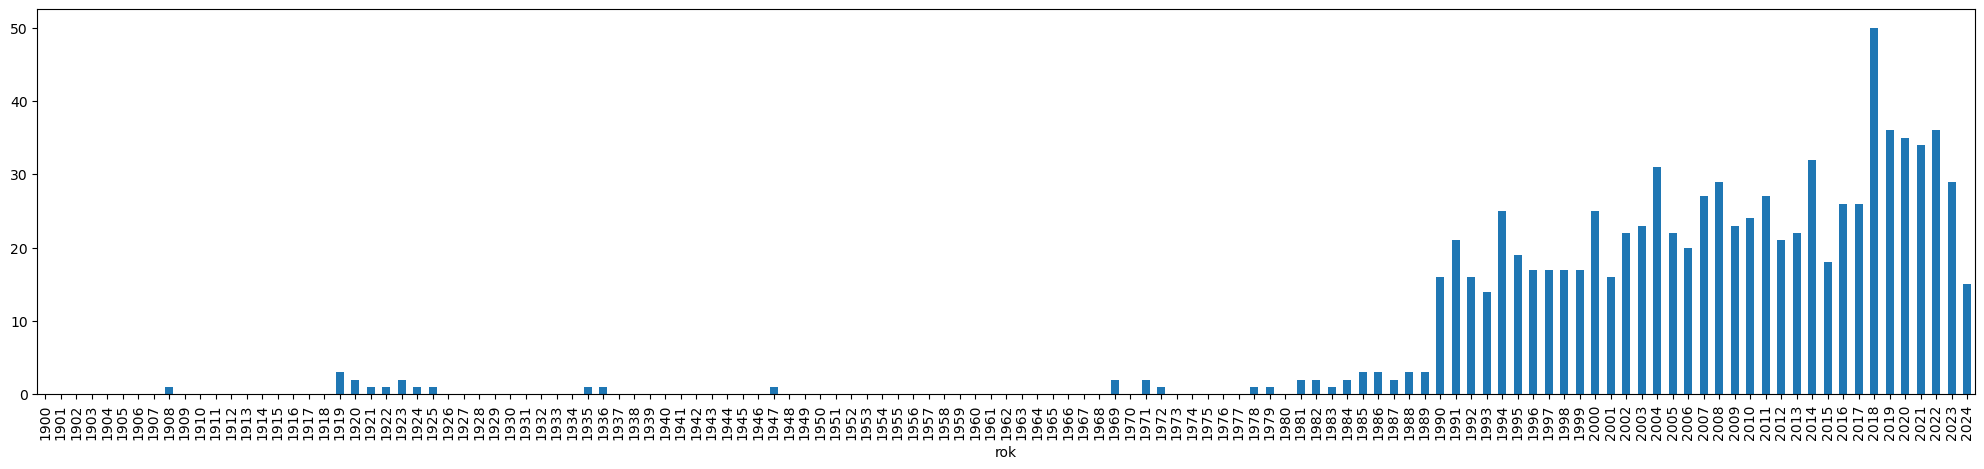

In [200]:
r(df2[df2.apply(lambda row: any("jóga" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

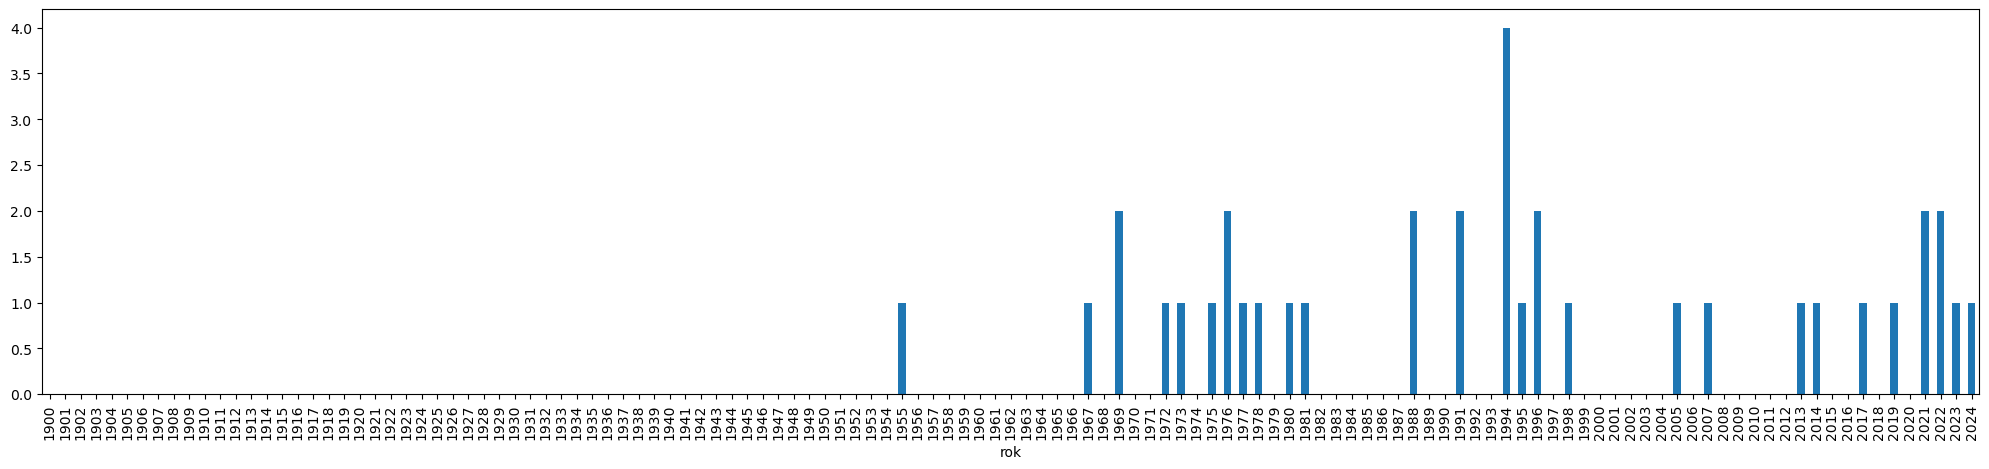

In [201]:
r(df2[df2.apply(lambda row: any("narkom" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

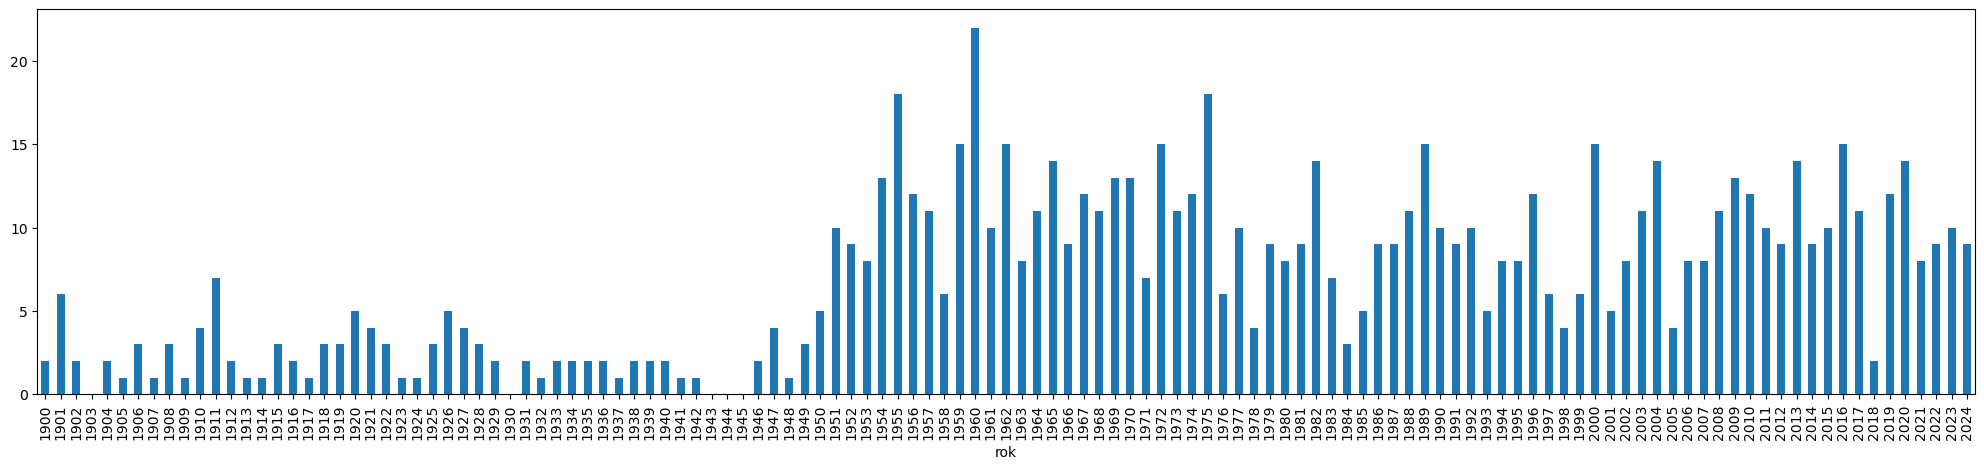

In [202]:
r(df2[df2.apply(lambda row: any("rozvod" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

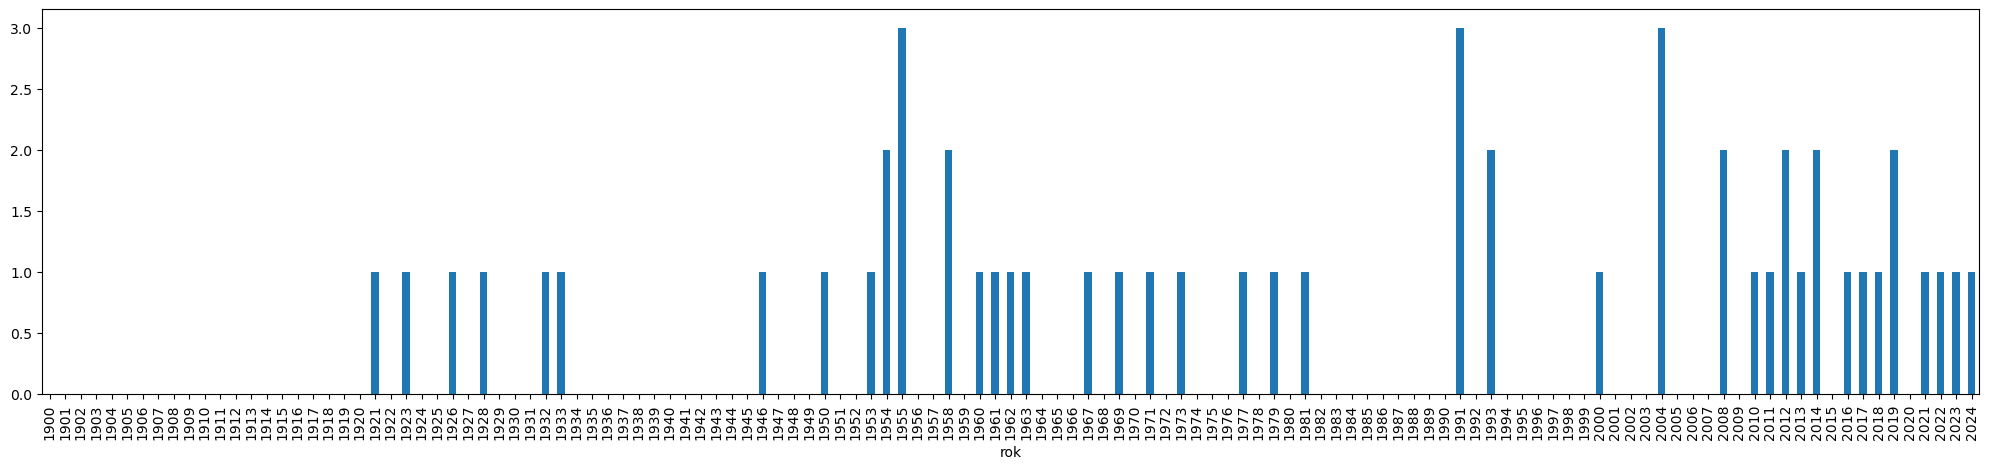

In [203]:
r(df2[df2.apply(lambda row: any("potrat" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

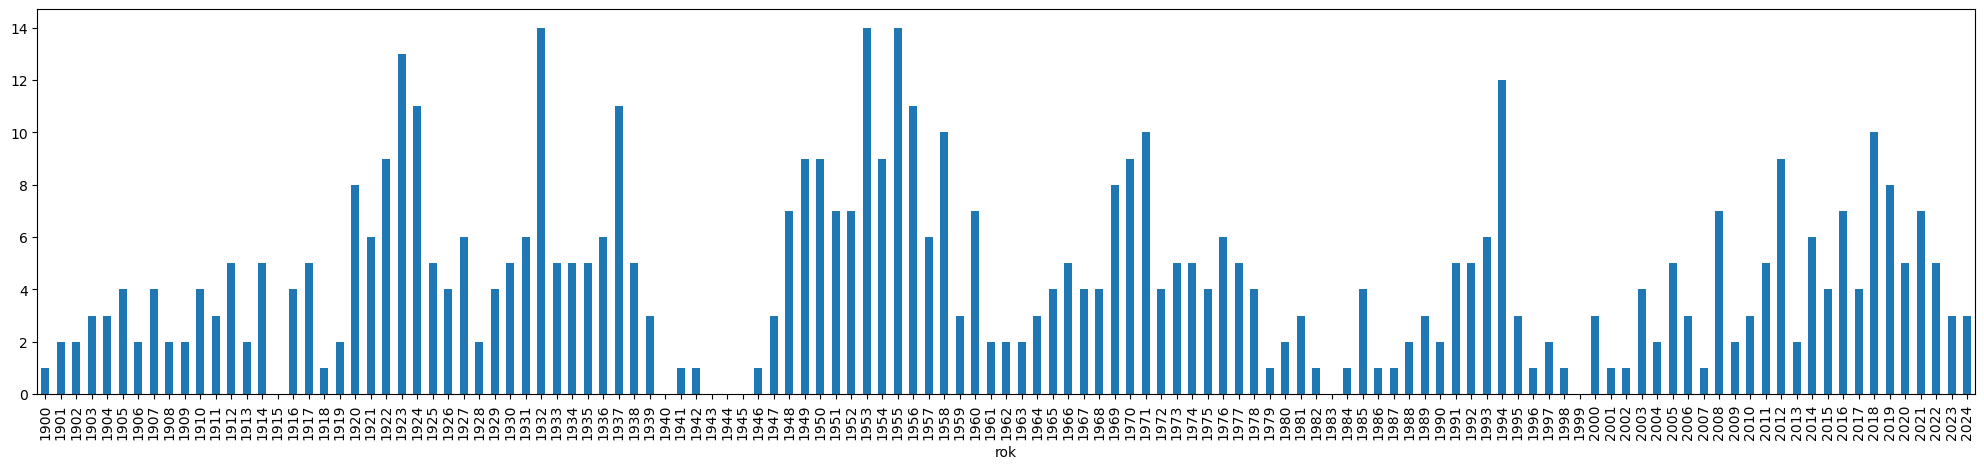

In [204]:
r(df2[df2.apply(lambda row: any("pohlavní" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

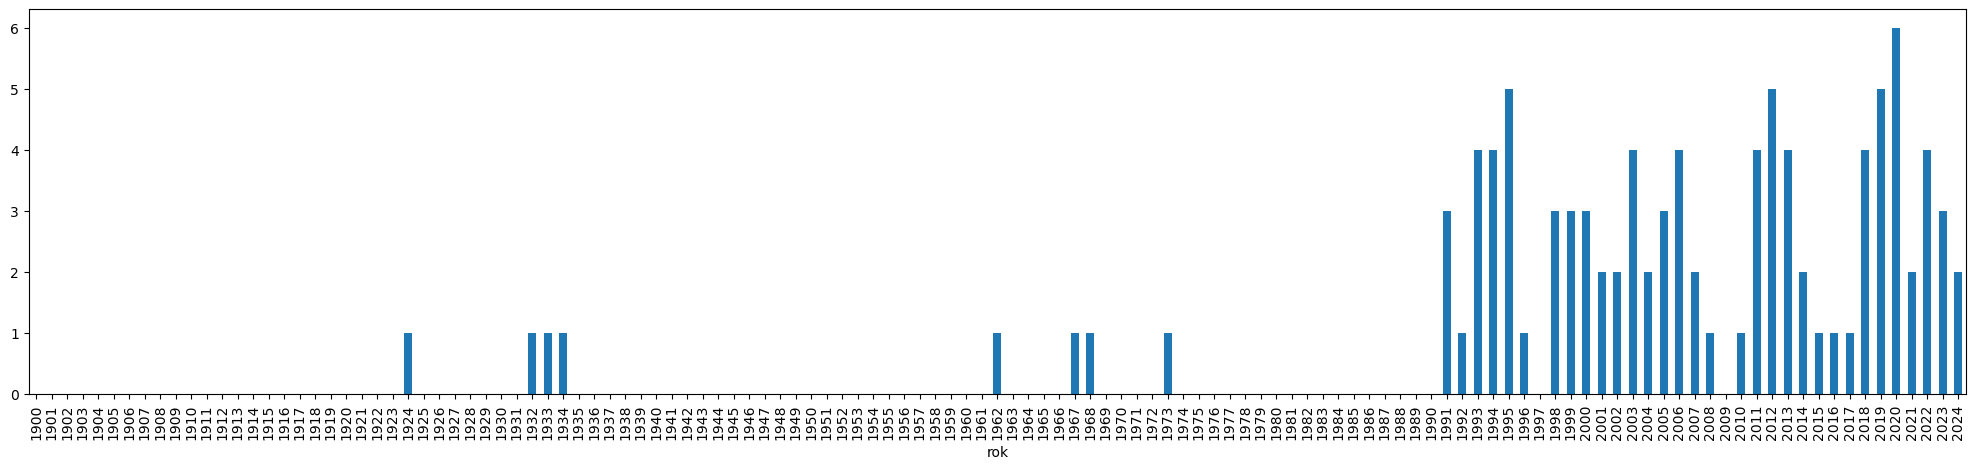

In [205]:
r(df2[df2.apply(lambda row: any("homosex" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

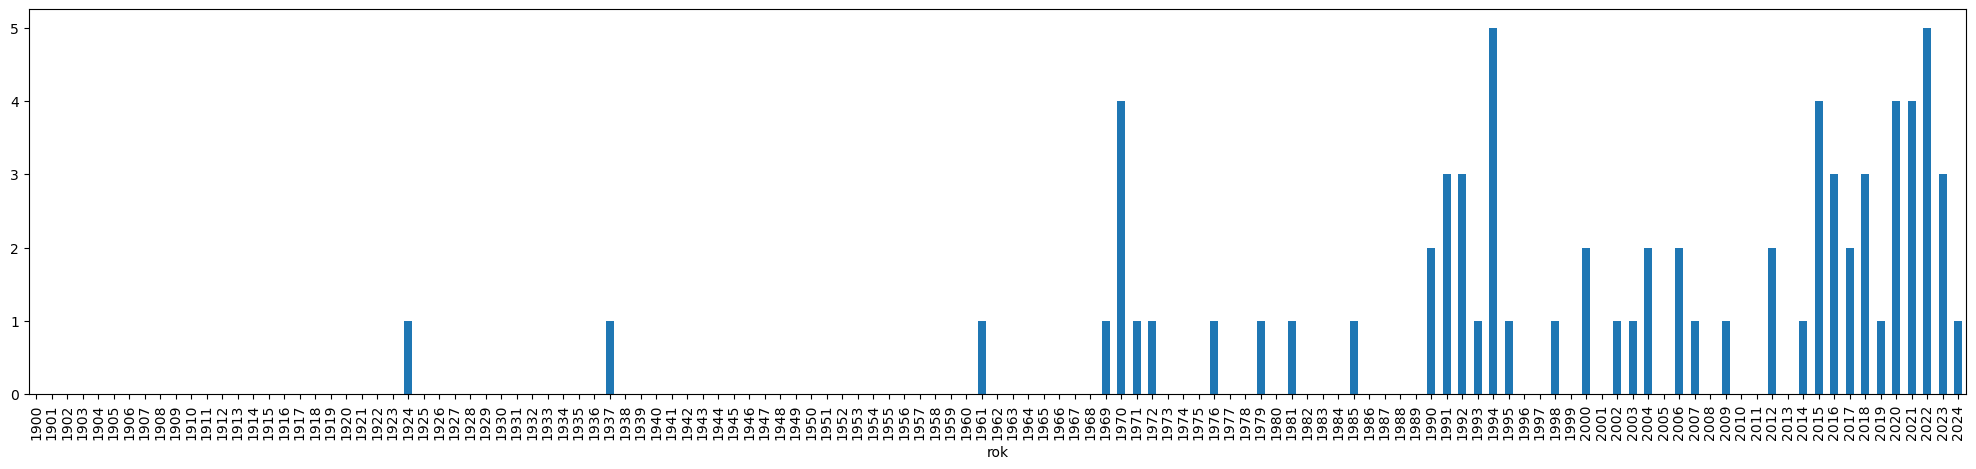

In [206]:
r(df2[df2.apply(lambda row: any("bezmas" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

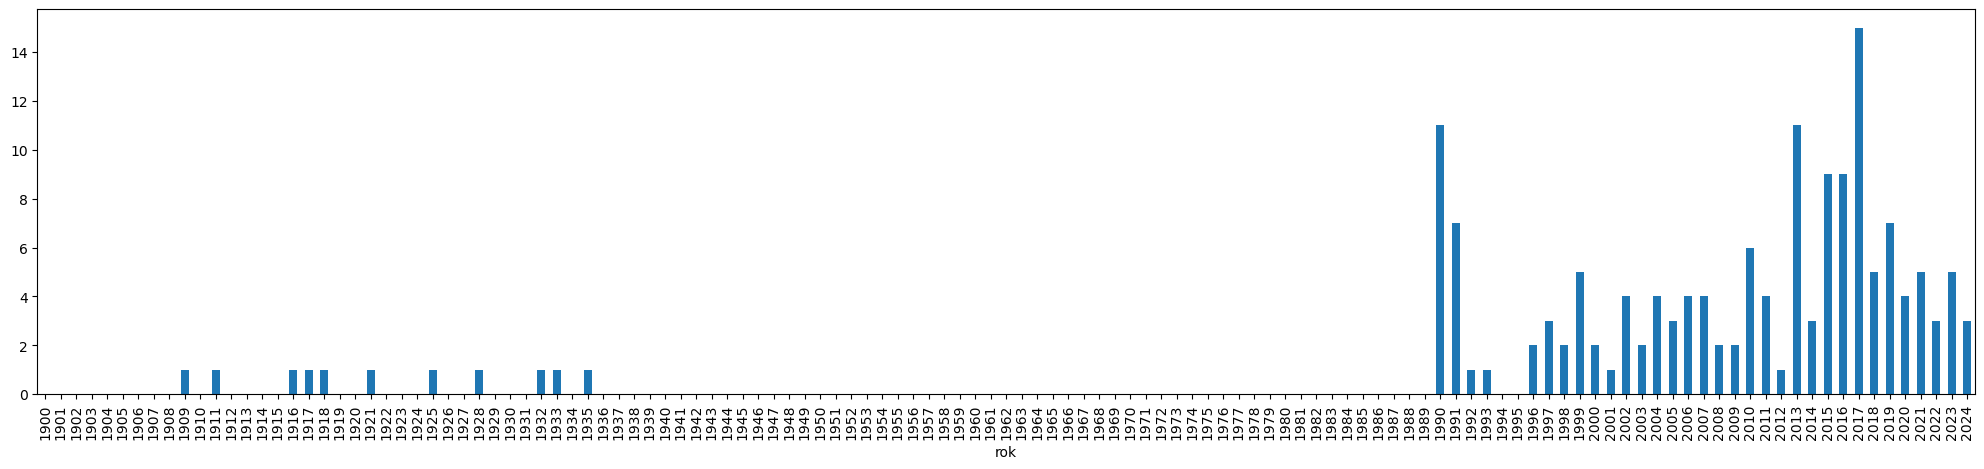

In [207]:
r(df2[df2.apply(lambda row: any("vegetar" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

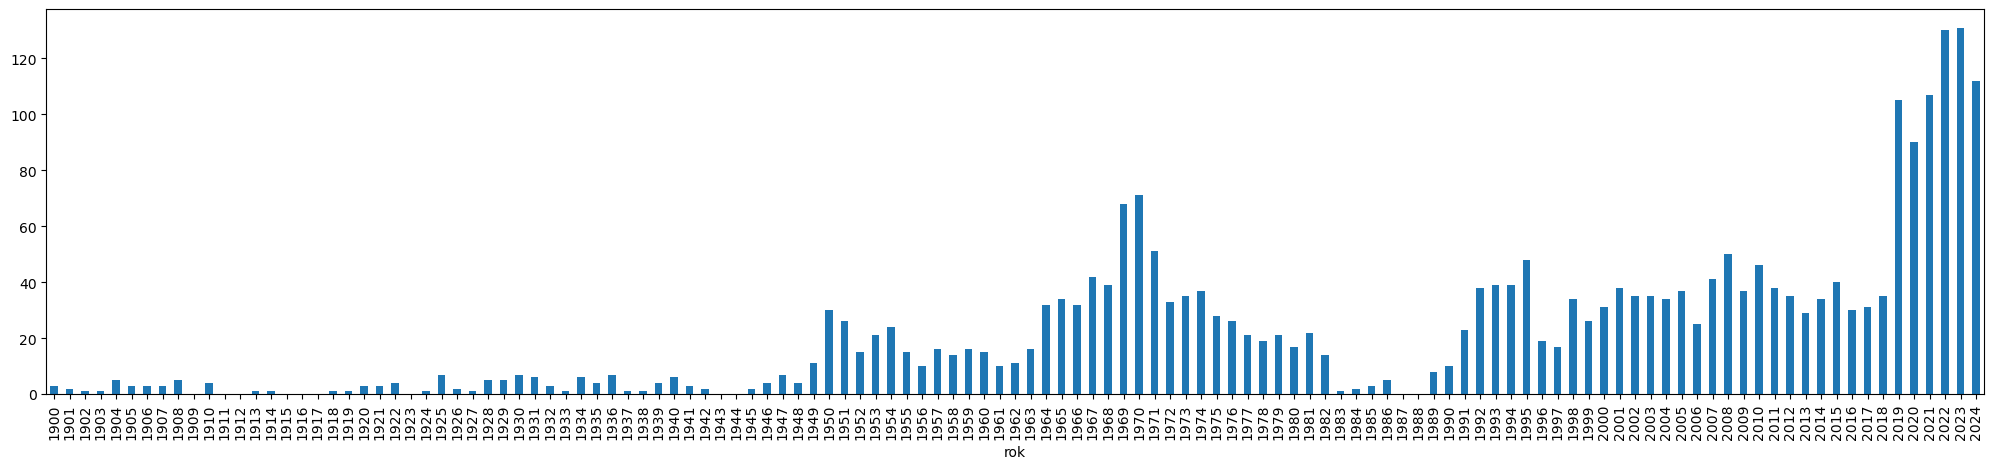

In [208]:
r(df2[df2.apply(lambda row: any("vražd" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

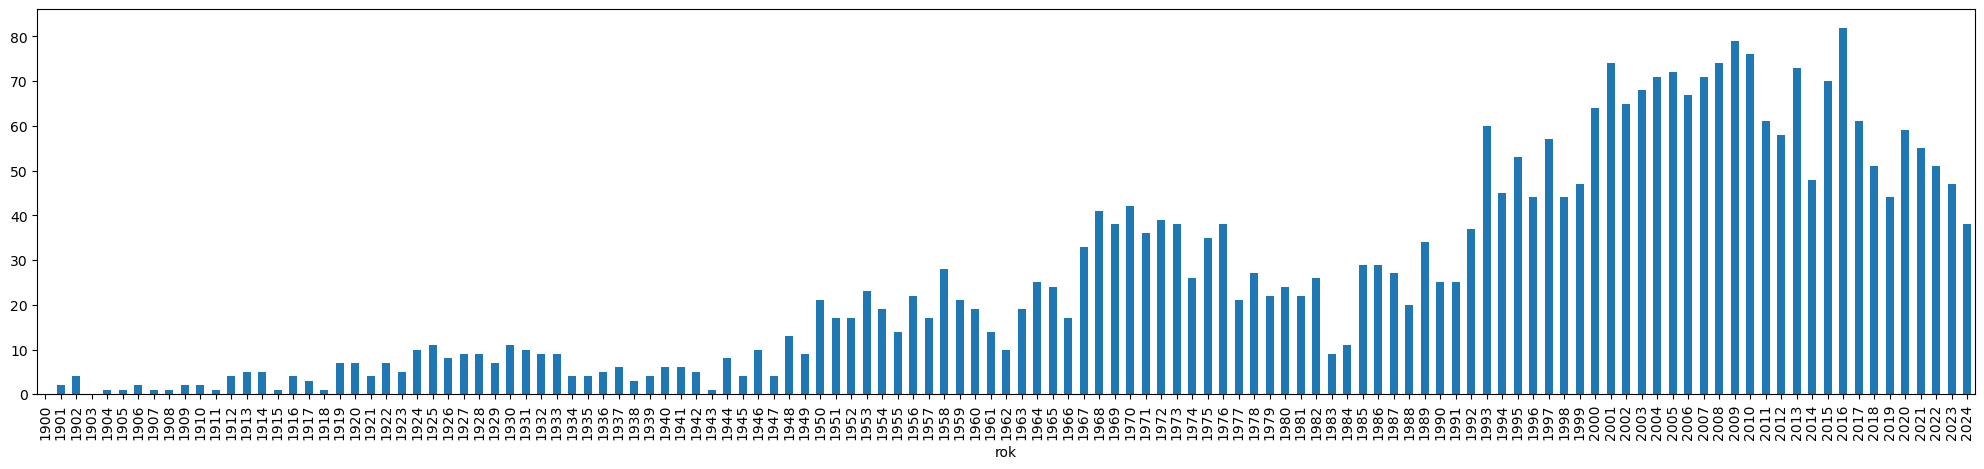

In [209]:
r(df2[df2.apply(lambda row: any("milen" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

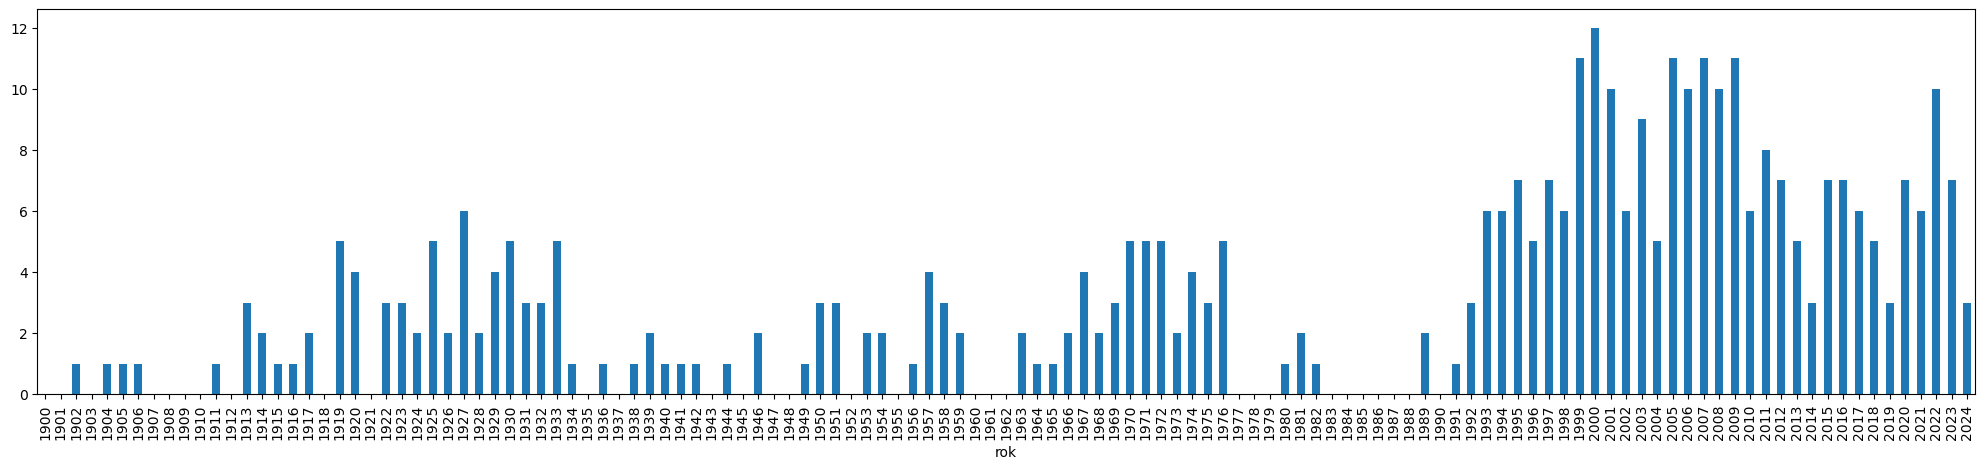

In [210]:
r(df2[df2.apply(lambda row: any("milenk" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

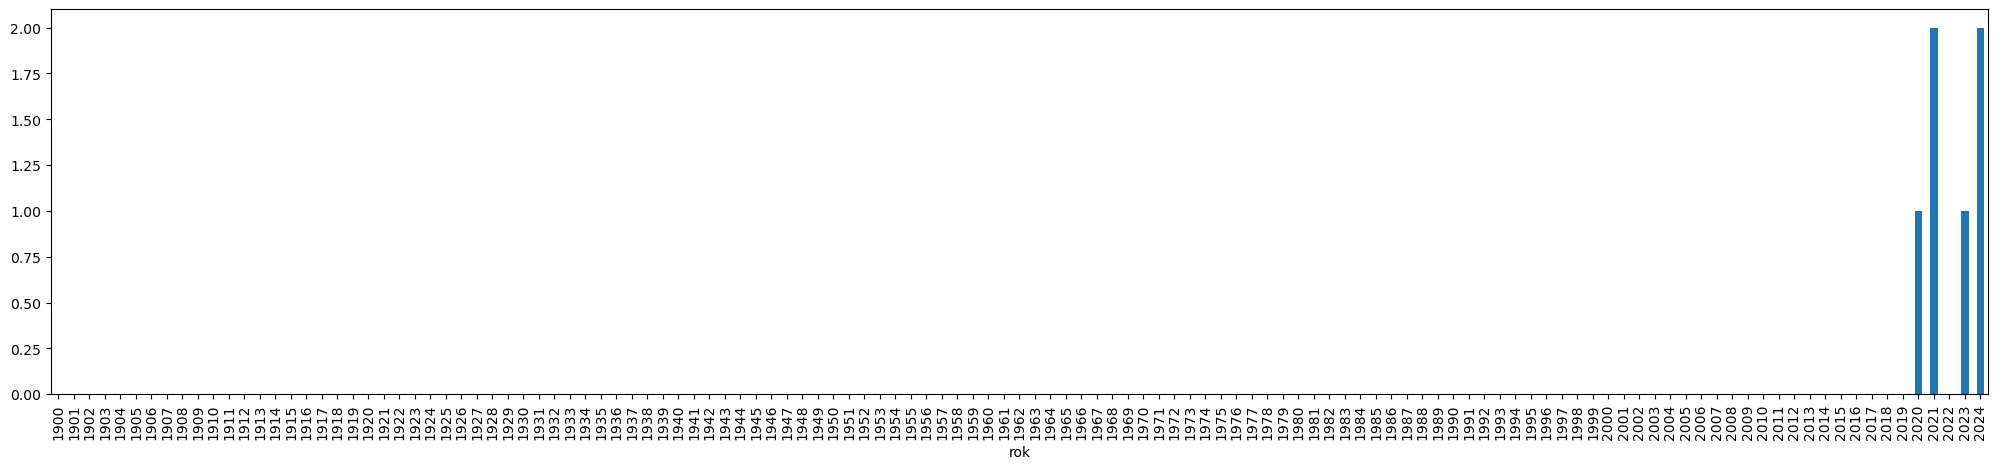

In [211]:
r(df2[df2.apply(lambda row: any("cyberpunk" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

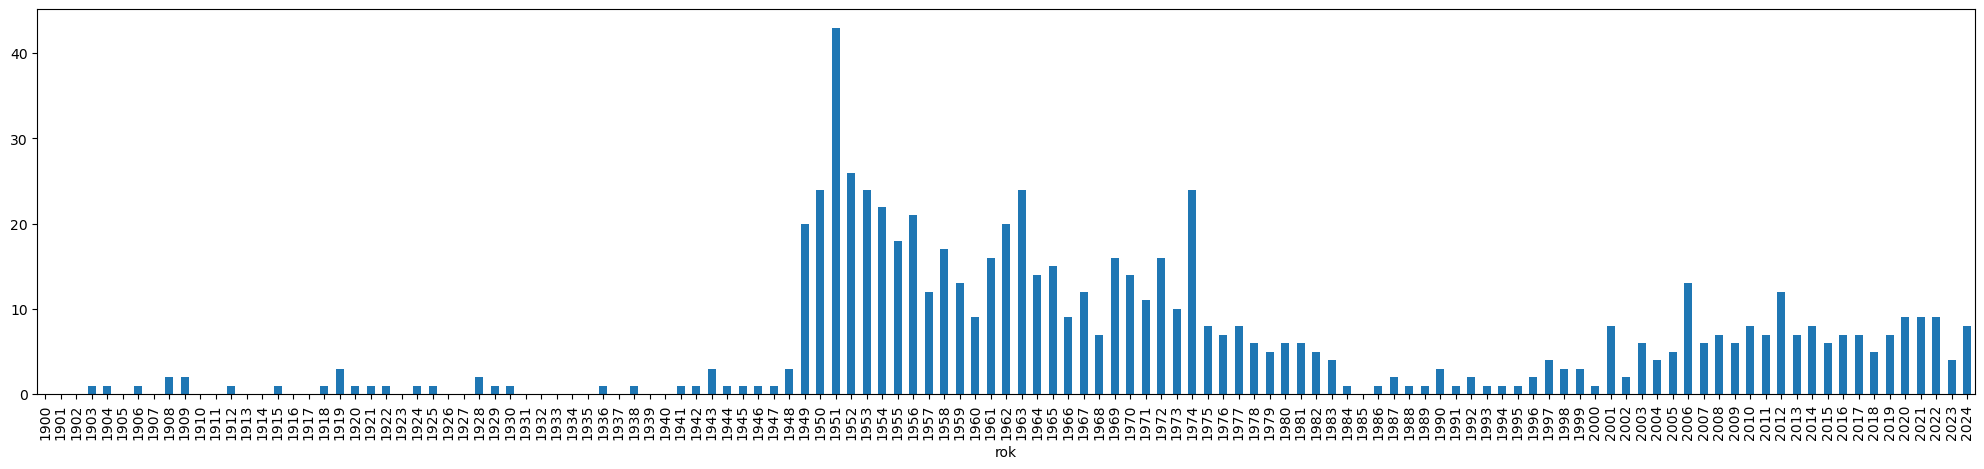

In [212]:
r(df2[df2.apply(lambda row: any("bohatstv" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

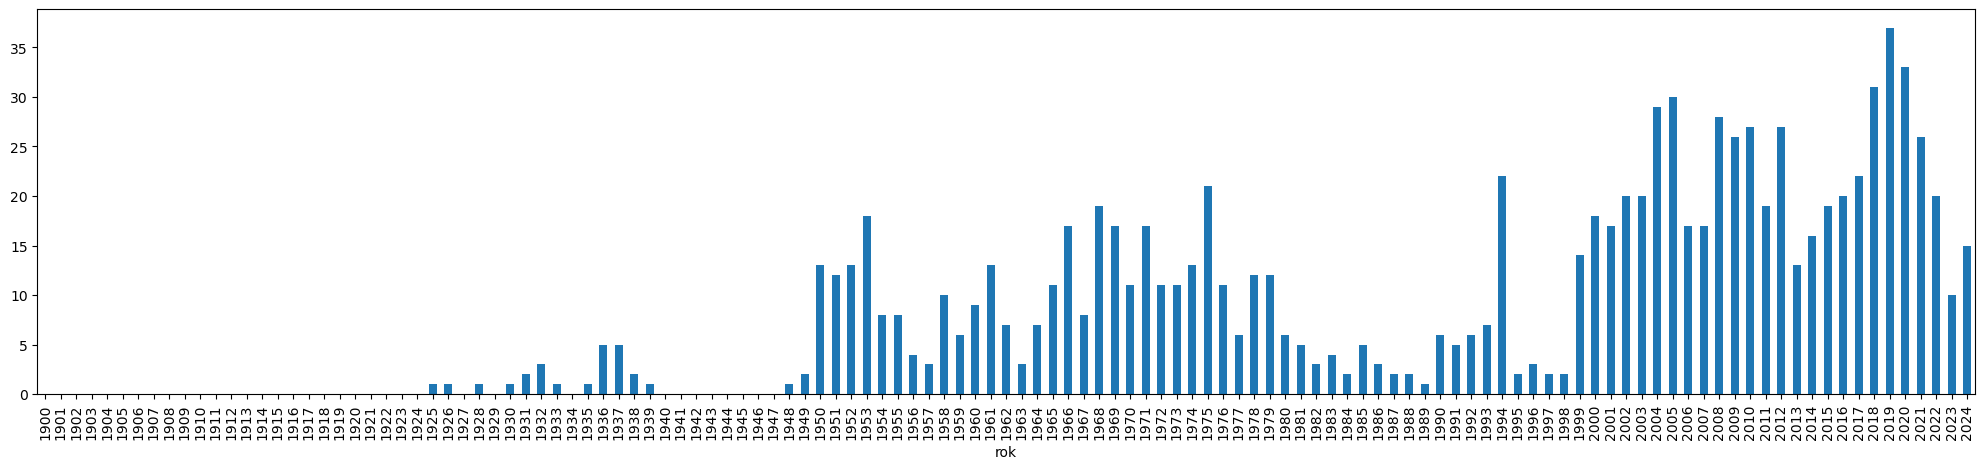

In [213]:
r(df2[df2.apply(lambda row: any("špion" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

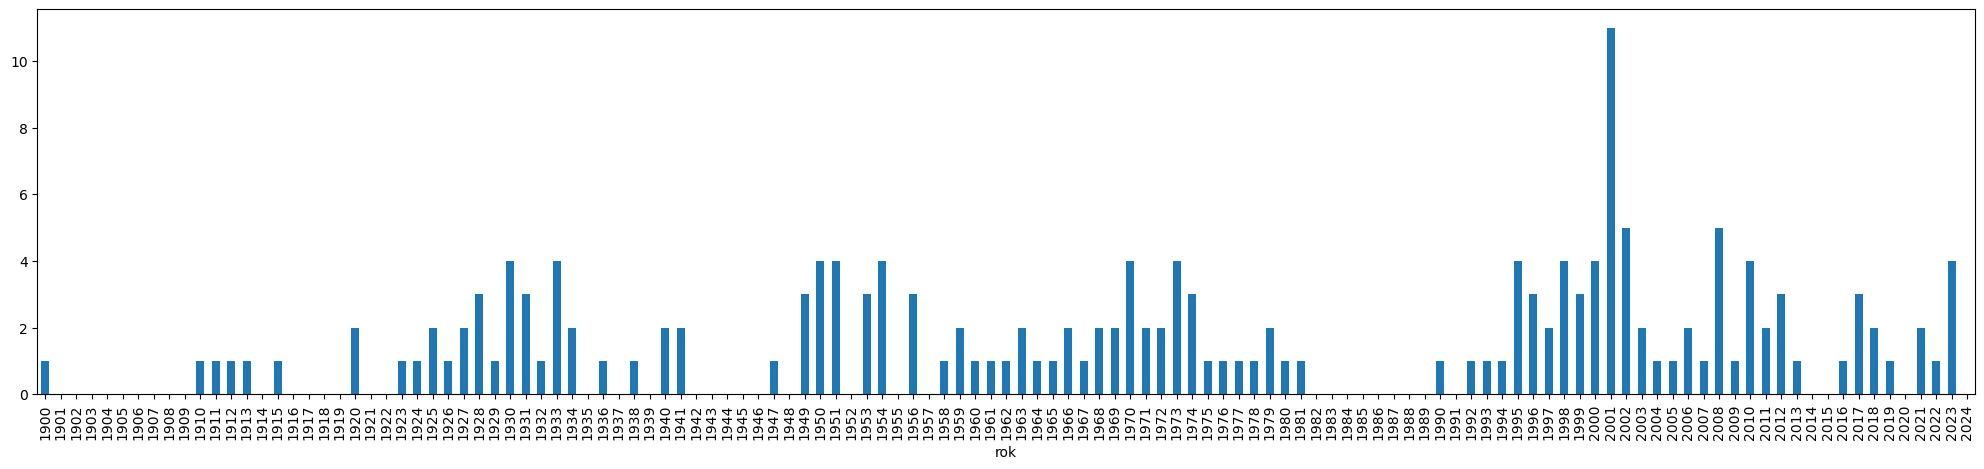

In [214]:
r(df2[df2.apply(lambda row: any("milionář" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

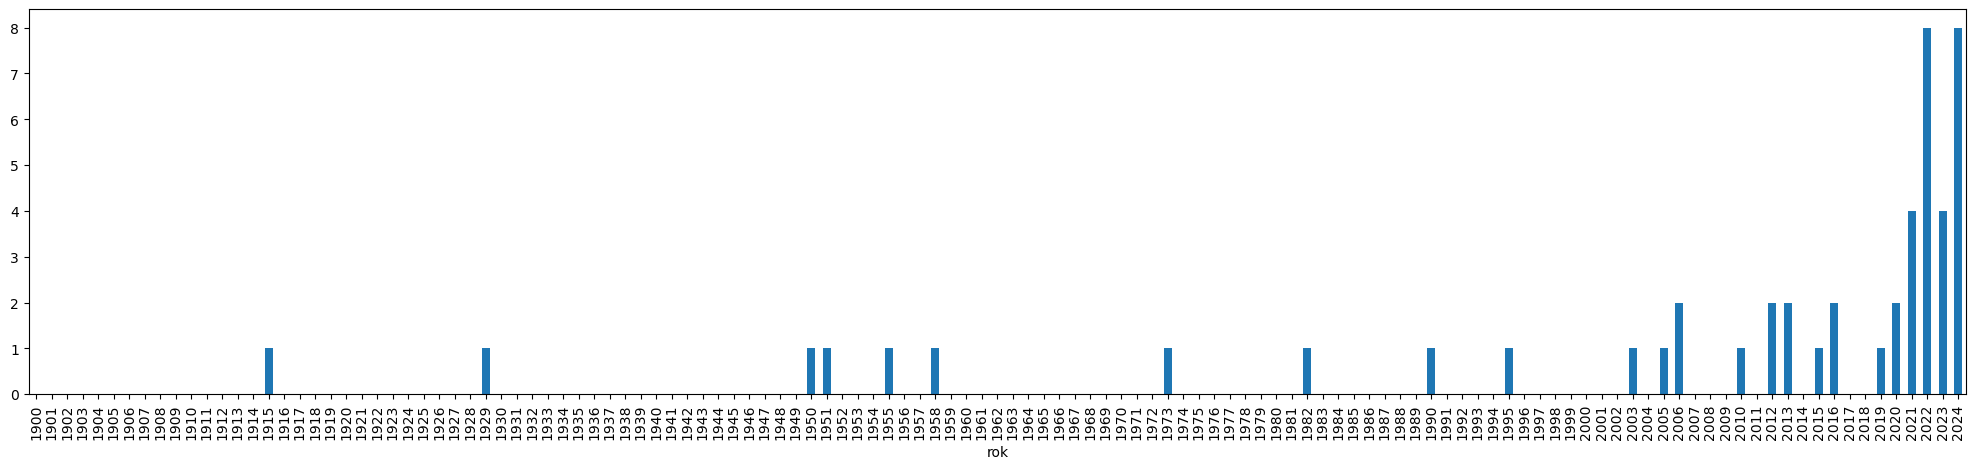

In [215]:
r(df2[df2.apply(lambda row: any("miliardář" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

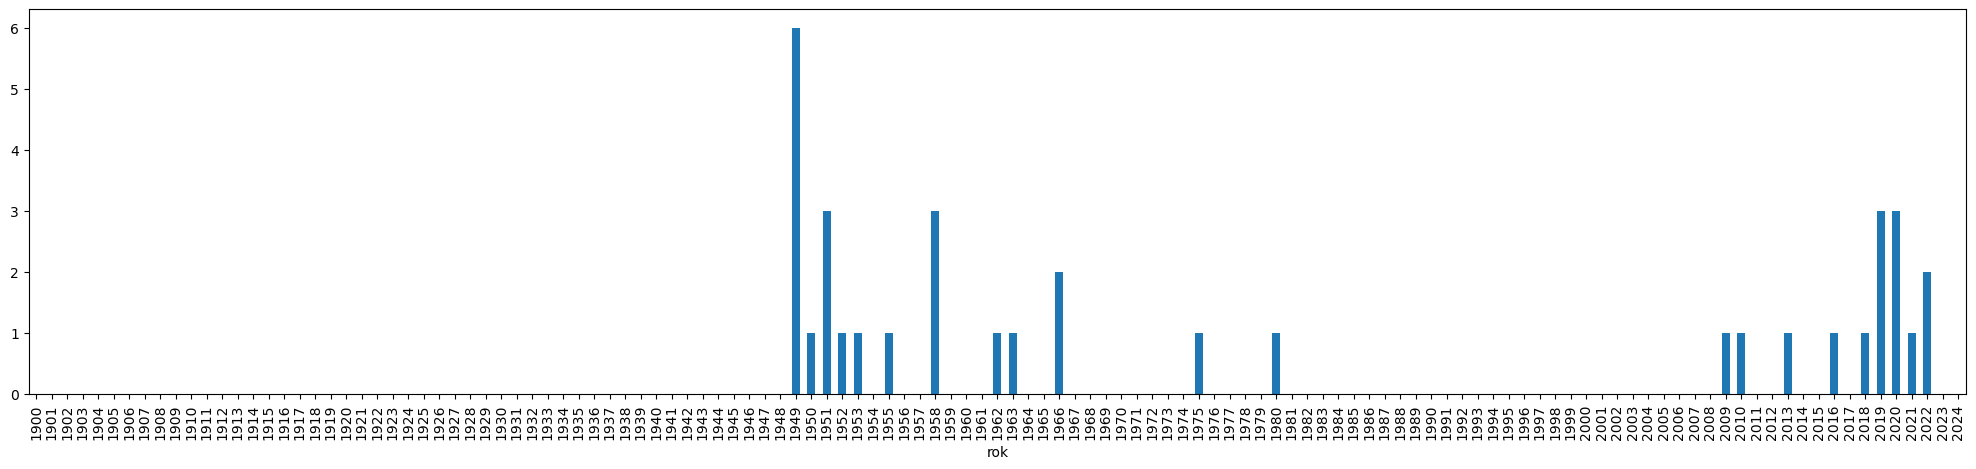

In [216]:
r(df2[df2.apply(lambda row: any("oligarch" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

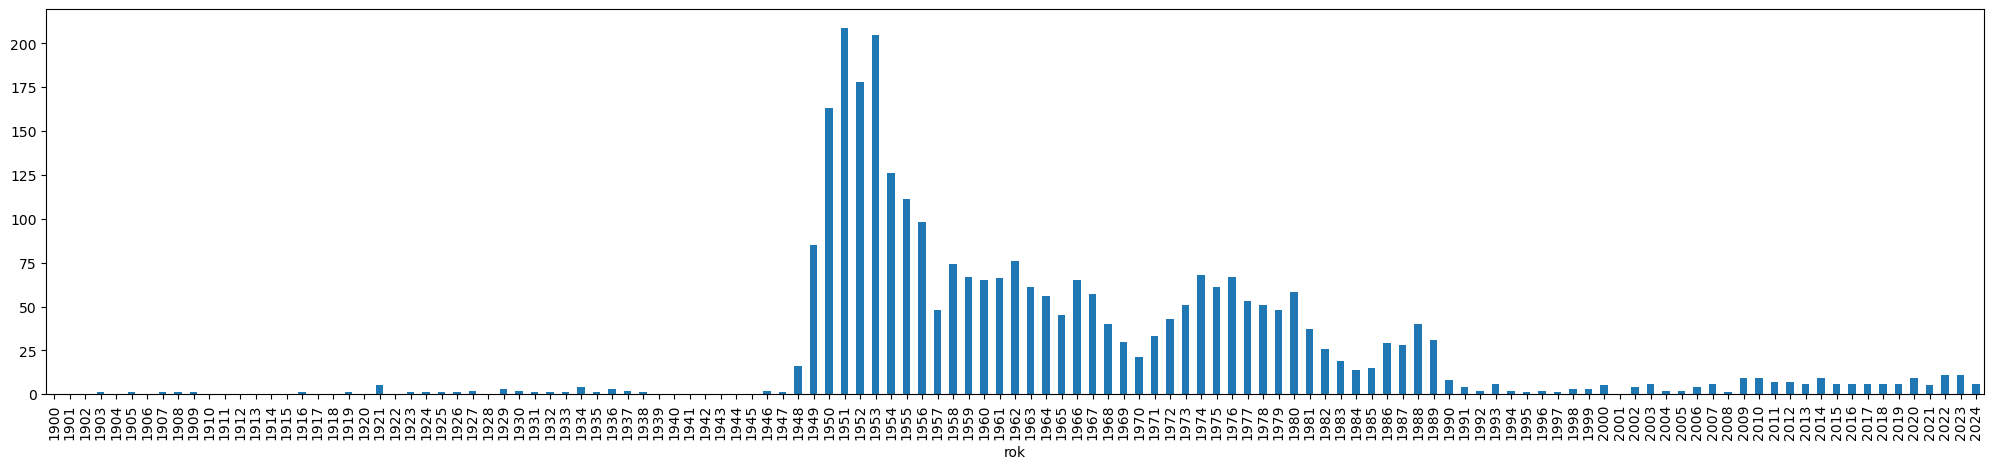

In [217]:
r(df2[df2.apply(lambda row: any("kapitalis" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

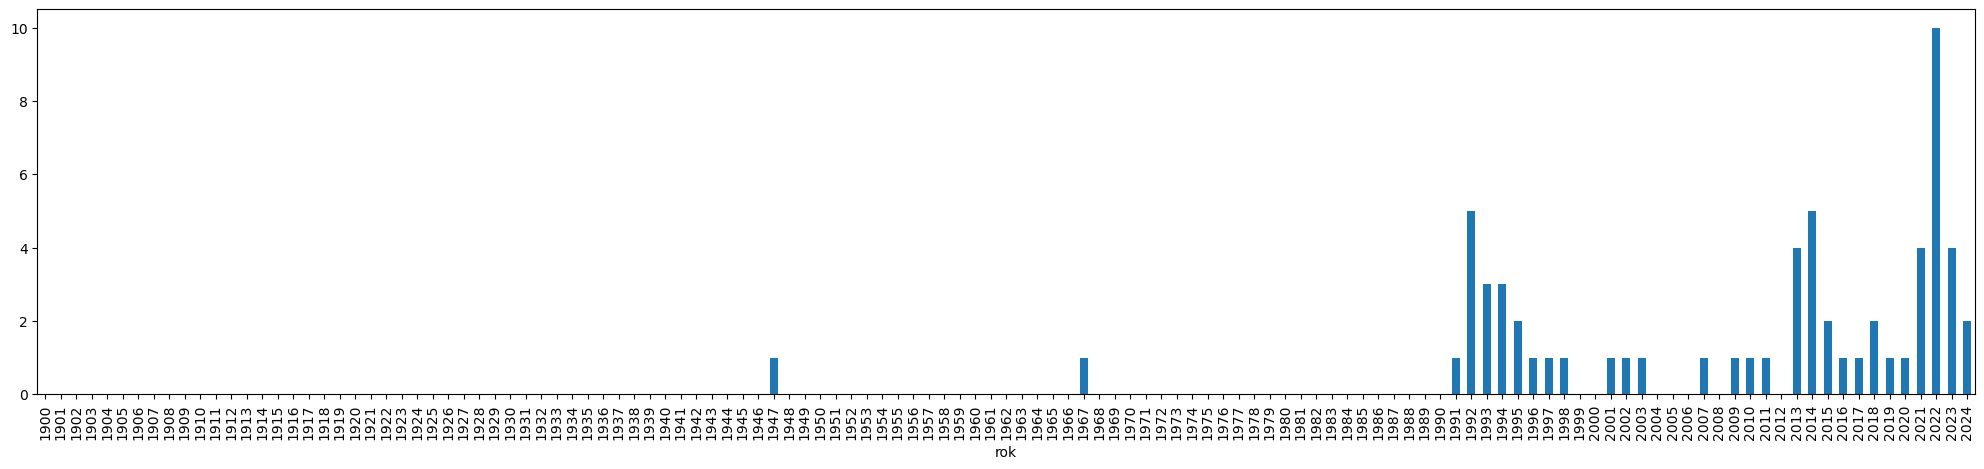

In [218]:
r(df2[df2.apply(lambda row: any("mickey" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

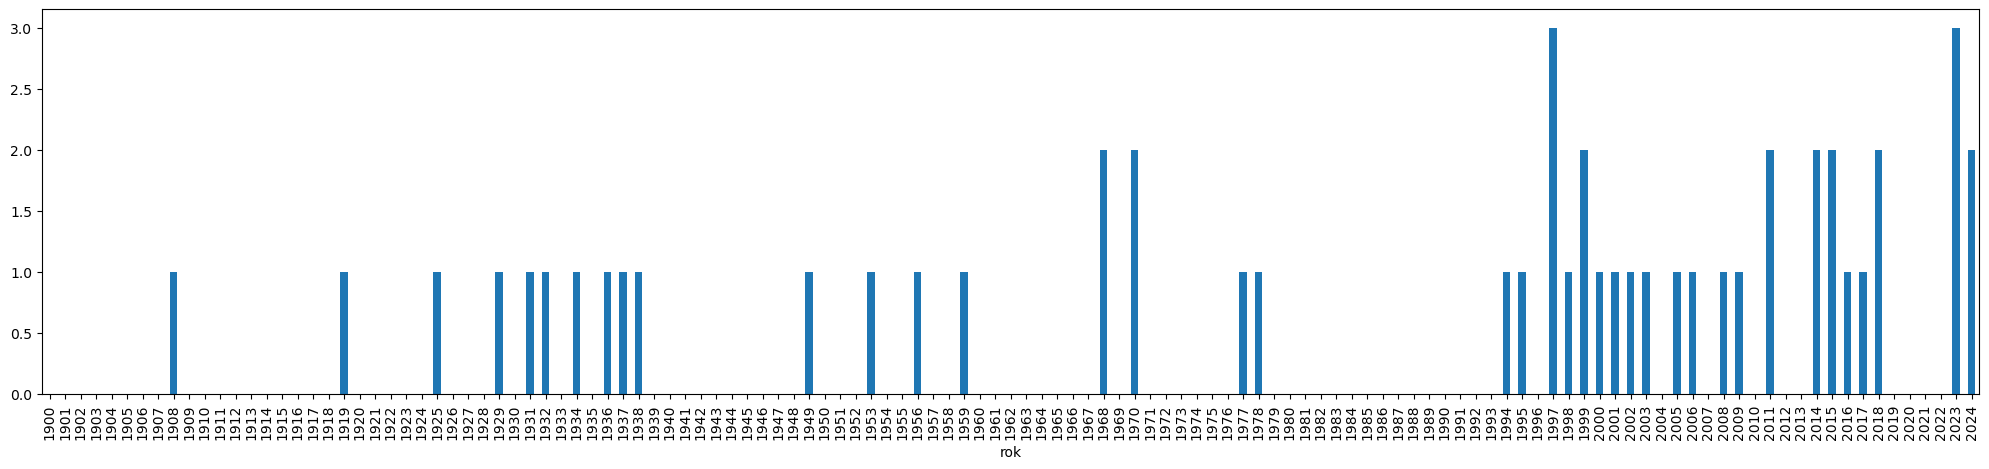

In [219]:
r(df2[df2.apply(lambda row: any("zásnub" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

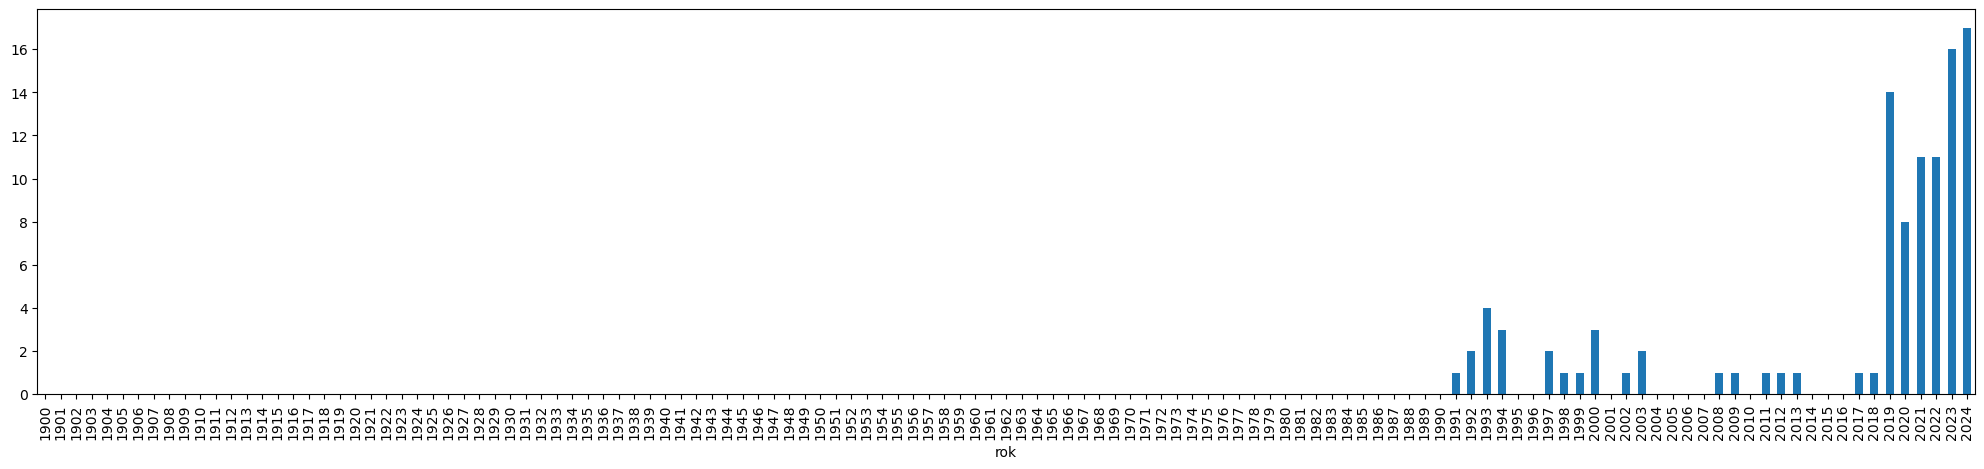

In [220]:
r(df2[df2.apply(lambda row: any("paranormáln" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

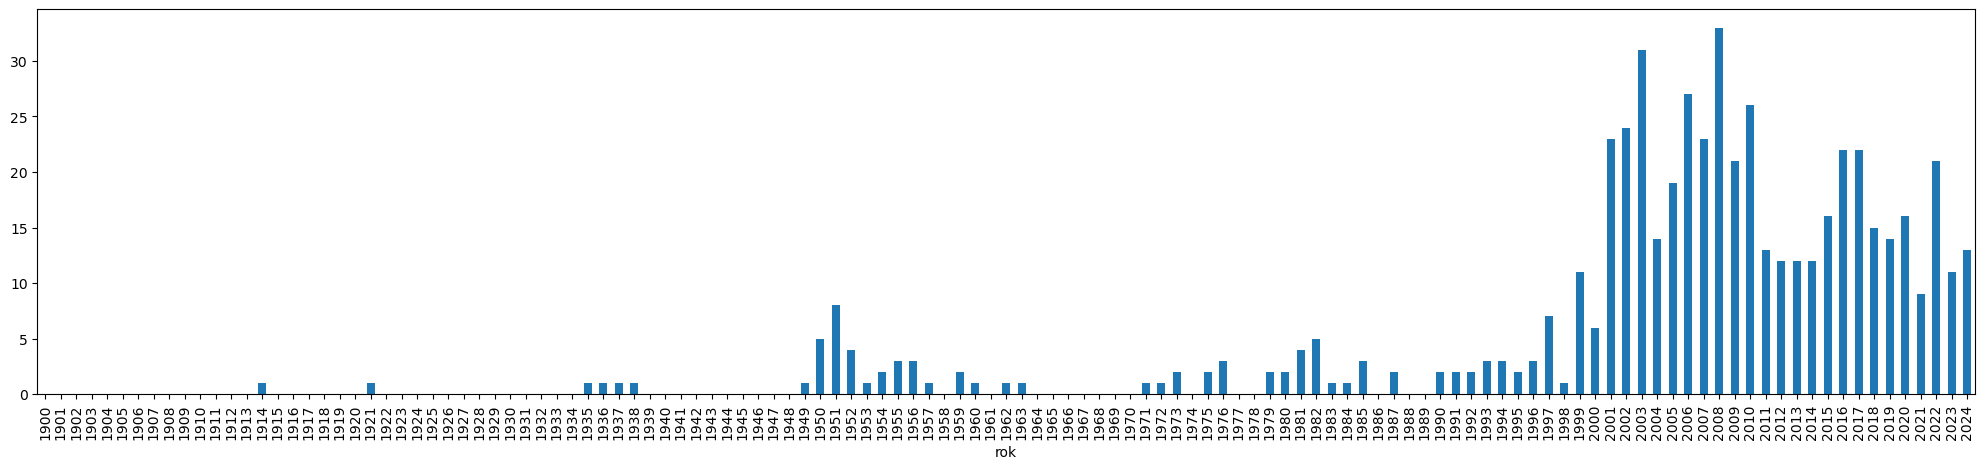

In [221]:
r(df2[df2.apply(lambda row: any("teroris" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

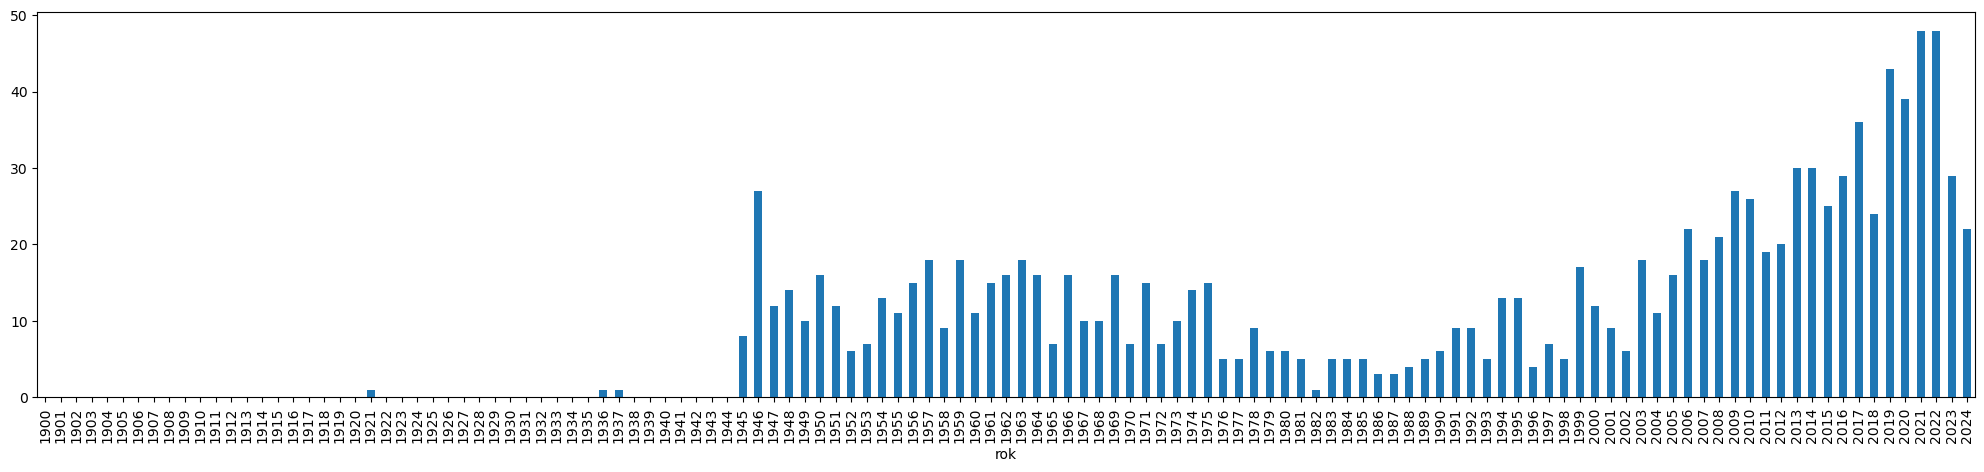

In [222]:
r(df2[df2.apply(lambda row: any("koncentrační" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

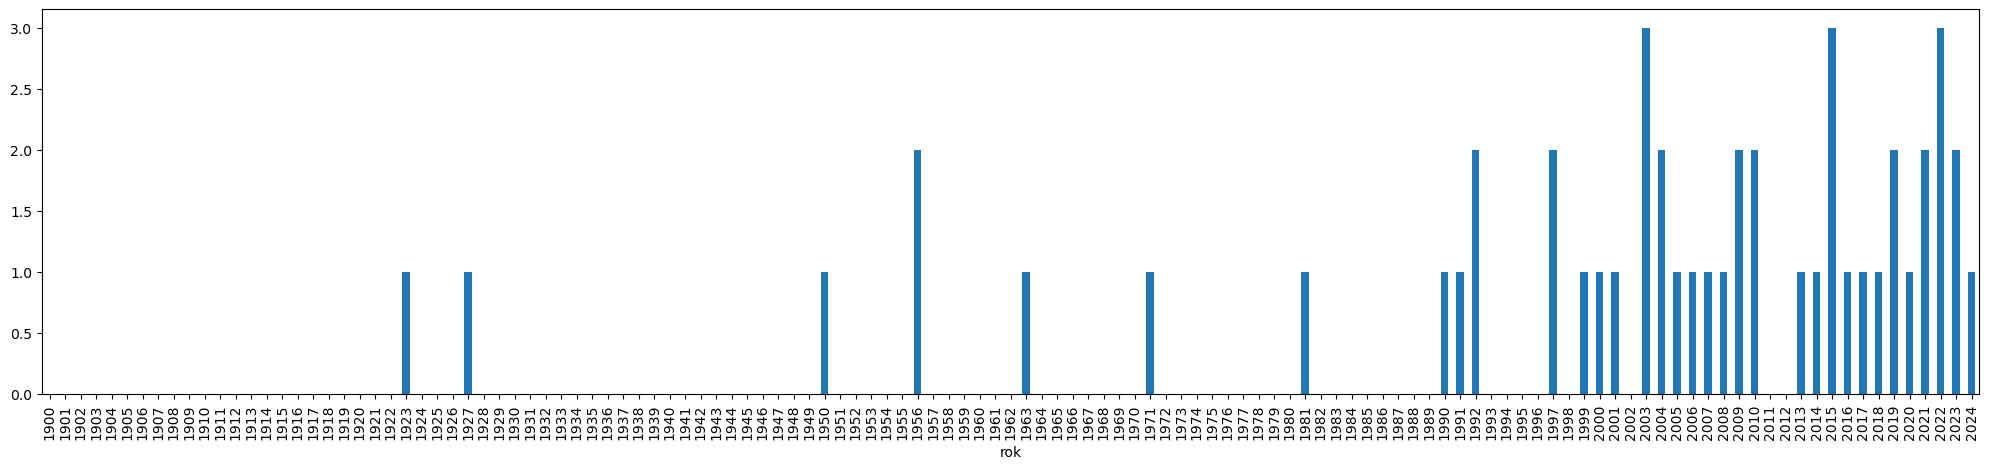

In [223]:
r(df2[df2.apply(lambda row: any("pornog" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

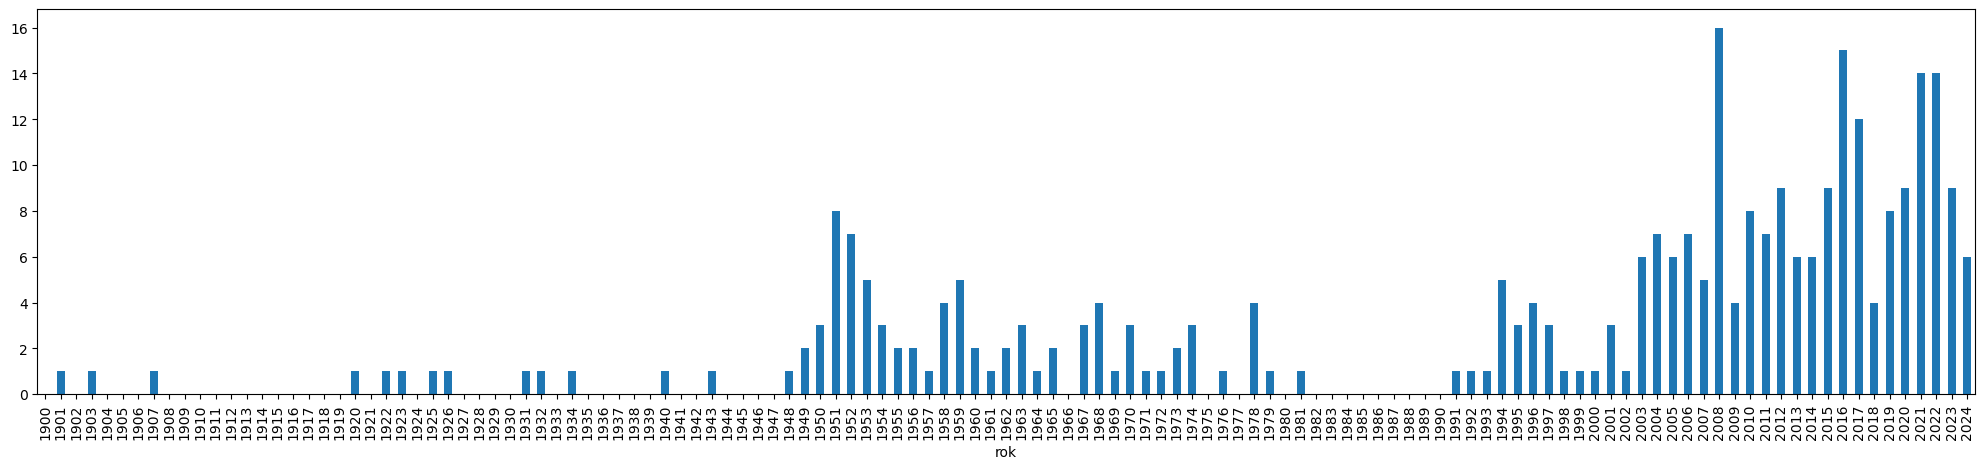

In [224]:
r(df2[df2.apply(lambda row: any("uprchlí" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

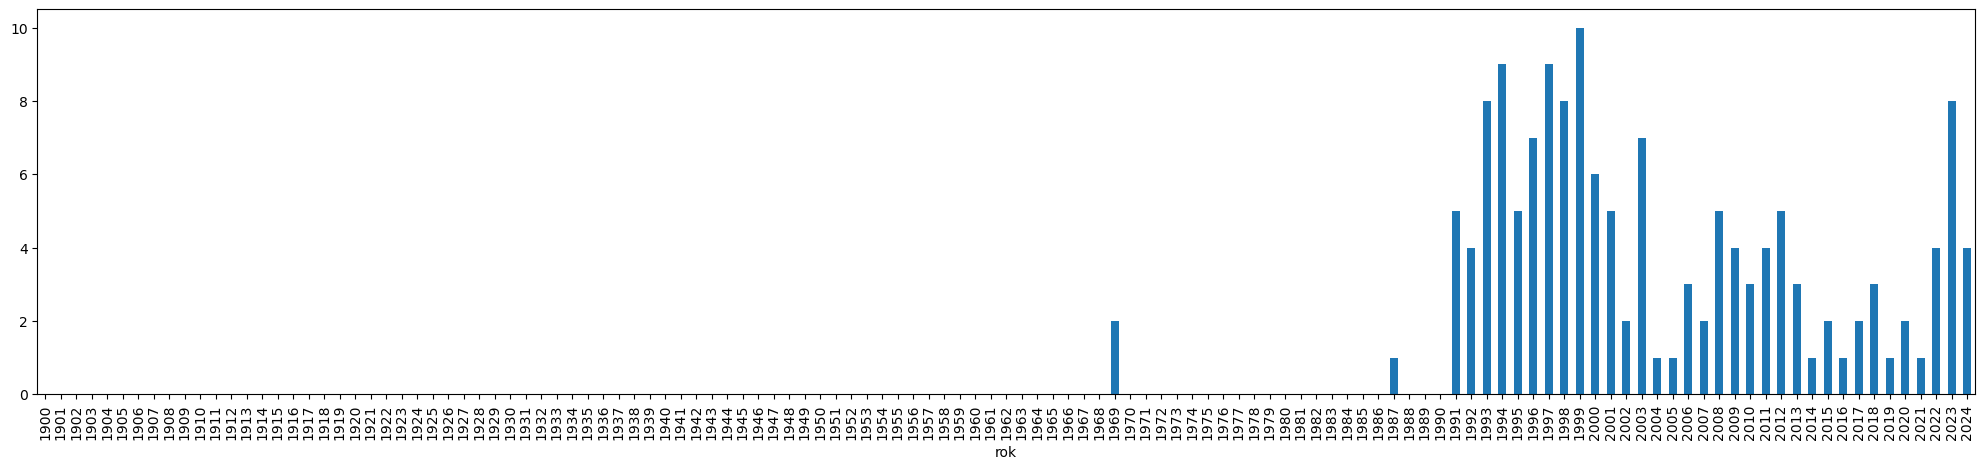

In [225]:
r(df2[df2.apply(lambda row: any("UFO" in str(value) for value in row), axis=1)])

<Axes: xlabel='rok'>

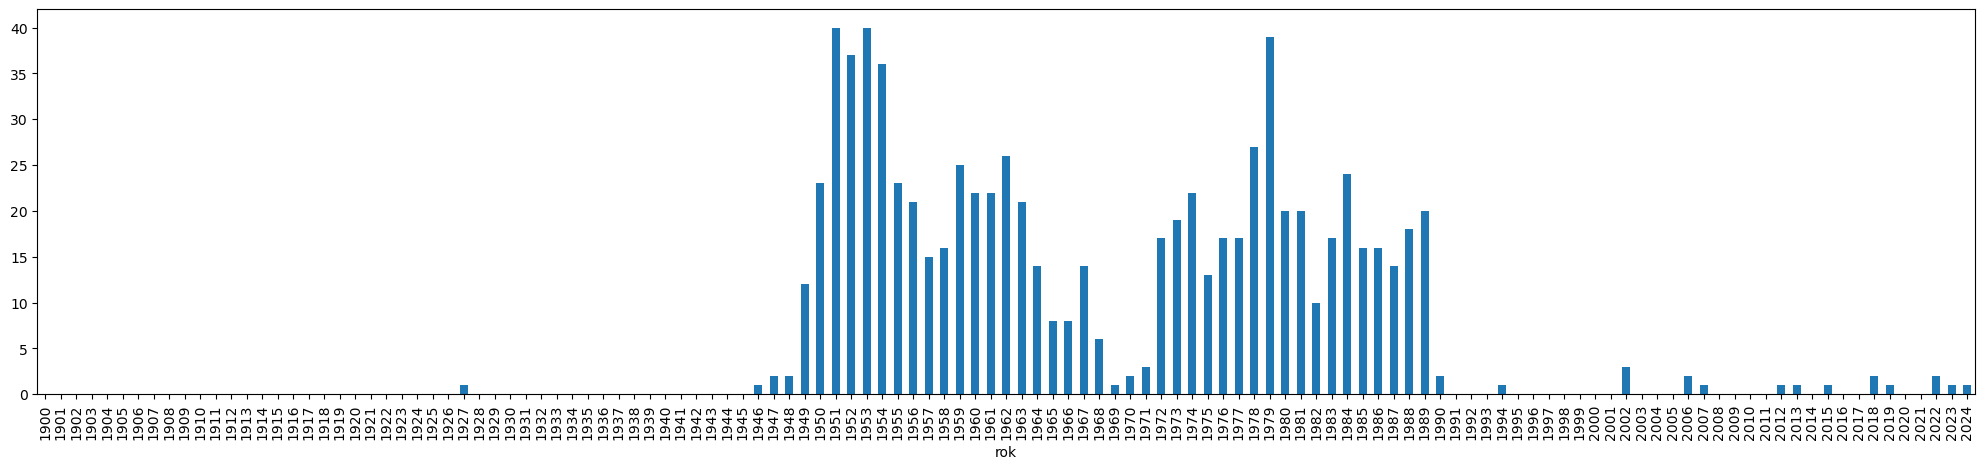

In [226]:
r(df2[df2.apply(lambda row: any("pionýr" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

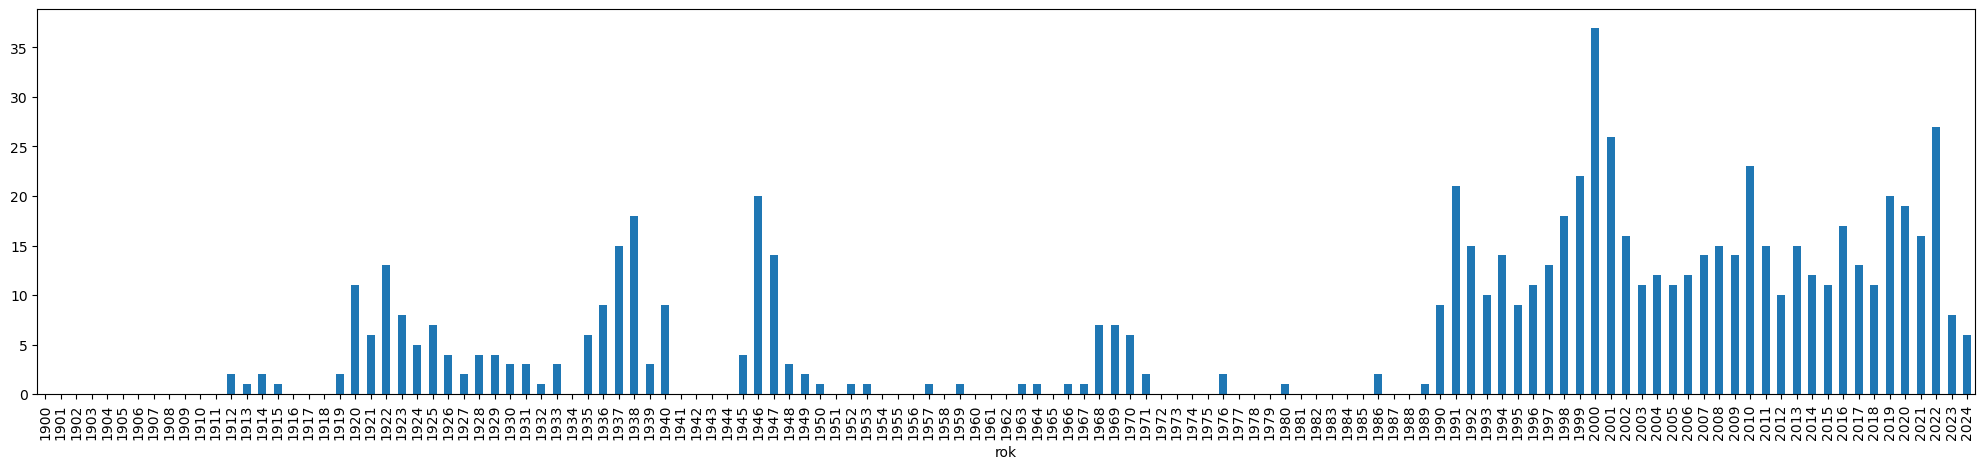

In [227]:
r(df2[df2.apply(lambda row: any("skaut" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

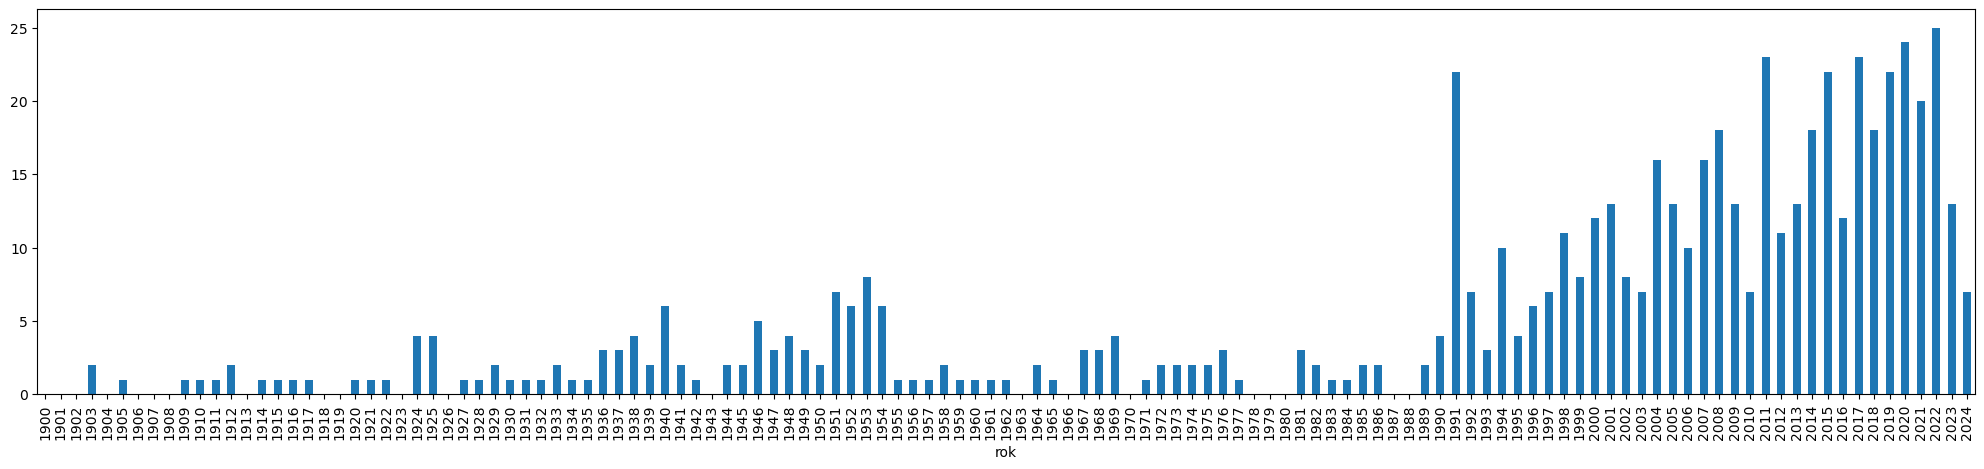

In [228]:
r(df2[df2.apply(lambda row: any("bylin" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

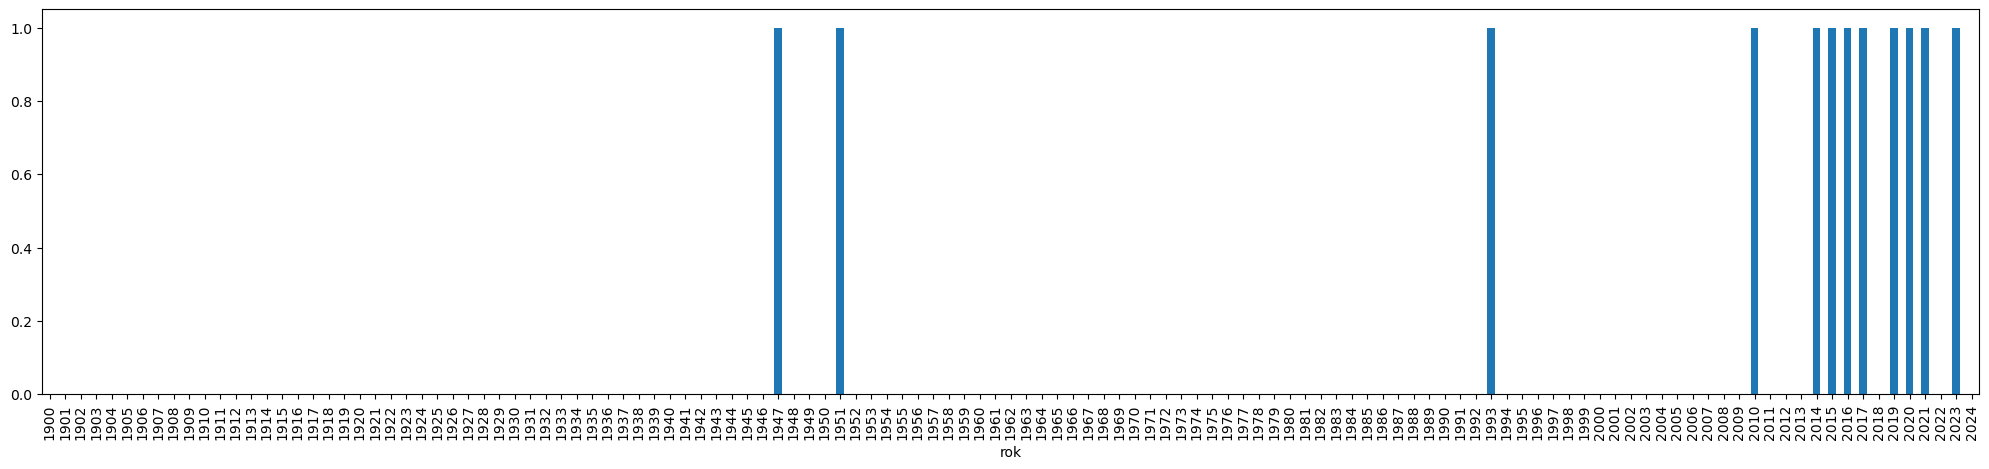

In [229]:
r(df2[df2.apply(lambda row: any("konspirac" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

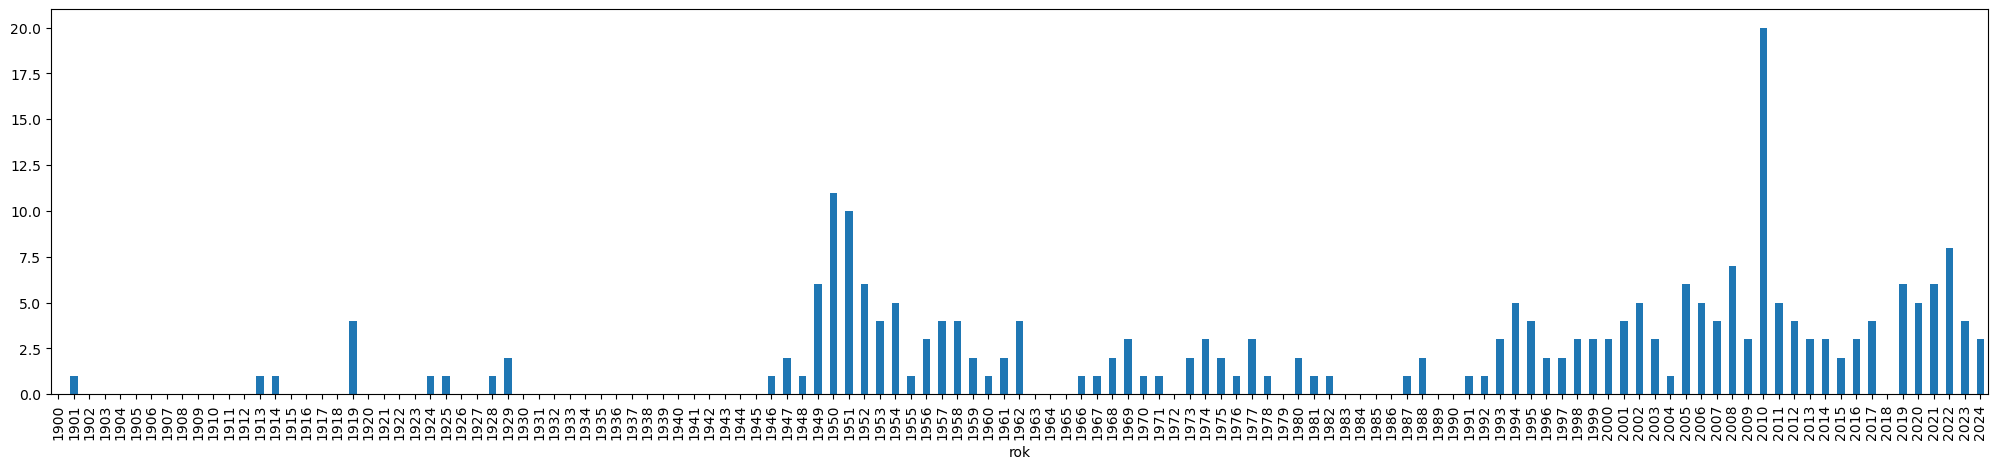

In [230]:
r(df2[df2.apply(lambda row: any("spiknutí" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

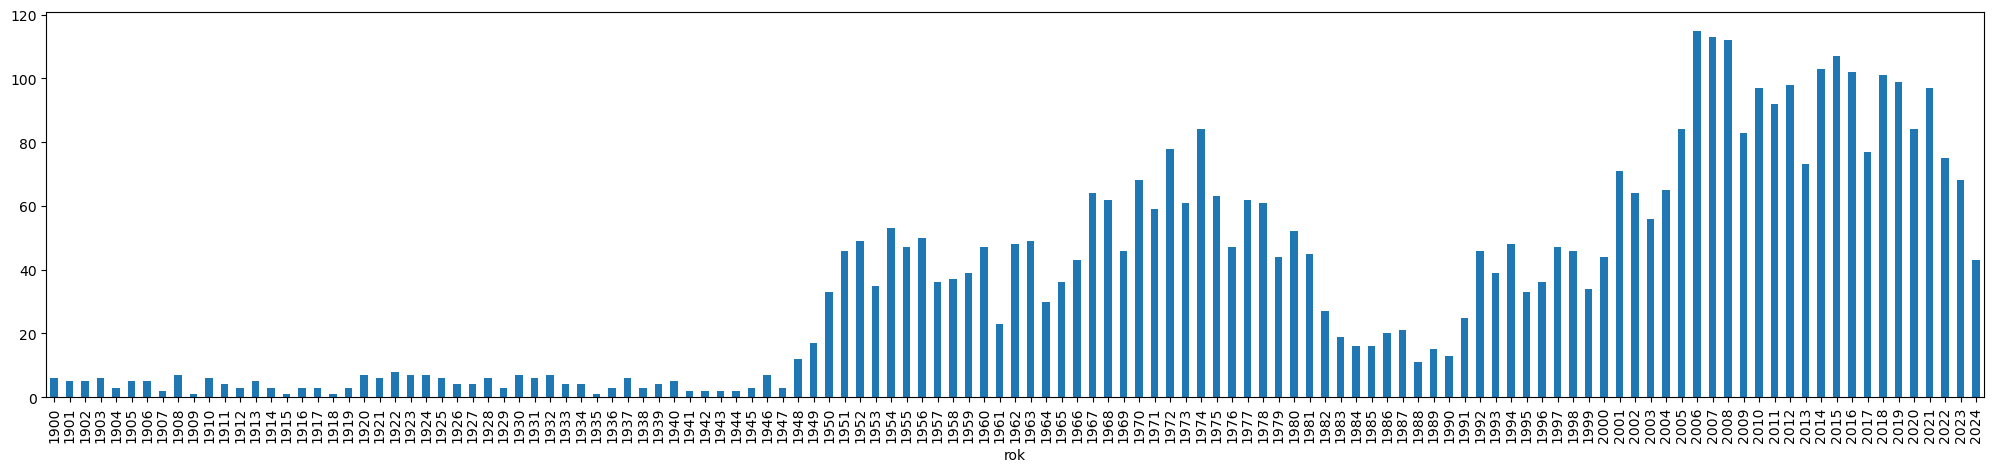

In [231]:
r(df2[df2.apply(lambda row: any("přírodní" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

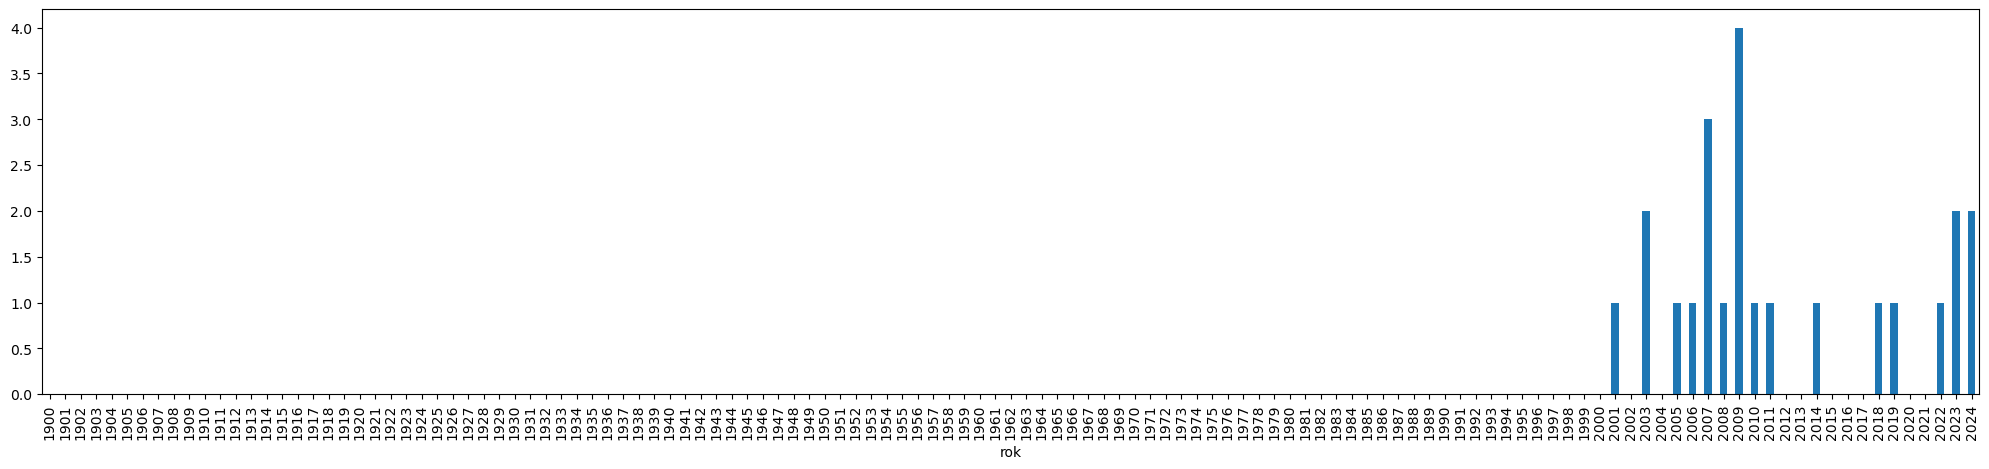

In [232]:
r(df2[df2.apply(lambda row: any("matrix" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

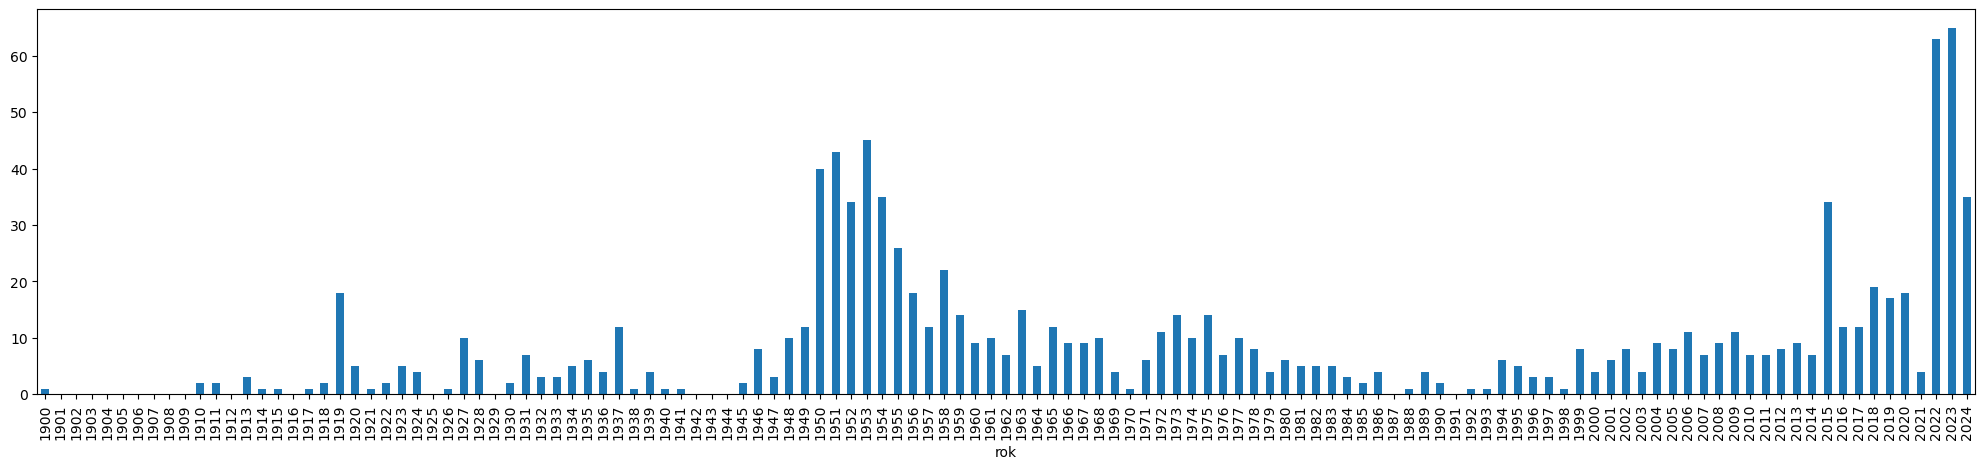

In [233]:
r(df2[df2.apply(lambda row: any("ukrajin" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

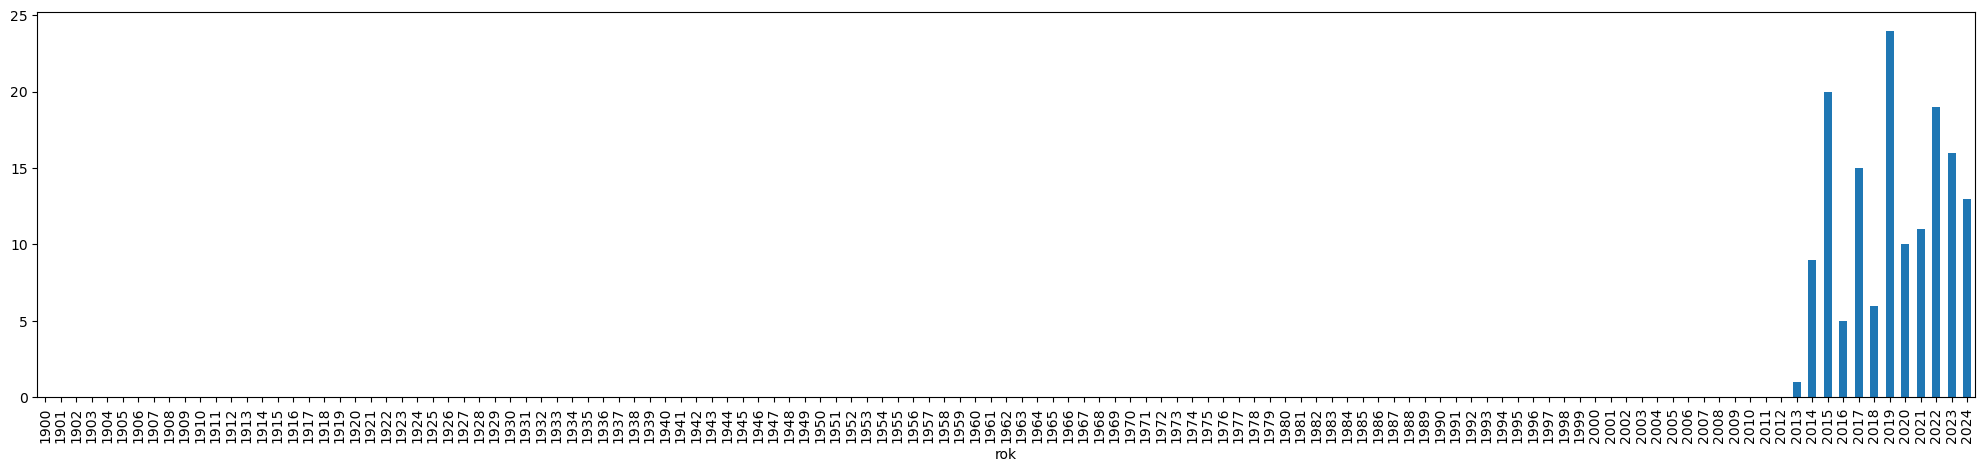

In [234]:
r(df2[df2.apply(lambda row: any("minecraft" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

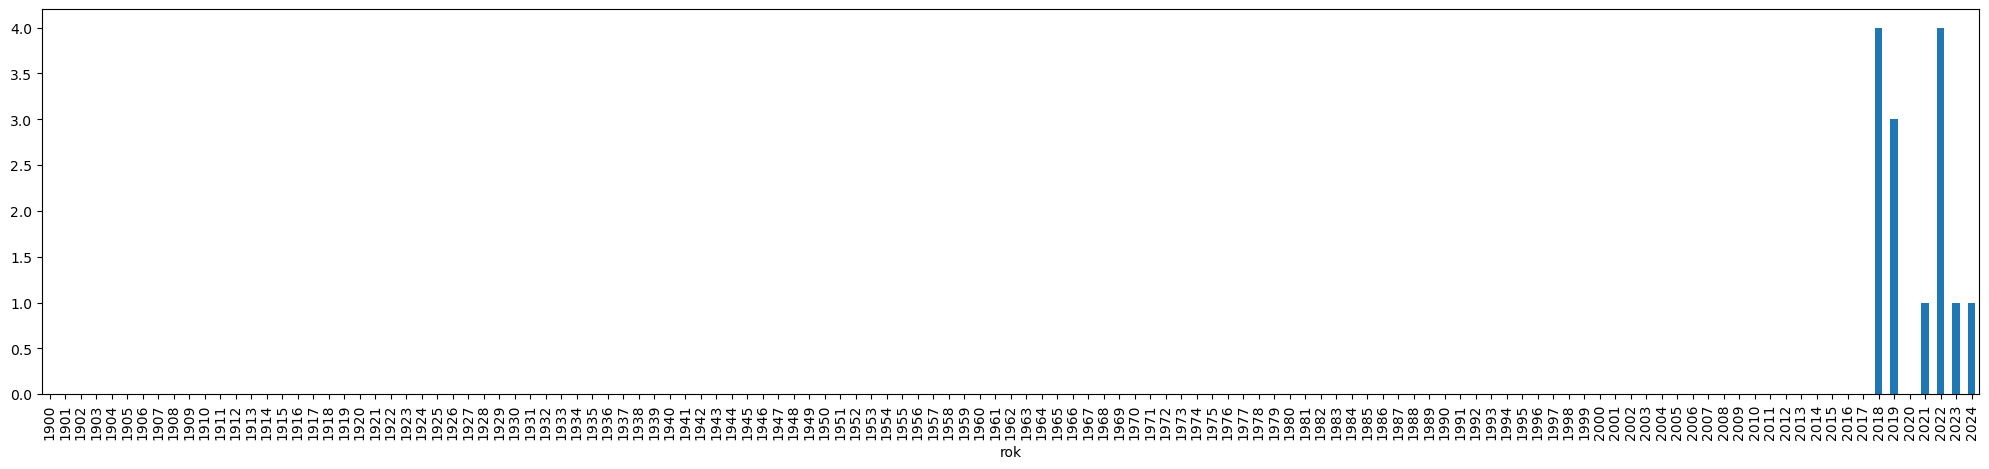

In [235]:
r(df2[df2.apply(lambda row: any("roblox" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

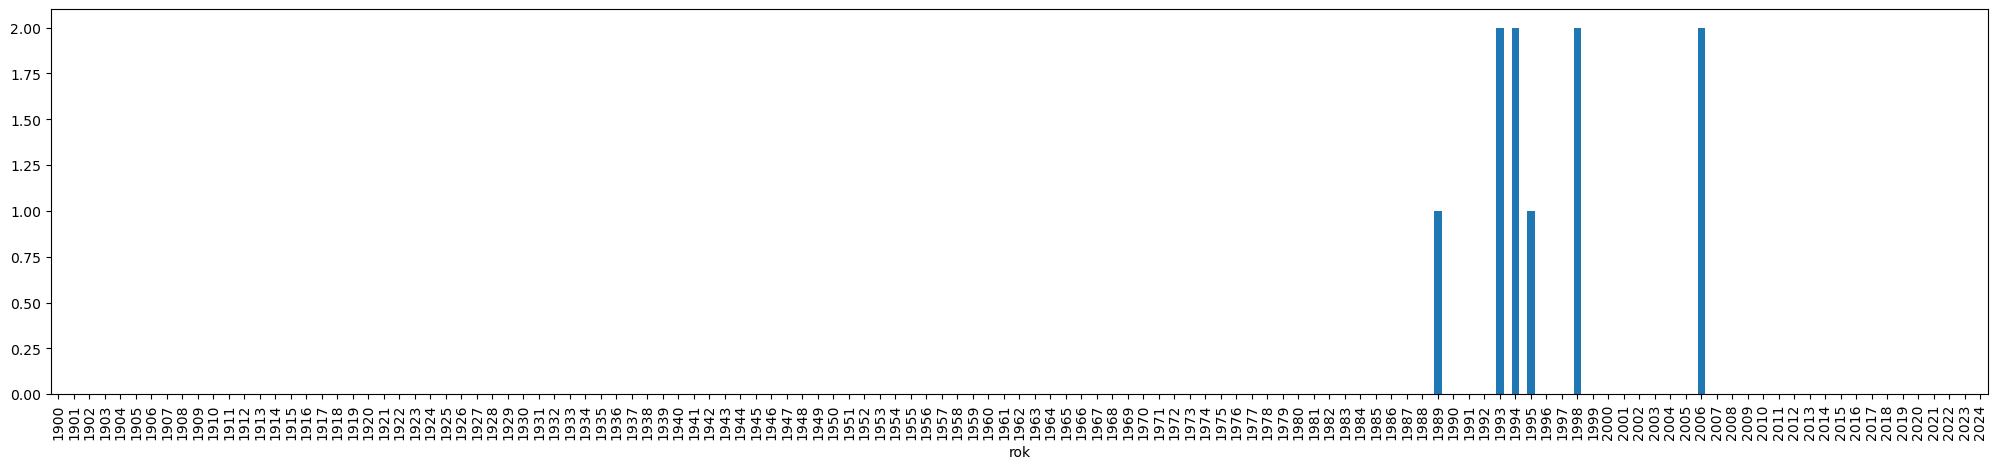

In [236]:
r(df2[df2.apply(lambda row: any("Unix" in str(value) for value in row), axis=1)])

<Axes: xlabel='rok'>

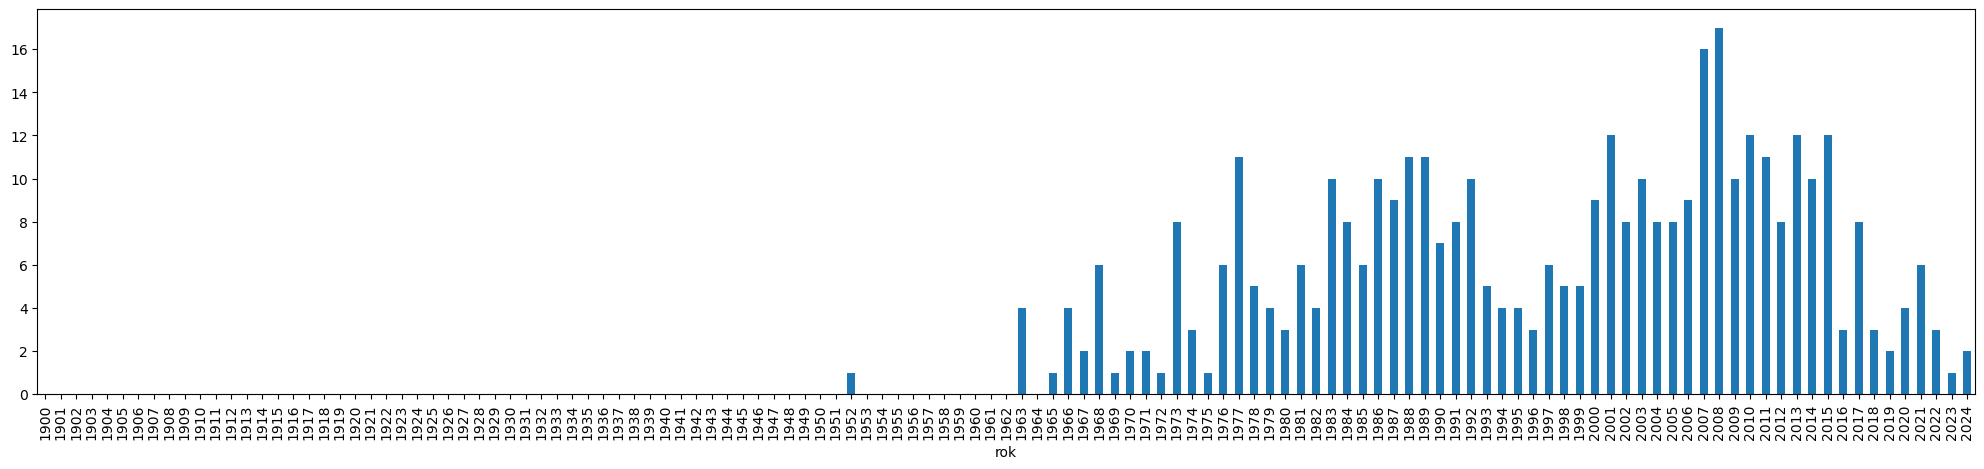

In [237]:
r(df2[df2.apply(lambda row: any("algoritm" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

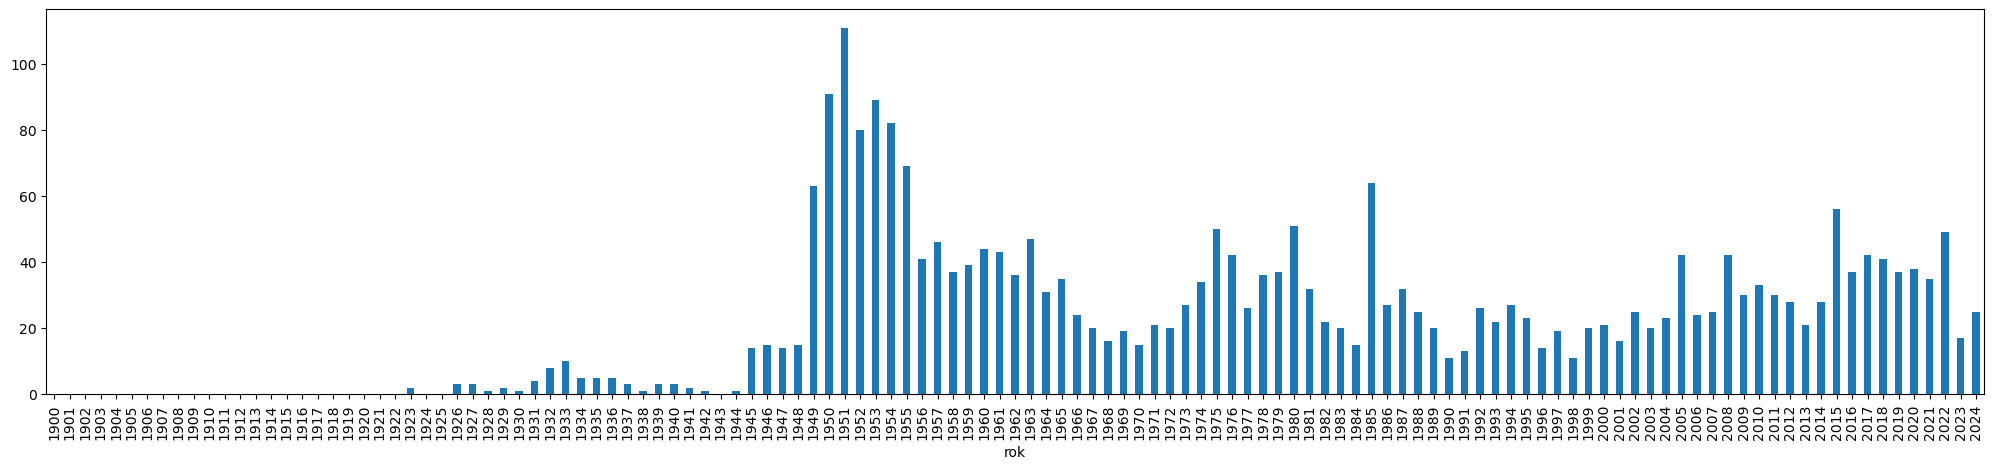

In [238]:
r(df2[df2.apply(lambda row: any("fašis" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

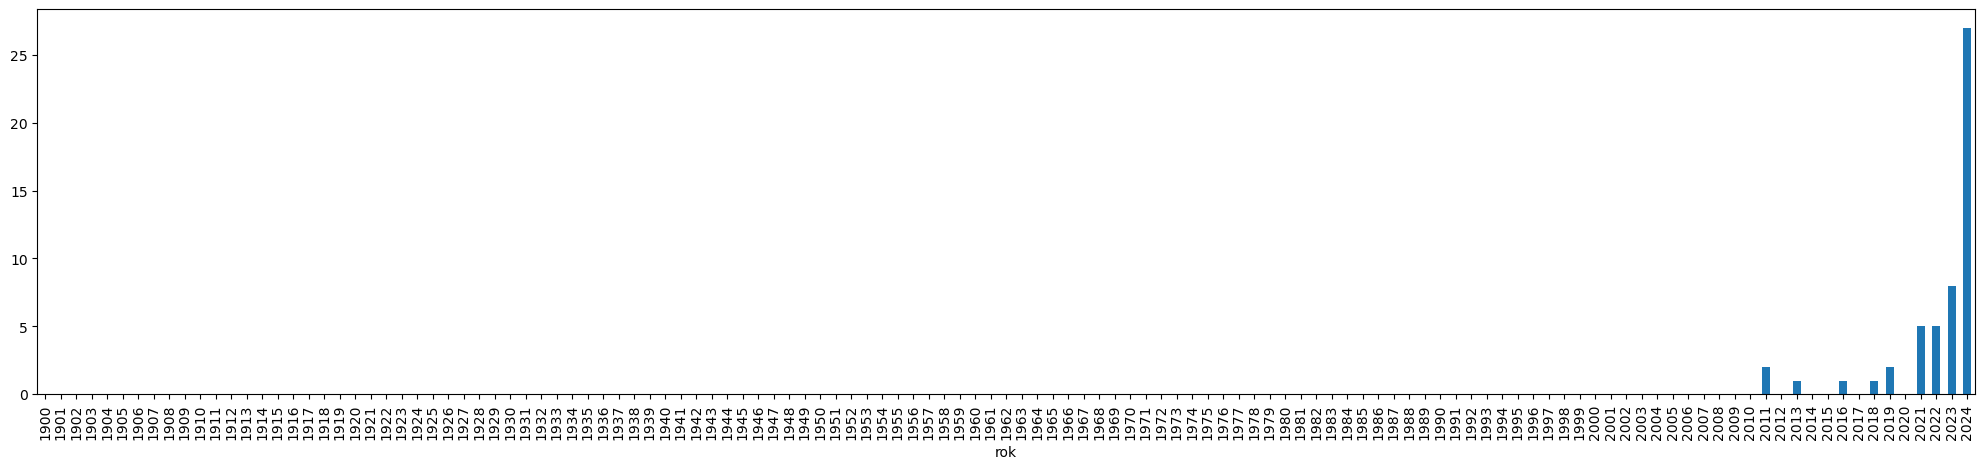

In [239]:
r(df2[df2.apply(lambda row: any("queer" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

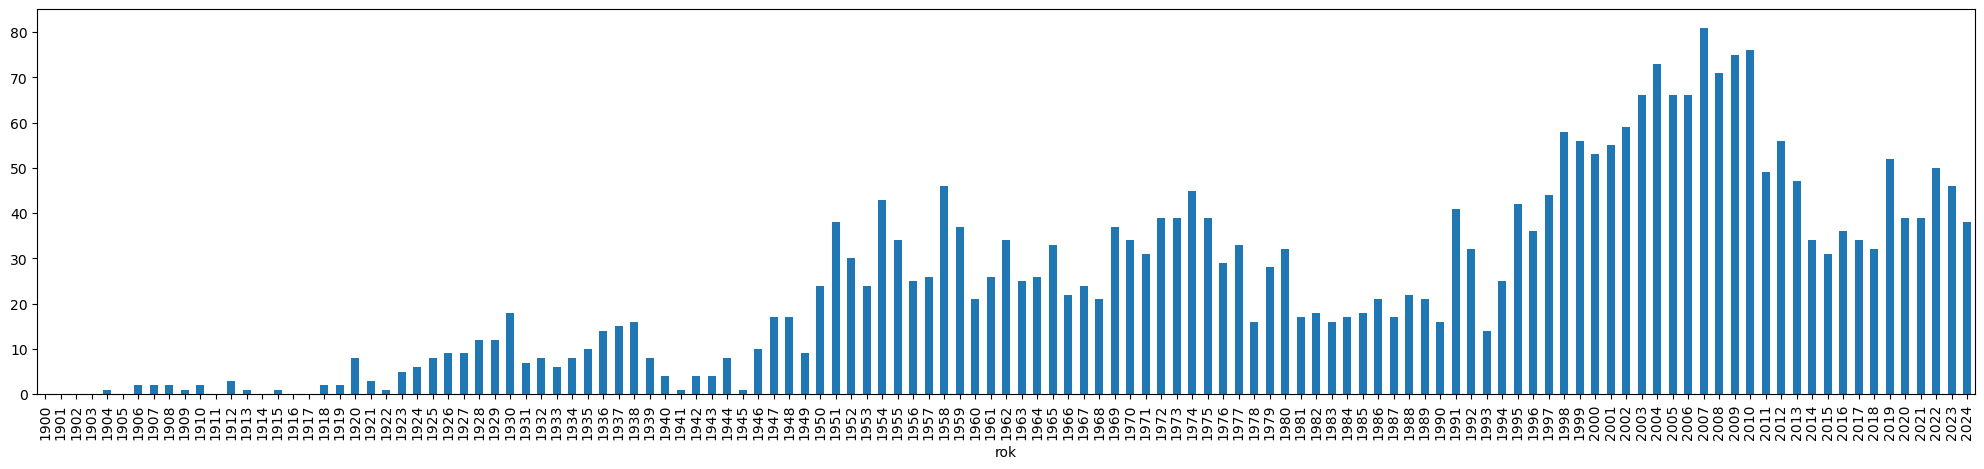

In [240]:
r(df2[df2.apply(lambda row: any("automob" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

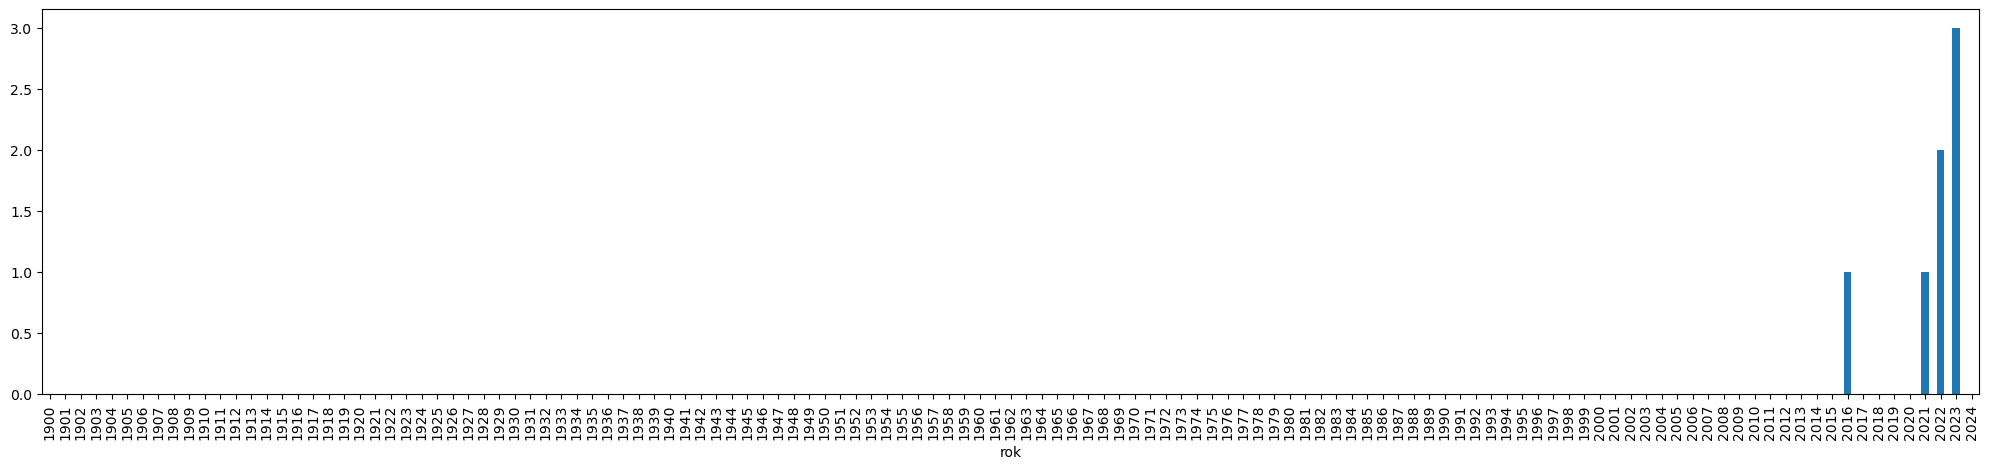

In [241]:
r(df2[df2.apply(lambda row: any("BDSM" in str(value) for value in row), axis=1)])

<Axes: xlabel='rok'>

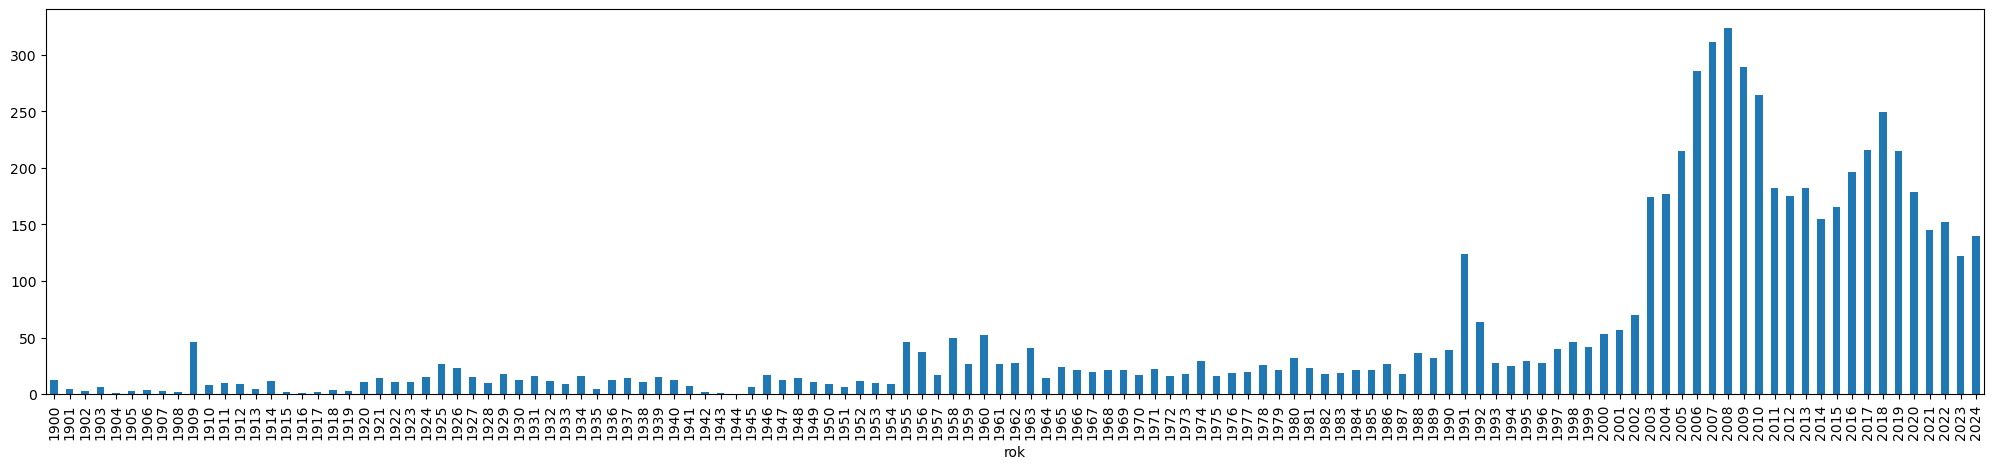

In [242]:
r(df2[df2.apply(lambda row: any("turist" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

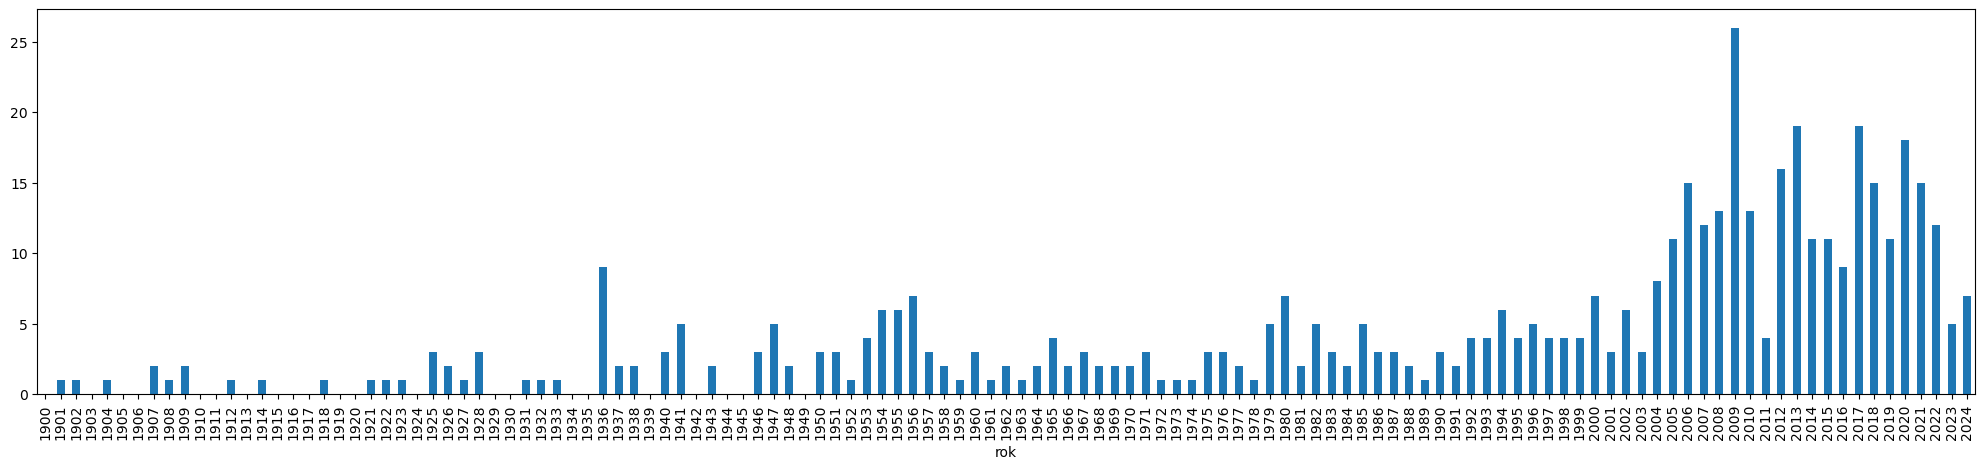

In [243]:
r(df2[df2.apply(lambda row: any("cyklist" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

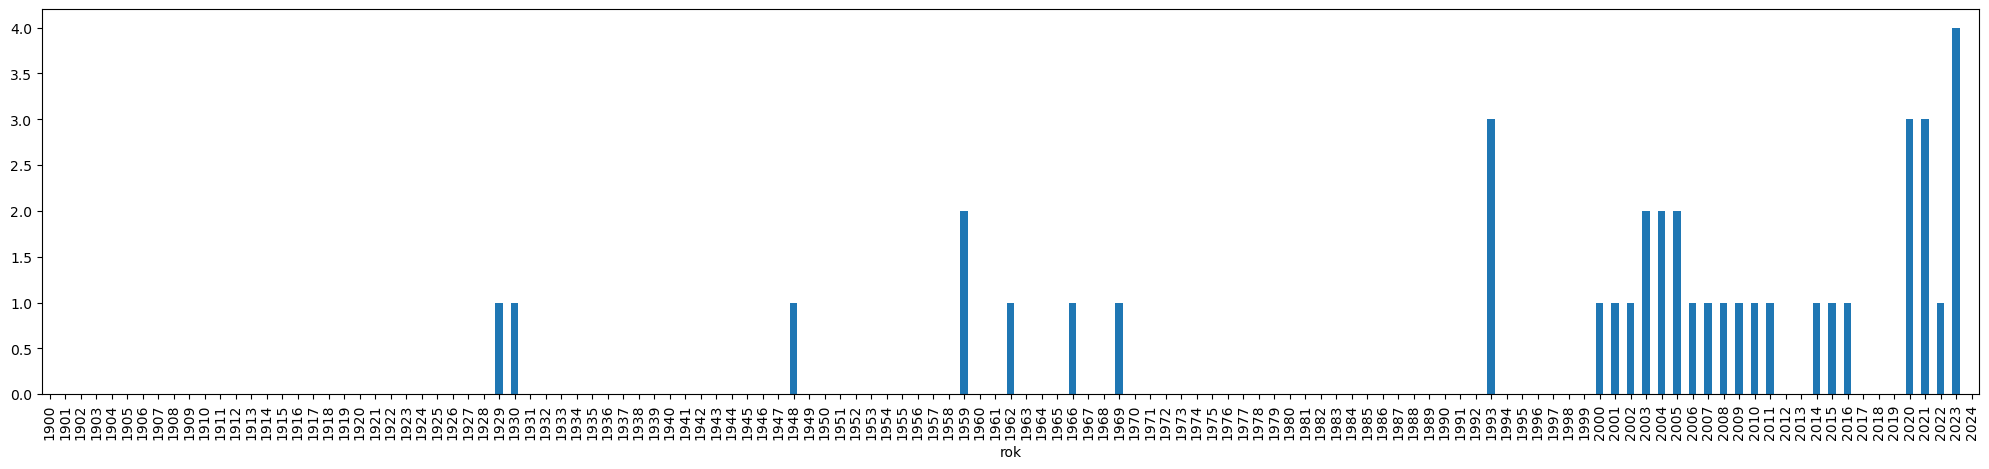

In [244]:
r(df2[df2.apply(lambda row: any("lesbi" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

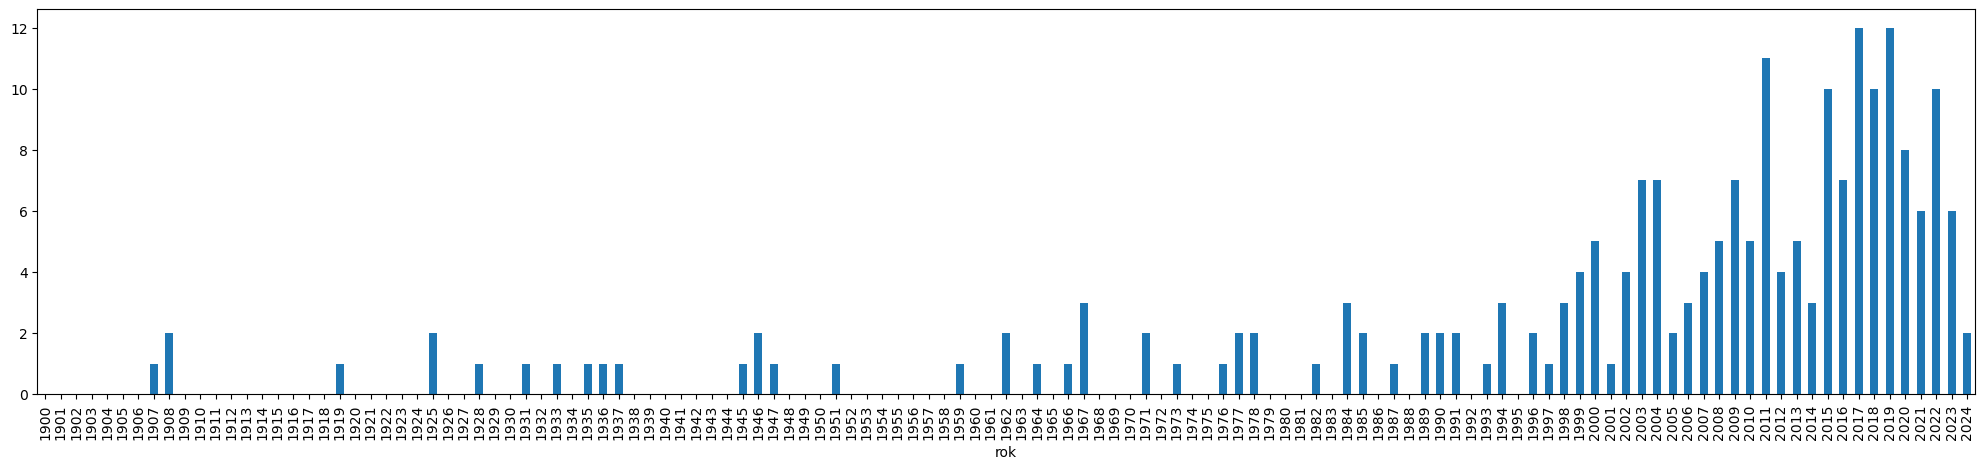

In [245]:
r(df2[df2.apply(lambda row: any("gay" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

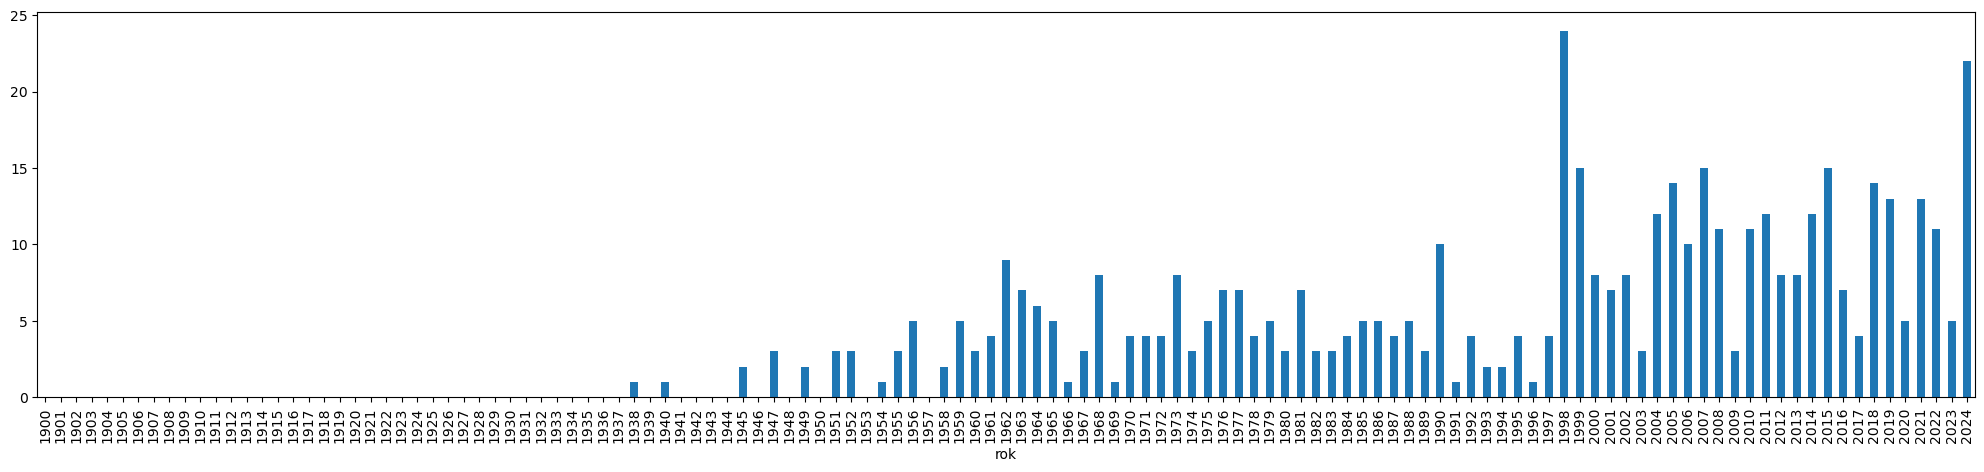

In [246]:
r(df2[df2.apply(lambda row: any("hokej" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

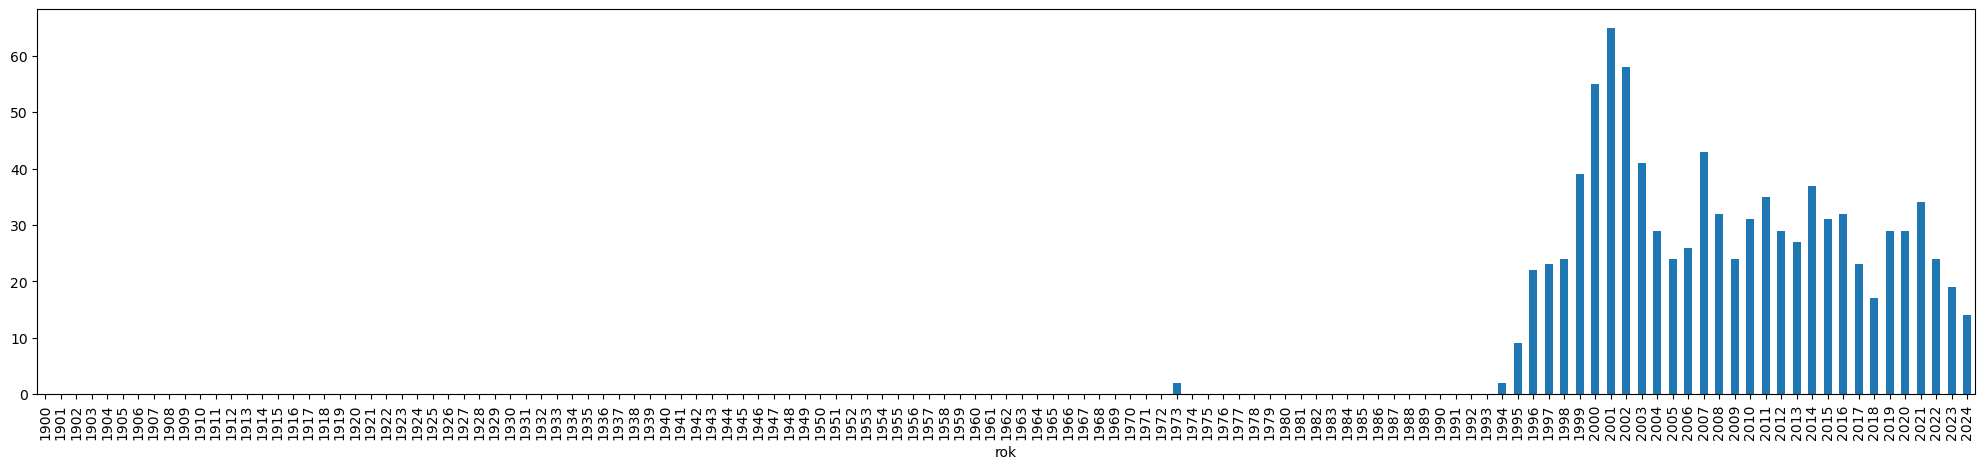

In [247]:
r(df2[df2.apply(lambda row: any("internet" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

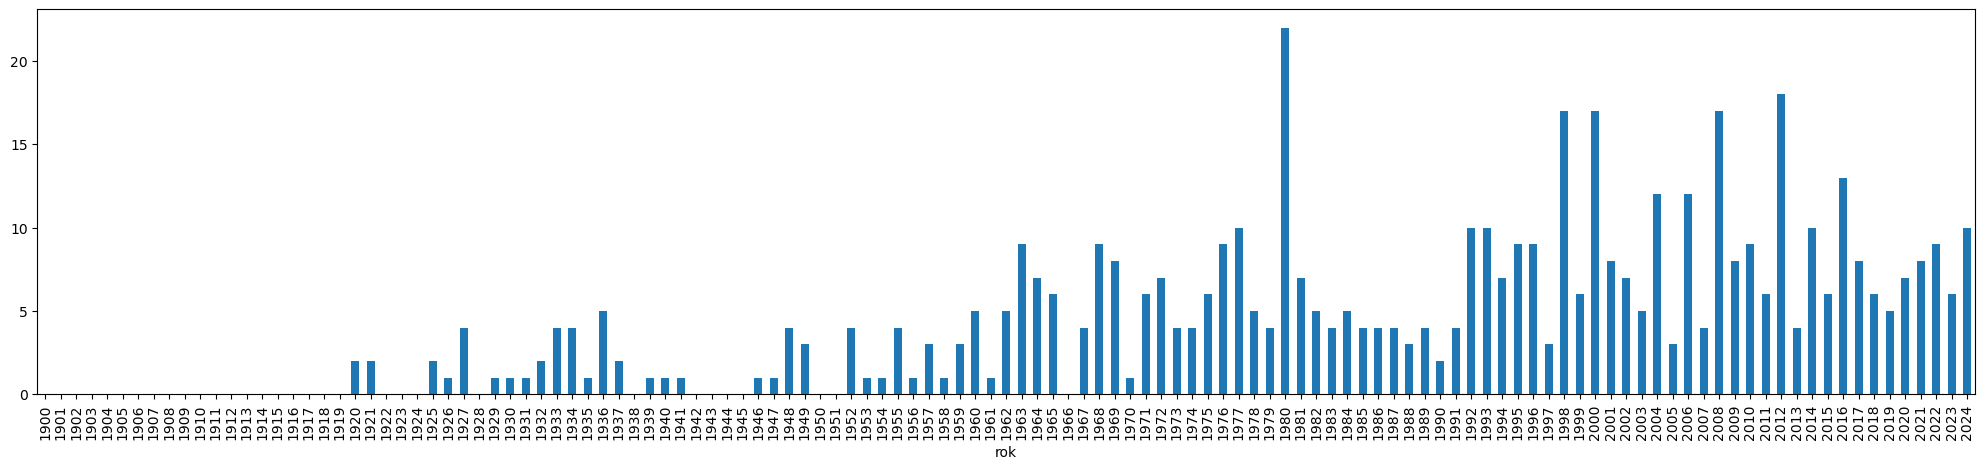

In [248]:
r(df2[df2.apply(lambda row: any("olympi" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

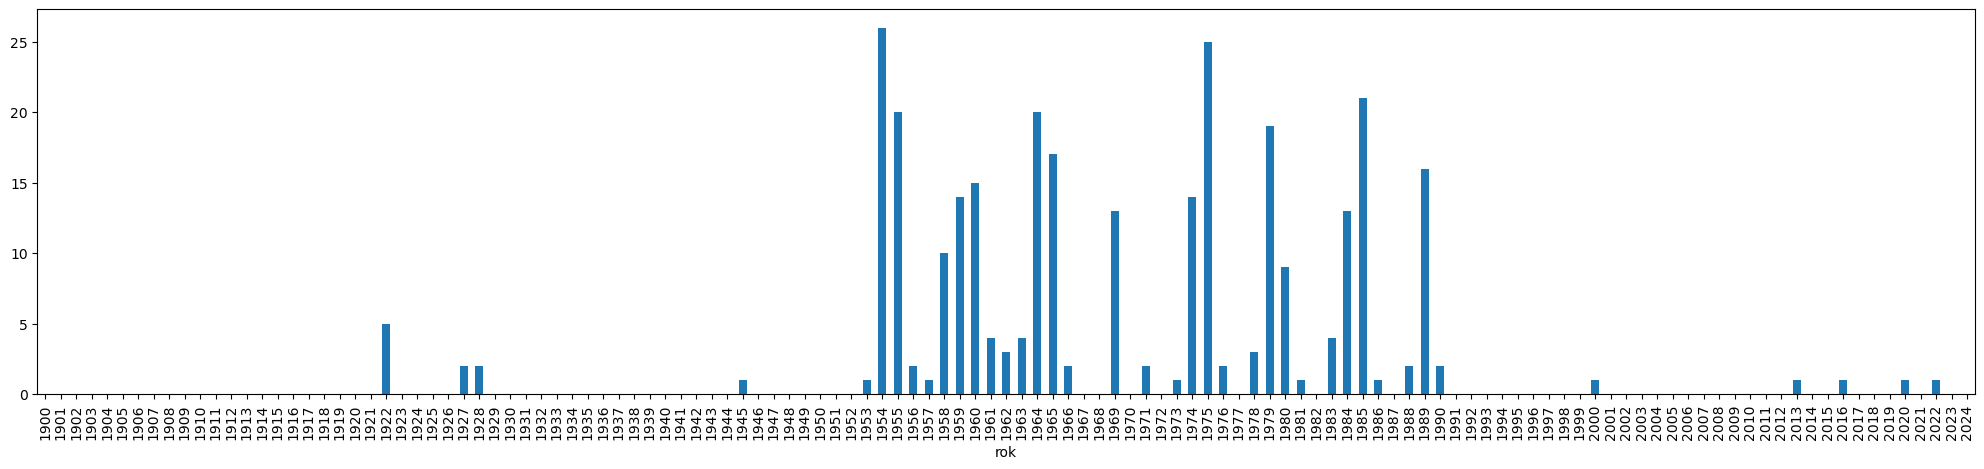

In [249]:
r(df2[df2.apply(lambda row: any("spartaki" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

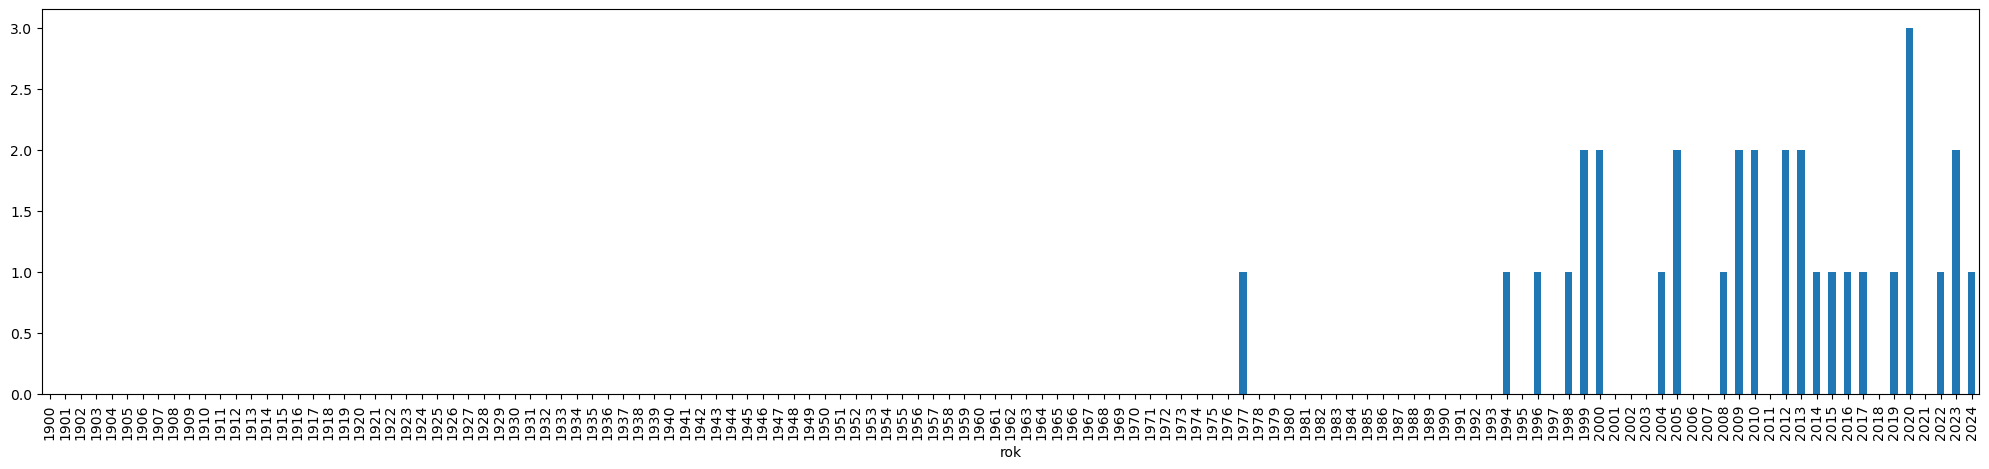

In [250]:
r(df2[df2.apply(lambda row: any("parkinsonov" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

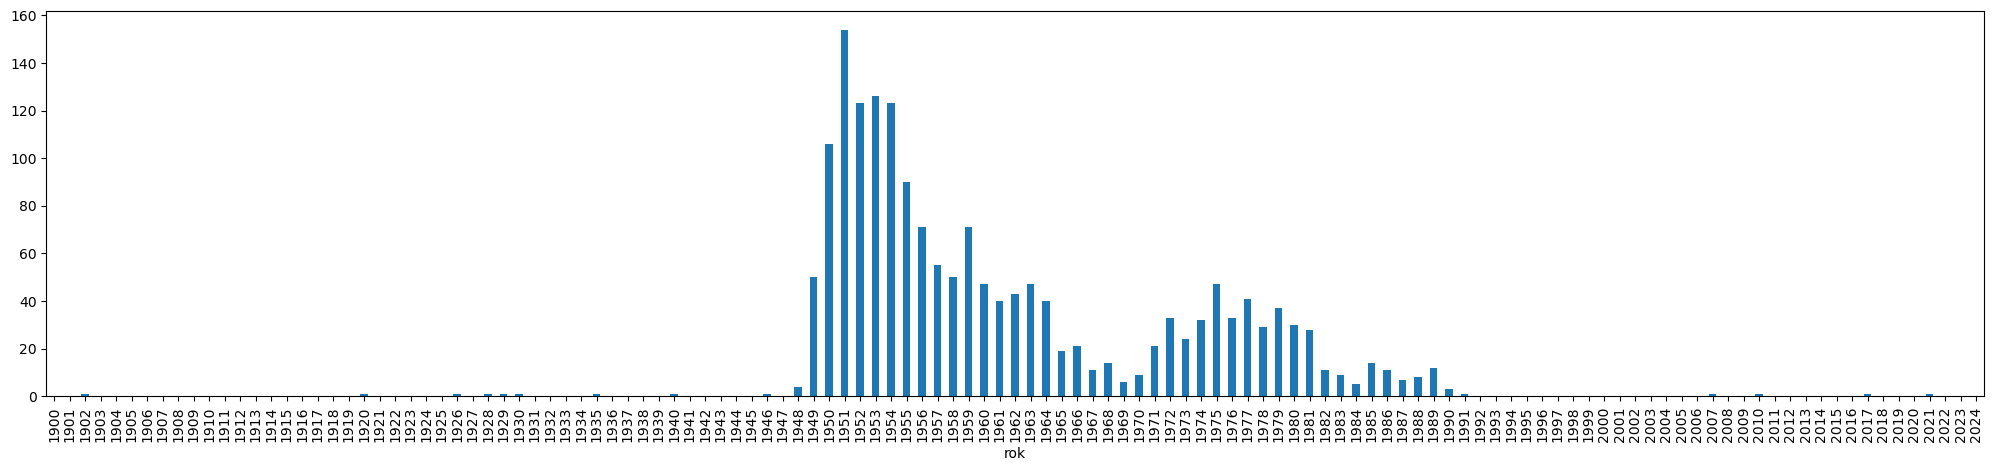

In [251]:
r(df2[df2.apply(lambda row: any("buržoa" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

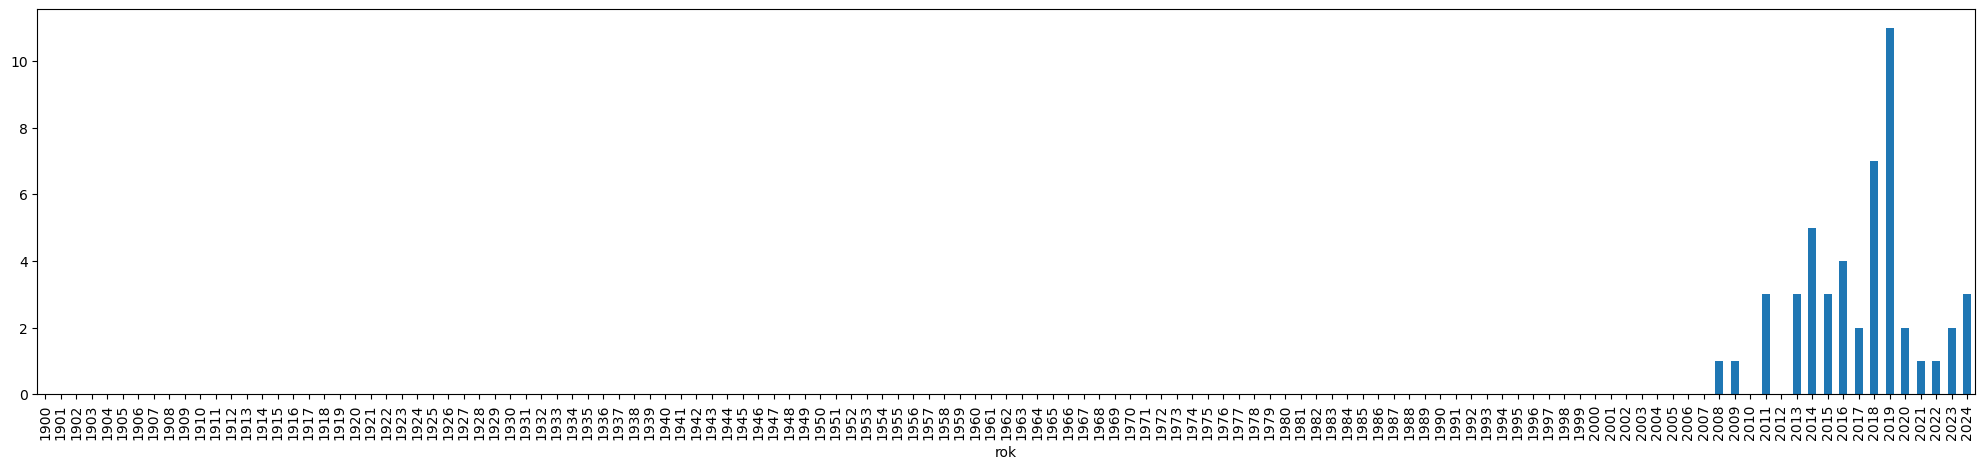

In [252]:
r(df2[df2.apply(lambda row: any("ADHD" in str(value) for value in row), axis=1)])

<Axes: xlabel='rok'>

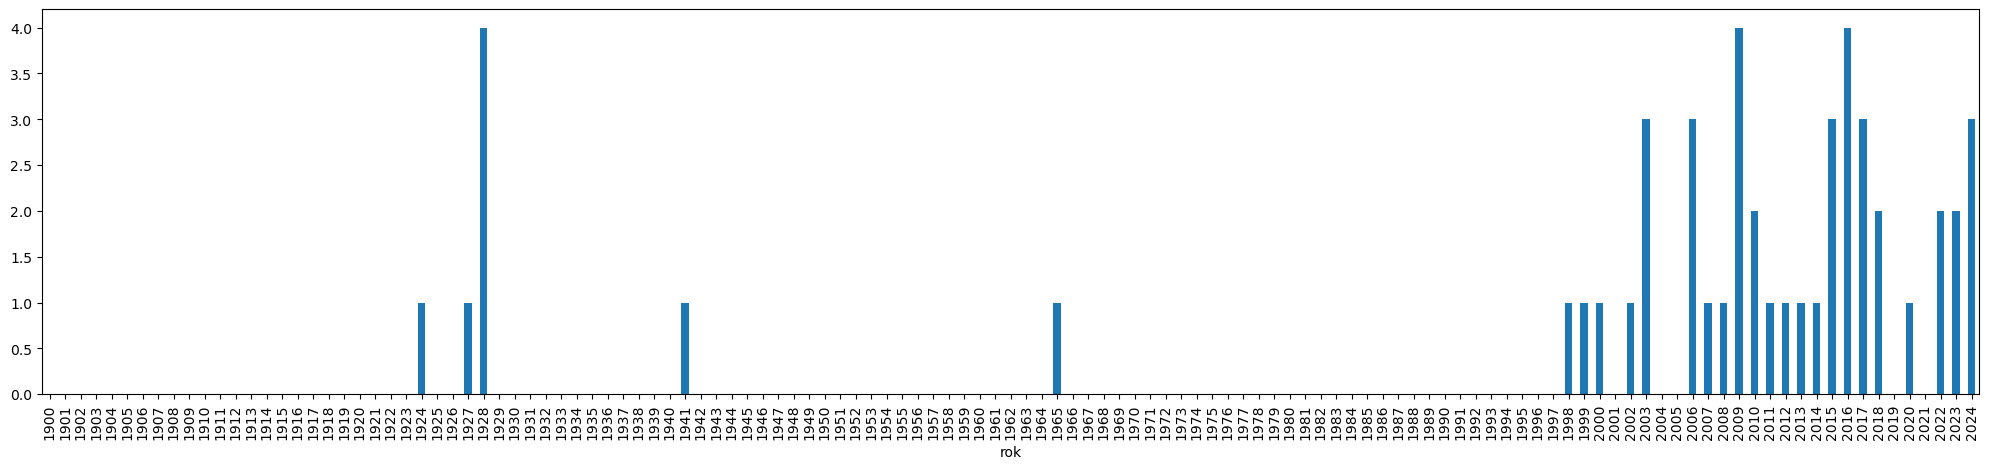

In [253]:
r(df2[df2.apply(lambda row: any("adrenalin" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

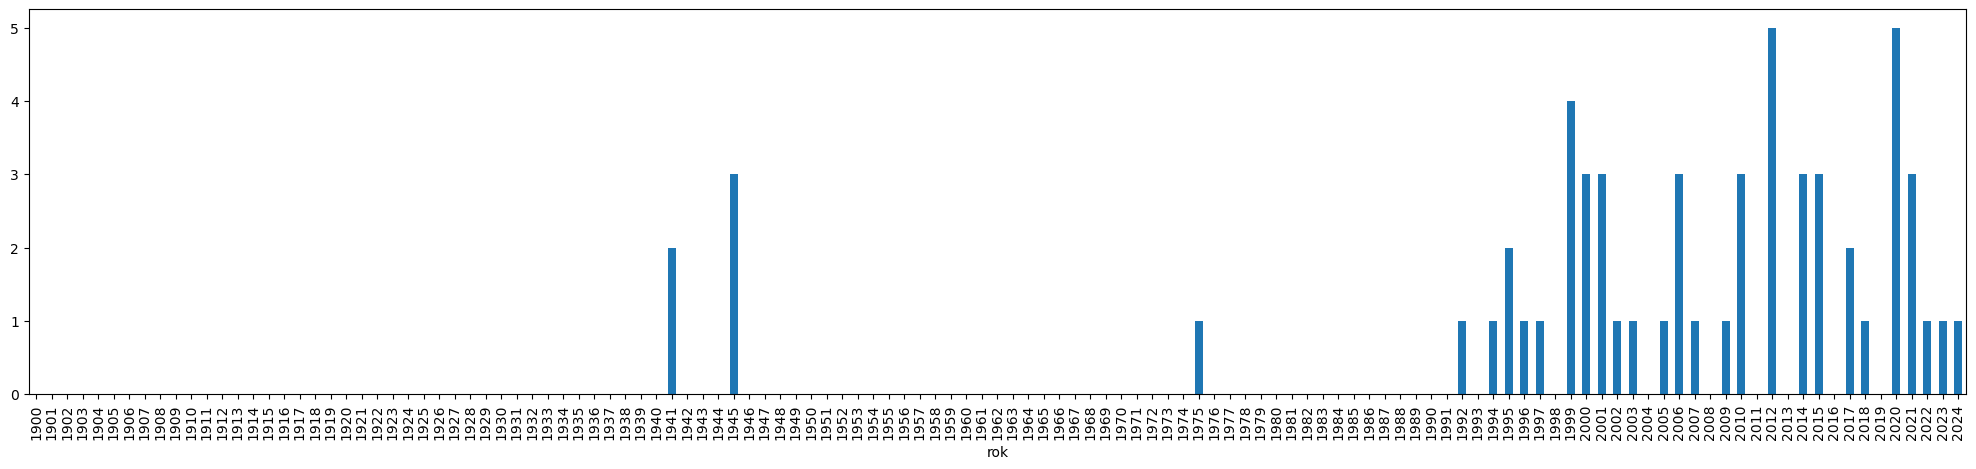

In [254]:
r(df2[df2.apply(lambda row: any("hippi" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

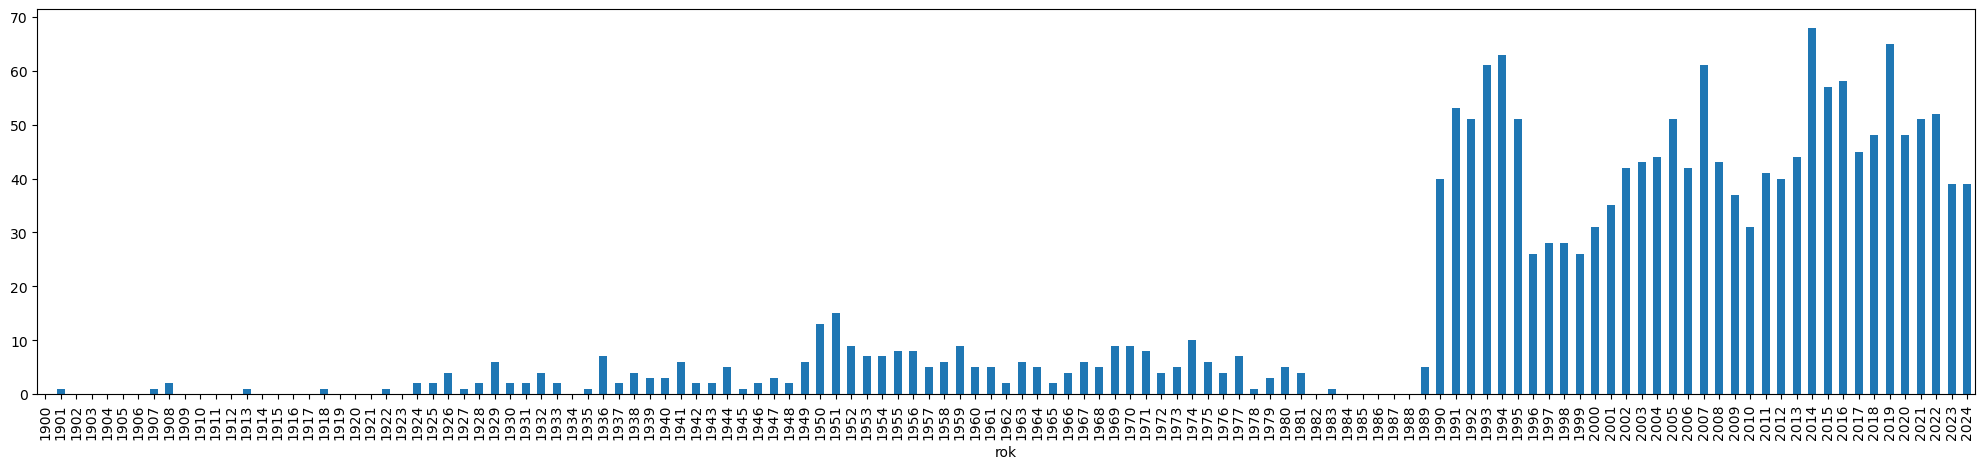

In [255]:
r(df2[df2.apply(lambda row: any("podnika" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

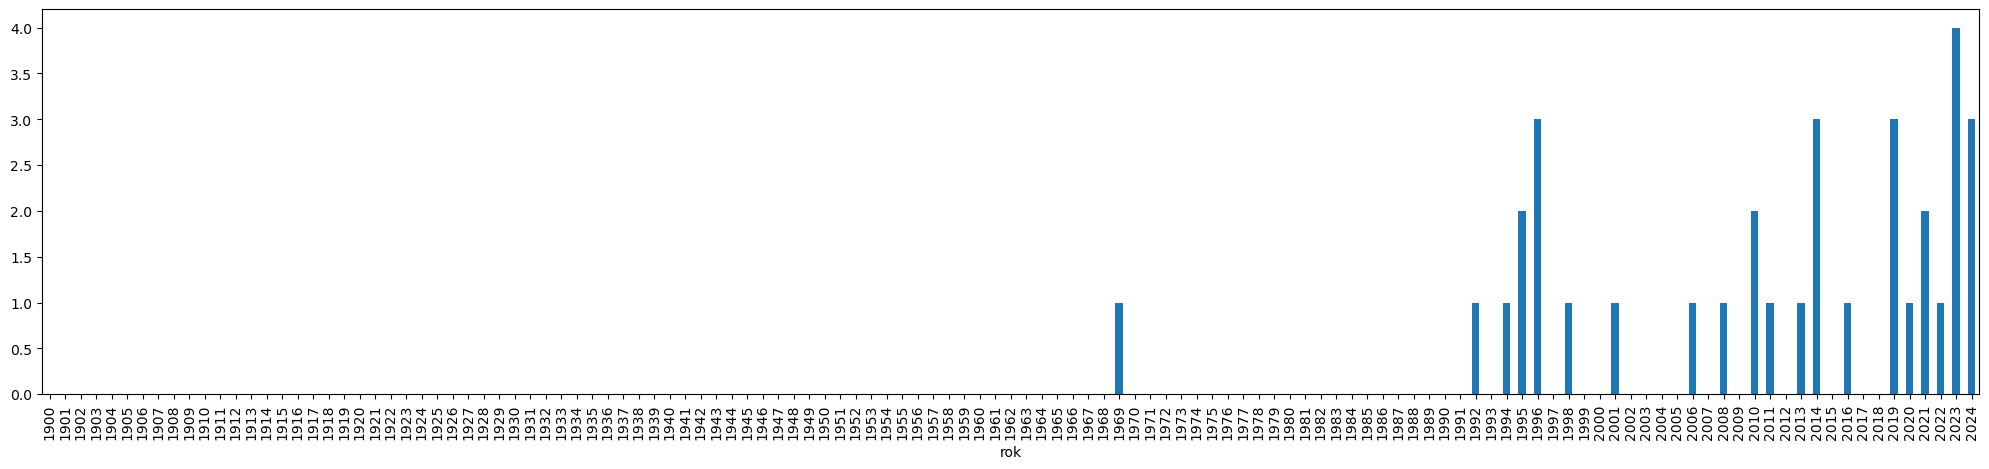

In [256]:
r(df2[df2.apply(lambda row: any("beatn" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

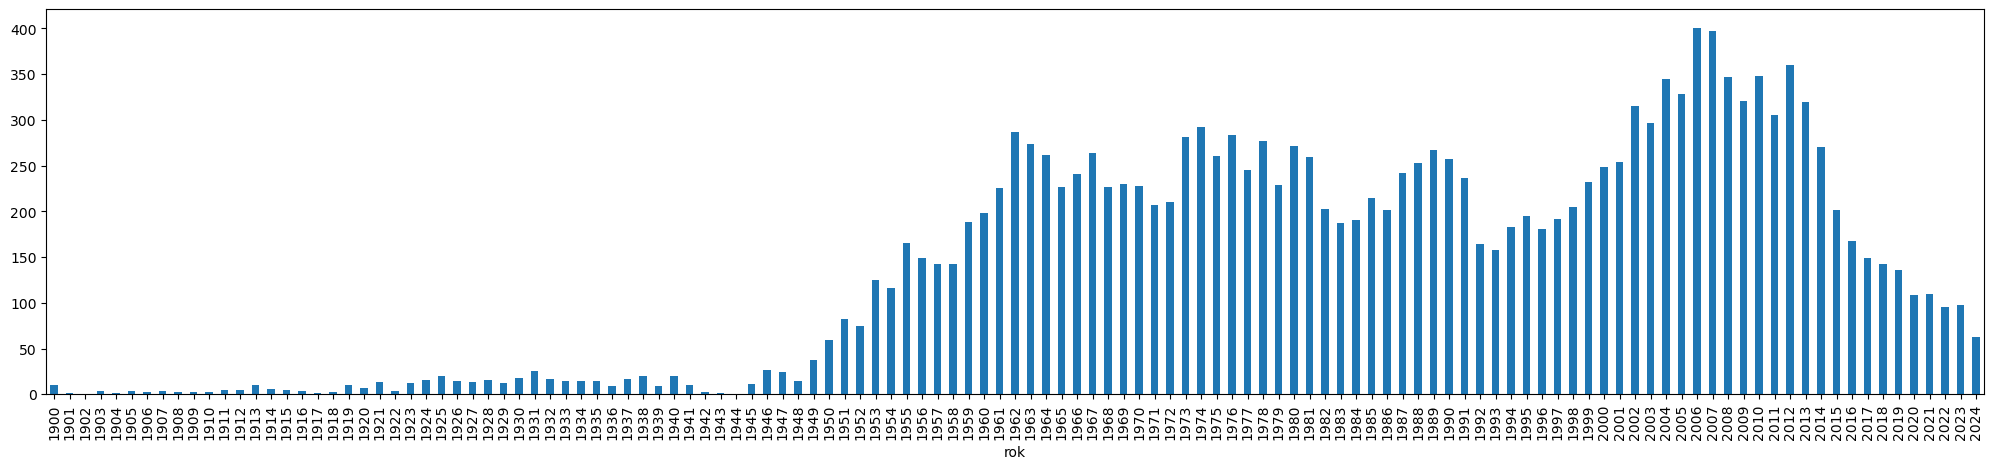

In [257]:
r(df2[df2.apply(lambda row: any("ekonomi" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

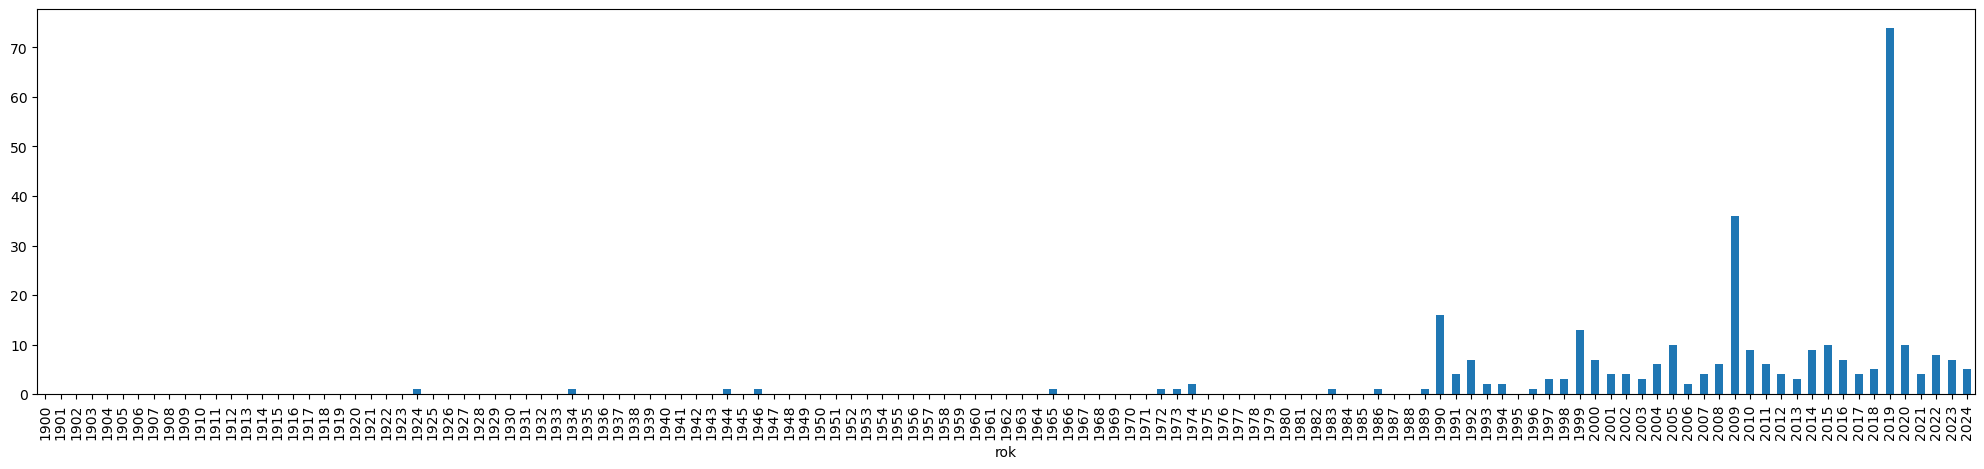

In [258]:
r(df2[df2.apply(lambda row: any("sametov" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

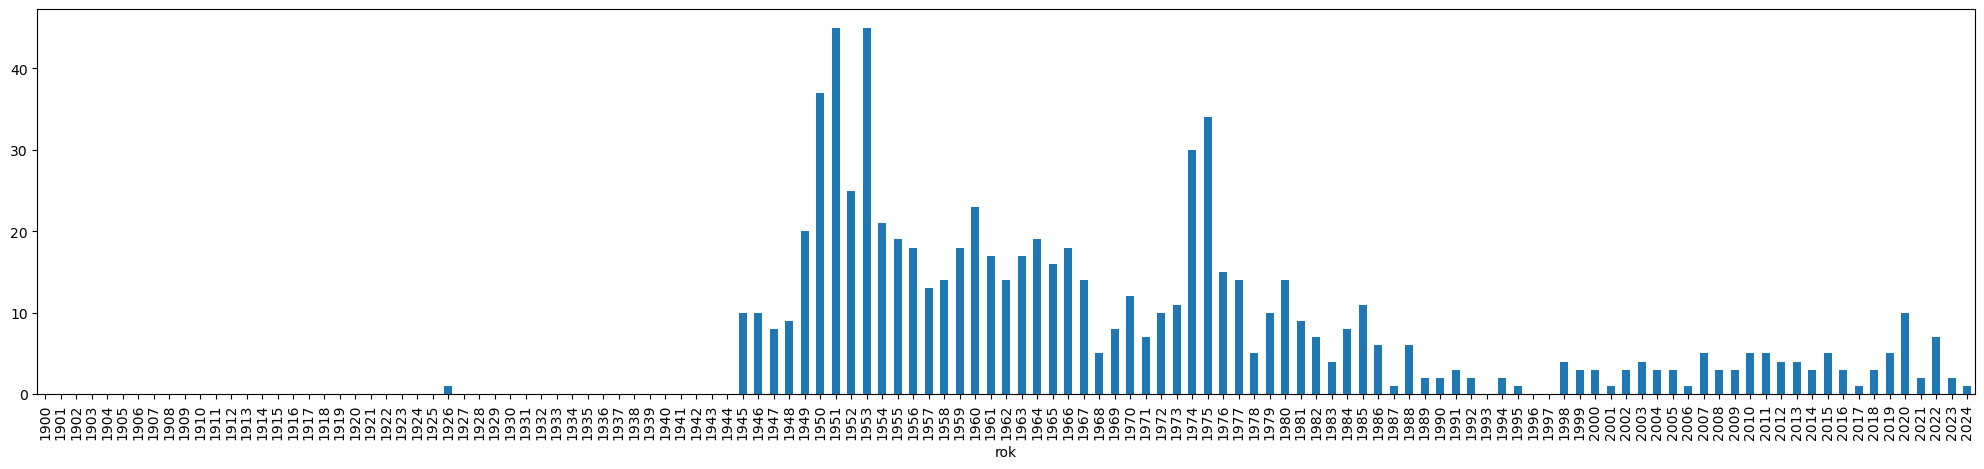

In [259]:
r(df2[df2.apply(lambda row: any("partyz" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

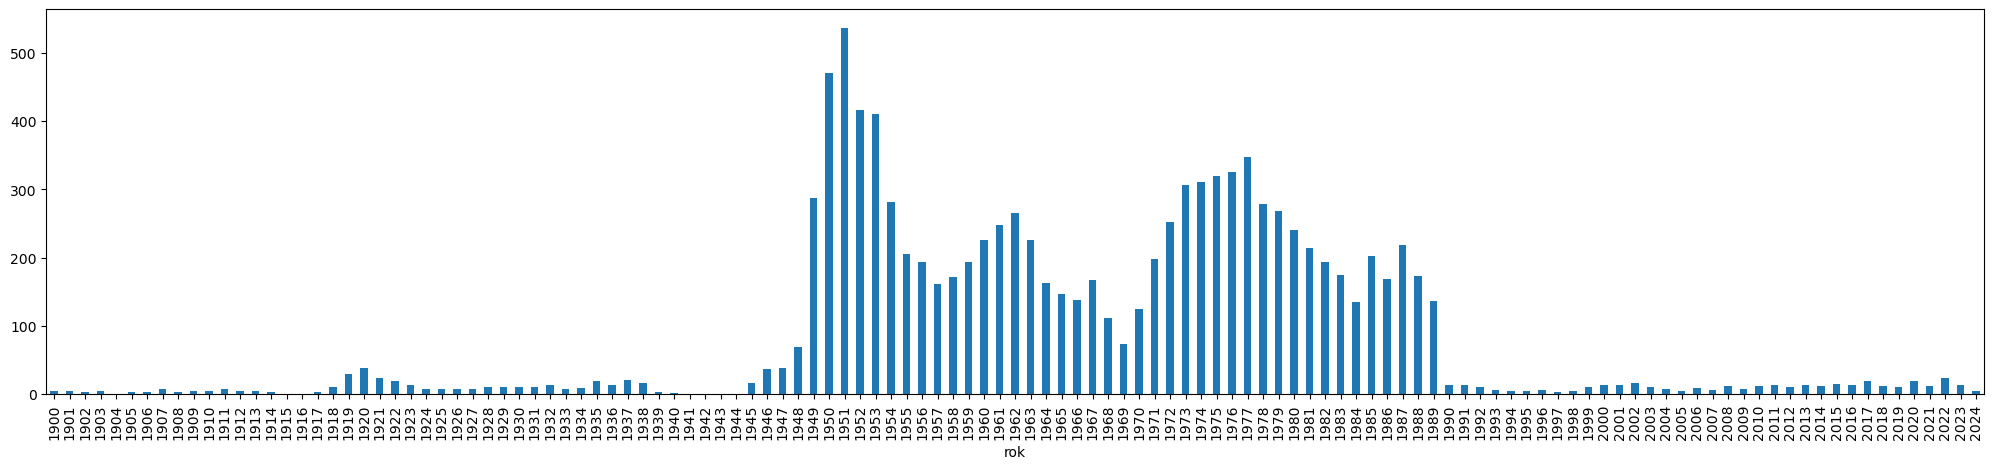

In [260]:
r(df2[df2.apply(lambda row: any("socialis" in str(value).lower() for value in row), axis=1)])

In [261]:
budoucnost = df2[(df2.apply(lambda row: any("budoucnost" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()
minulost = df2[(df2.apply(lambda row: any("minulost" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()

In [263]:
zbohatn = df2[(df2.apply(lambda row: any("zbohatn" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()

In [264]:
komunis = df2[(df2.apply(lambda row: any("komunis" in str(value).lower() for value in row), axis=1)) | (df2.apply(lambda row: any("socialis" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()

In [265]:
kapitalis = df2[(df2.apply(lambda row: any("kapitalis" in str(value).lower() for value in row), axis=1)) | (df2.apply(lambda row: any("tržn" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()

In [266]:
fasis = df2[(df2.apply(lambda row: any("fašis" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()

<Axes: xlabel='rok'>

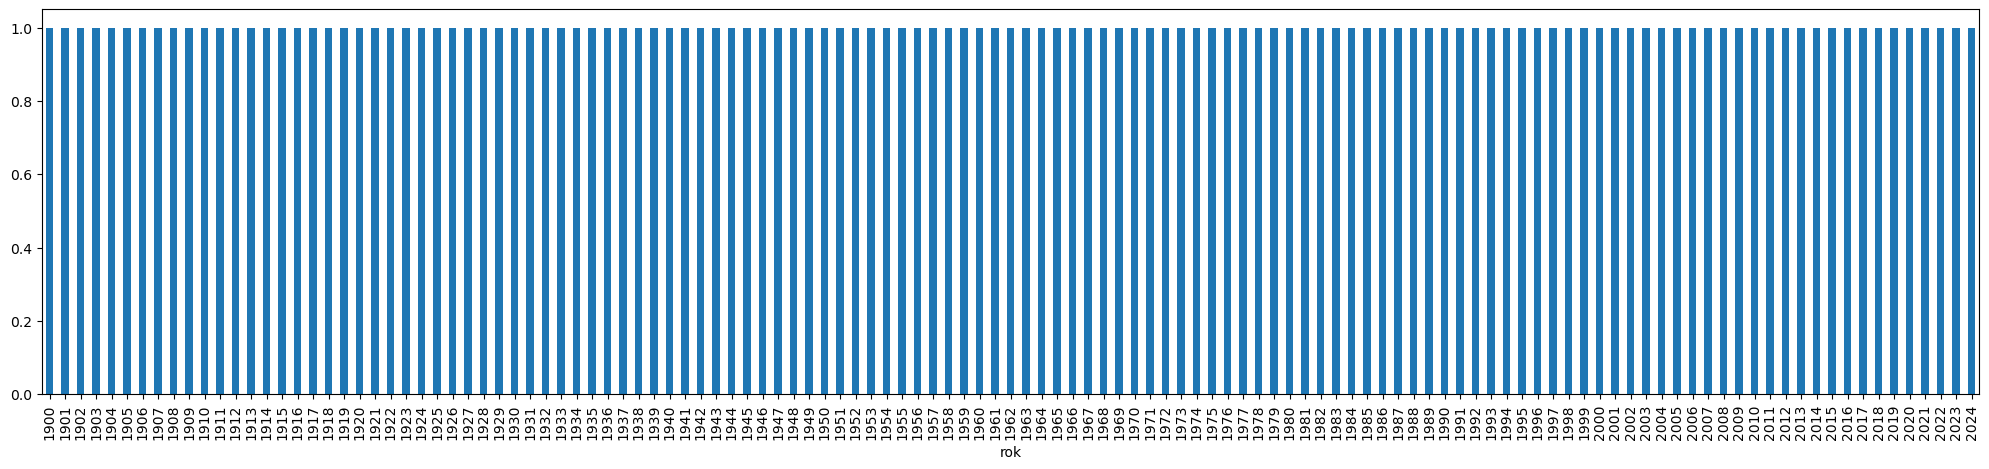

In [267]:
r(komunis)

<Axes: xlabel='rok'>

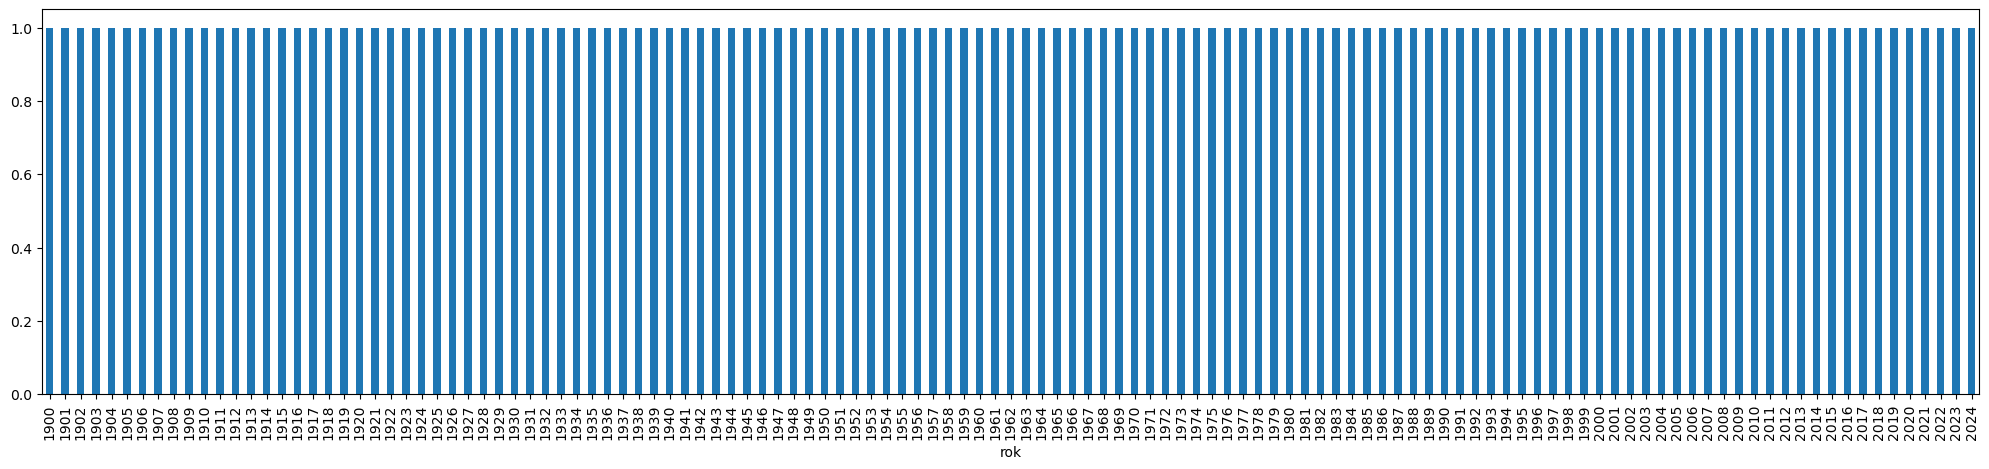

In [268]:
r(kapitalis)

In [269]:
kapitalis

rok
1900.0    0.000738
1901.0         NaN
1902.0         NaN
1903.0    0.000507
1904.0         NaN
1905.0    0.000552
1906.0         NaN
1907.0    0.000963
1908.0    0.000427
1909.0    0.000445
1910.0    0.000393
1911.0    0.000404
1912.0         NaN
1913.0    0.000372
1914.0         NaN
1915.0    0.000717
1916.0    0.000663
1917.0         NaN
1918.0         NaN
1919.0    0.000292
1920.0         NaN
1921.0    0.001580
1922.0         NaN
1923.0    0.000473
1924.0    0.000213
1925.0    0.000190
1926.0    0.000618
1927.0    0.000641
1928.0         NaN
1929.0    0.000822
1930.0    0.000362
1931.0    0.000402
1932.0    0.000432
1933.0    0.000648
1934.0    0.001232
1935.0    0.000549
1936.0    0.000932
1937.0    0.000464
1938.0    0.000178
1939.0    0.000713
1940.0    0.000180
1941.0    0.000190
1942.0         NaN
1943.0         NaN
1944.0         NaN
1945.0         NaN
1946.0    0.000330
1947.0    0.000924
1948.0    0.003159
1949.0    0.021646
1950.0    0.040447
1951.0    0.046323
1952.0  

In [270]:
import seaborn as sns
import matplotlib.pyplot as plt

<Figure size 1000x600 with 0 Axes>

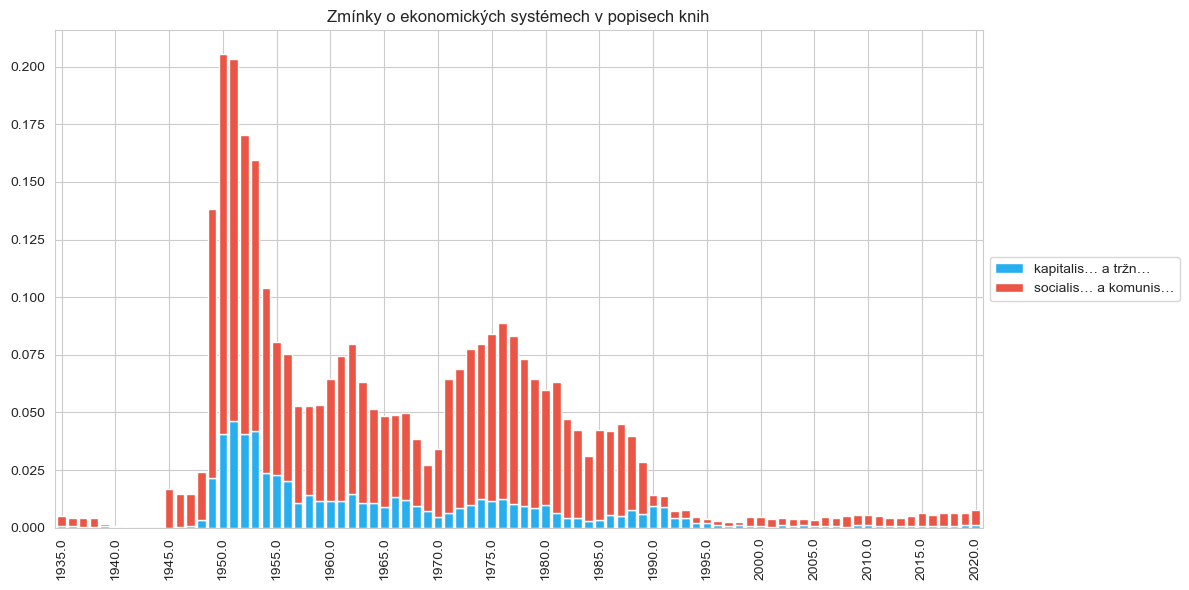

In [271]:
plt.figure(figsize=(10, 6))

# Set Seaborn style
sns.set_style("whitegrid", {'grid.alpha': 0.3})
sns.set_palette("deep")

# Assuming df_plot is already created as before
df_plot = pd.DataFrame({'kapitalis… a tržn…': kapitalis, 'socialis… a komunis…': komunis}).tail(91).head(86)

# Create the stacked bar chart
ax = df_plot.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    width=0.8,
    color = ['#27aeef', '#ea5545','#ef9b20']
)

# Customize the chart
plt.title('Zmínky o ekonomických systémech v popisech knih')
plt.ylabel('')
plt.xlabel('')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Set x-axis ticks
plt.xticks(
    [n for n in range(0, len(df_plot.index), 5)],  # Position of ticks
    [str(year) for year in df_plot.index[::5]],    # Labels for ticks
    rotation=90
)

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()

In [272]:
dinosauri = df2[(df2.apply(lambda row: any("dinosau" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()
mimozems = df2[(df2.apply(lambda row: any("mimozems" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()

<Figure size 1000x600 with 0 Axes>

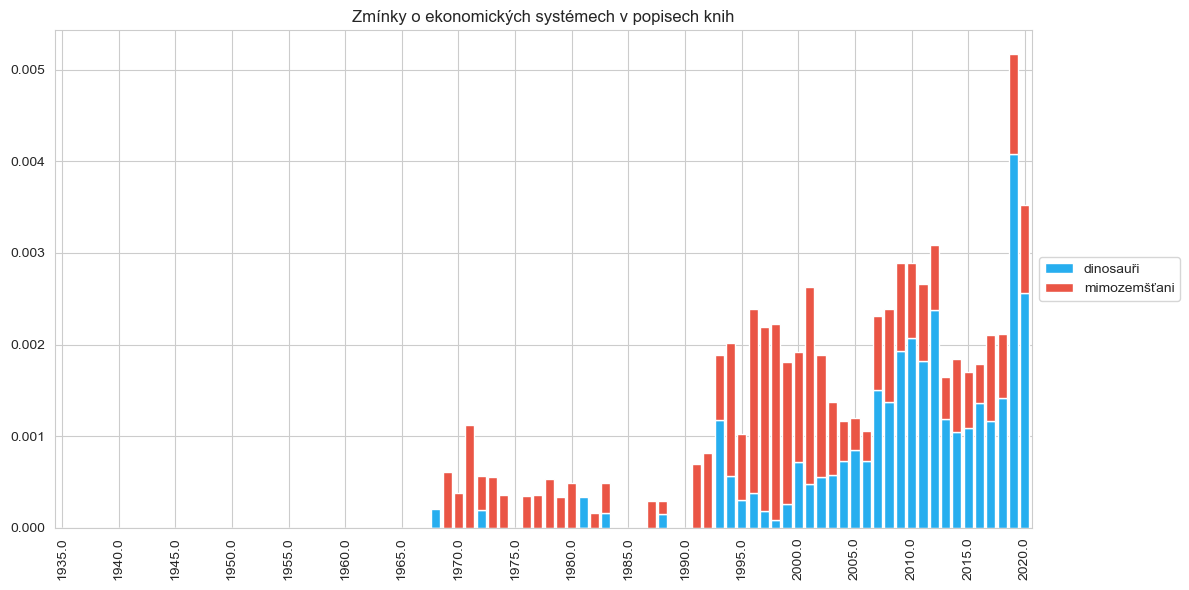

In [273]:
plt.figure(figsize=(10, 6))

# Set Seaborn style
sns.set_style("whitegrid", {'grid.alpha': 0.3})
sns.set_palette("deep")

# Assuming df_plot is already created as before
df_plot = pd.DataFrame({'dinosauři': dinosauri, 'mimozemšťani': mimozems}).tail(91).head(86)

# Create the stacked bar chart
ax = df_plot.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    width=0.8,
    color = ['#27aeef', '#ea5545','#ef9b20']
)

# Customize the chart
plt.title('Zmínky o ekonomických systémech v popisech knih')
plt.ylabel('')
plt.xlabel('')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Set x-axis ticks
plt.xticks(
    [n for n in range(0, len(df_plot.index), 5)],  # Position of ticks
    [str(year) for year in df_plot.index[::5]],    # Labels for ticks
    rotation=90
)

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()

In [274]:
televiz = df2[(df2.apply(lambda row: any("televiz" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()
internet = df2[(df2.apply(lambda row: any("internet" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()

<Figure size 1000x600 with 0 Axes>

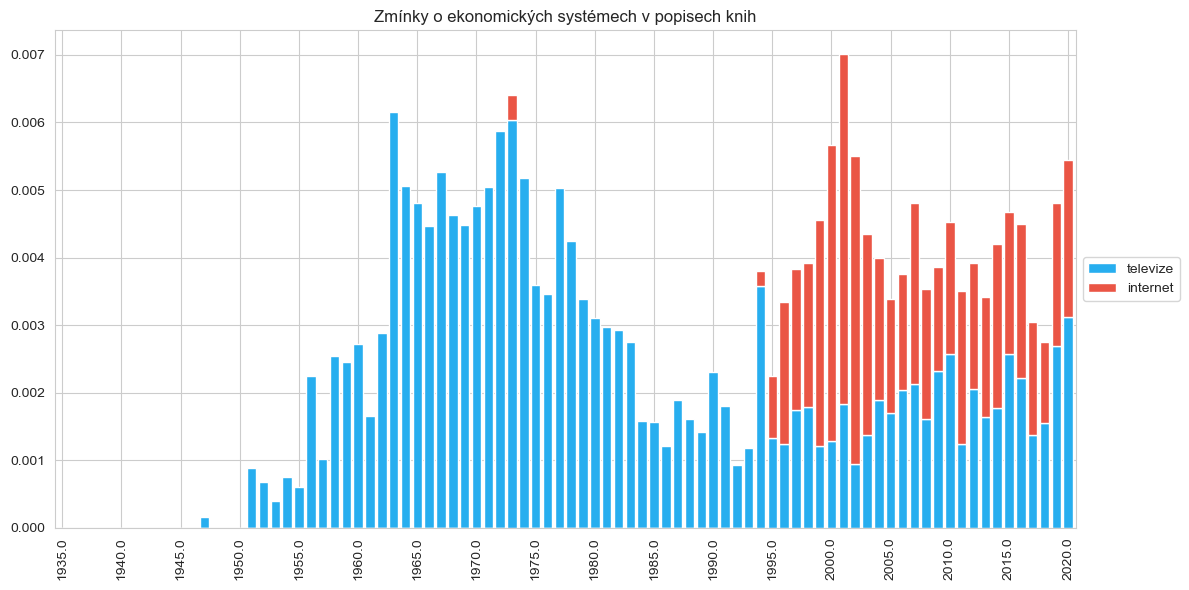

In [275]:
plt.figure(figsize=(10, 6))

# Set Seaborn style
sns.set_style("whitegrid", {'grid.alpha': 0.3})
sns.set_palette("deep")

# Assuming df_plot is already created as before
df_plot = pd.DataFrame({'televize': televiz, 'internet': internet}).tail(91).head(86)

# Create the stacked bar chart
ax = df_plot.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    width=0.8,
    color = ['#27aeef', '#ea5545','#ef9b20']
)

# Customize the chart
plt.title('Zmínky o ekonomických systémech v popisech knih')
plt.ylabel('')
plt.xlabel('')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Set x-axis ticks
plt.xticks(
    [n for n in range(0, len(df_plot.index), 5)],  # Position of ticks
    [str(year) for year in df_plot.index[::5]],    # Labels for ticks
    rotation=90
)

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()

In [276]:
skaut = df2[(df2.apply(lambda row: any("skaut" in str(value).lower() for value in row), axis=1)) | (df2.apply(lambda row: any("junák" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()
pionyr = df2[(df2.apply(lambda row: any("pioný" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()

<Figure size 640x480 with 0 Axes>

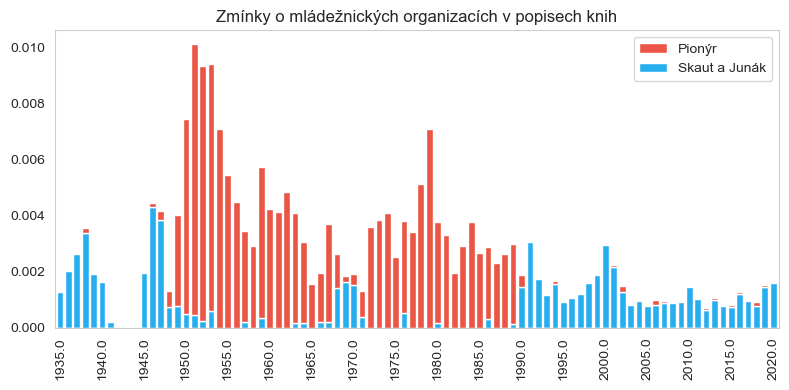

In [277]:
plt.figure()

# Set Seaborn style
# sns.set_style("whitegrid", {'grid.alpha': 0.3})
sns.set_palette("deep")

# Assuming df_plot is already created as before
df_plot = pd.DataFrame({'Skaut a Junák': skaut, 'Pionýr': pionyr}).tail(91).head(86)

# Create the stacked bar chart
ax = df_plot.plot(
    kind='bar',
    stacked=True,
    figsize=(8, 4),
    width=0.8,
    color = ['#27aeef', '#ea5545','#ef9b20']
)
ax.grid(False)

# Customize the chart
plt.title('Zmínky o mládežnických organizacích v popisech knih')
plt.ylabel('')
plt.xlabel('')
plt.legend(loc="upper right", reverse=True)

# Set x-axis ticks
plt.xticks(
    [n for n in range(0, len(df_plot.index), 5)],  # Position of ticks
    [str(year) for year in df_plot.index[::5]],    # Labels for ticks
    rotation=90
)

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()

In [278]:
vegetar = df2[(df2.apply(lambda row: any("vegetar" in str(value).lower() for value in row), axis=1)) | (df2.apply(lambda row: any("bezmas" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()
grilo = df2[(df2.apply(lambda row: any("grilova" in str(value).lower() for value in row), axis=1)) | (df2.apply(lambda row: any("grilu" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()

In [279]:
vepřo = df2[(df2.apply(lambda row: any("vepřo" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()

In [280]:
krasobrus = df2[(df2.apply(lambda row: any("krasobrus" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()

In [281]:
florbal = df2[(df2.apply(lambda row: any("florbal" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()

In [282]:
produktiv = df2[(df2.apply(lambda row: any("produktiv" in str(value).lower() for value in row), axis=1)) | (df2.apply(lambda row: any("efektiv" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()

In [283]:
relax = df2[(df2.apply(lambda row: any("relax" in str(value).lower() for value in row), axis=1)) | (df2.apply(lambda row: any("odpočin" in str(value).lower() for value in row), axis=1)) | (df2.apply(lambda row: any("odpočív" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()

<Figure size 640x480 with 0 Axes>

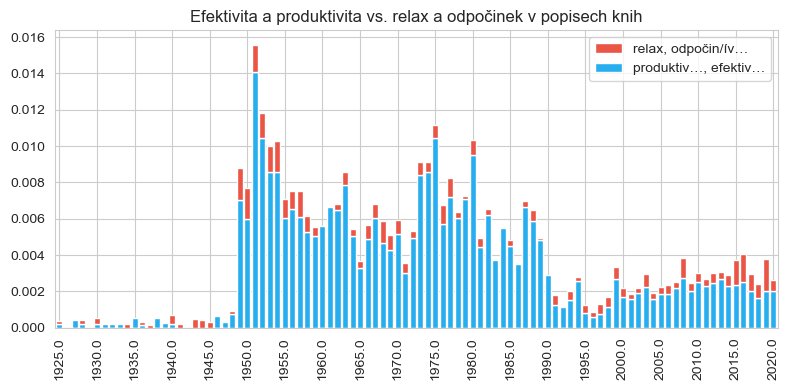

In [284]:
plt.figure()

# Set Seaborn style
# sns.set_style("whitegrid", {'grid.alpha': 0.3})
sns.set_palette("deep")

# Assuming df_plot is already created as before
df_plot = pd.DataFrame({'produktiv…, efektiv…': produktiv, 'relax, odpočin/ív…': relax}).tail(101).head(96)

# Create the stacked bar chart
ax = df_plot.plot(
    kind='bar',
    stacked=True,
    figsize=(8, 4),
    width=0.8,
    color = ['#27aeef', '#ea5545','#ef9b20']
)
# ax.grid(False)

# Customize the chart
plt.title('Efektivita a produktivita vs. relax a odpočinek v popisech knih')
plt.ylabel('')
plt.xlabel('')
plt.legend(loc="upper right", reverse=True)

# Set x-axis ticks
plt.xticks(
    [n for n in range(0, len(df_plot.index), 5)],  # Position of ticks
    [str(year) for year in df_plot.index[::5]],    # Labels for ticks
    rotation=90
)

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()

In [285]:
stres = df2[(df2.apply(lambda row: any("stres" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()

<Axes: xlabel='rok'>

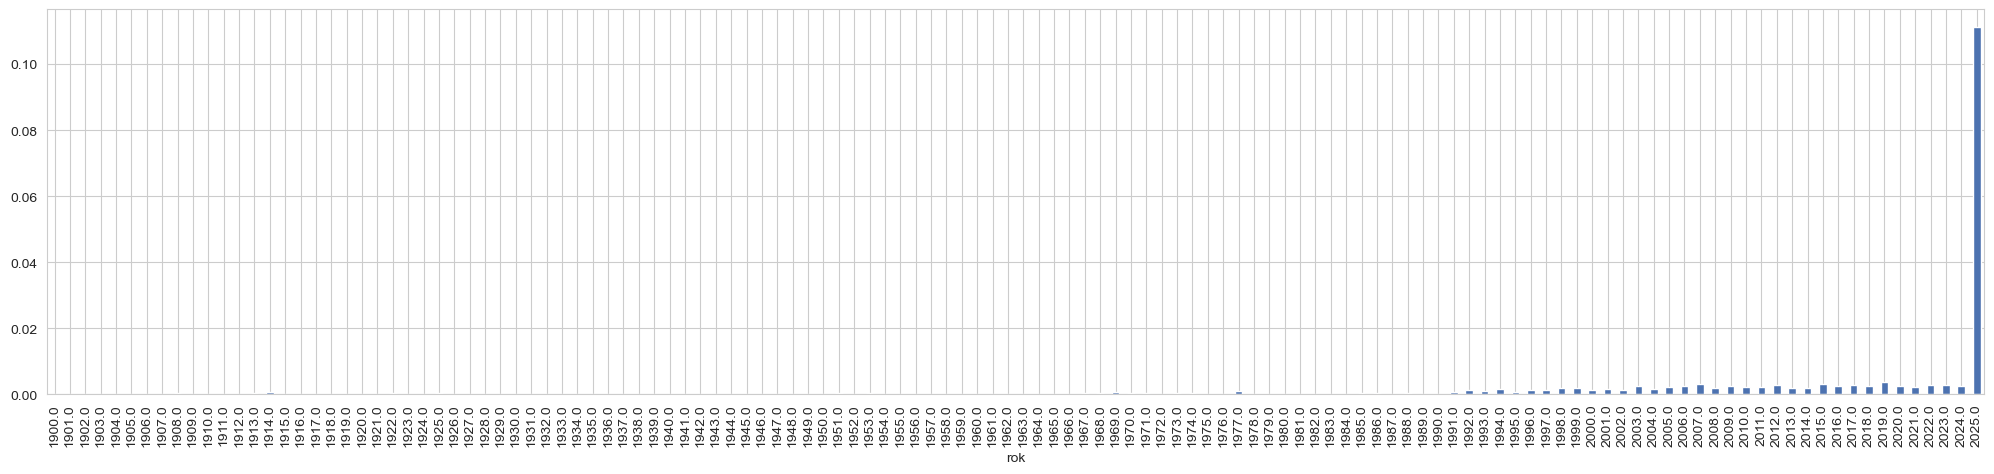

In [286]:
stres.plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

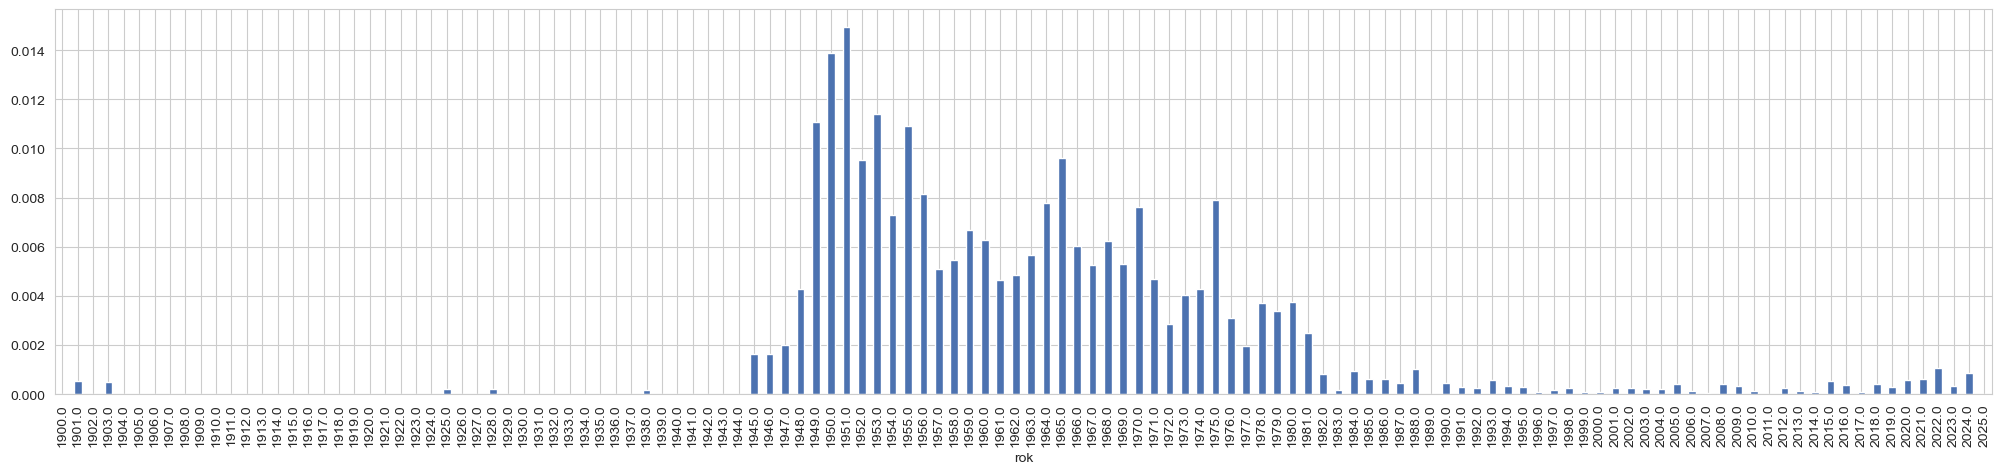

In [287]:
okup = df2[(df2.apply(lambda row: any(" okup" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()
okup.plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

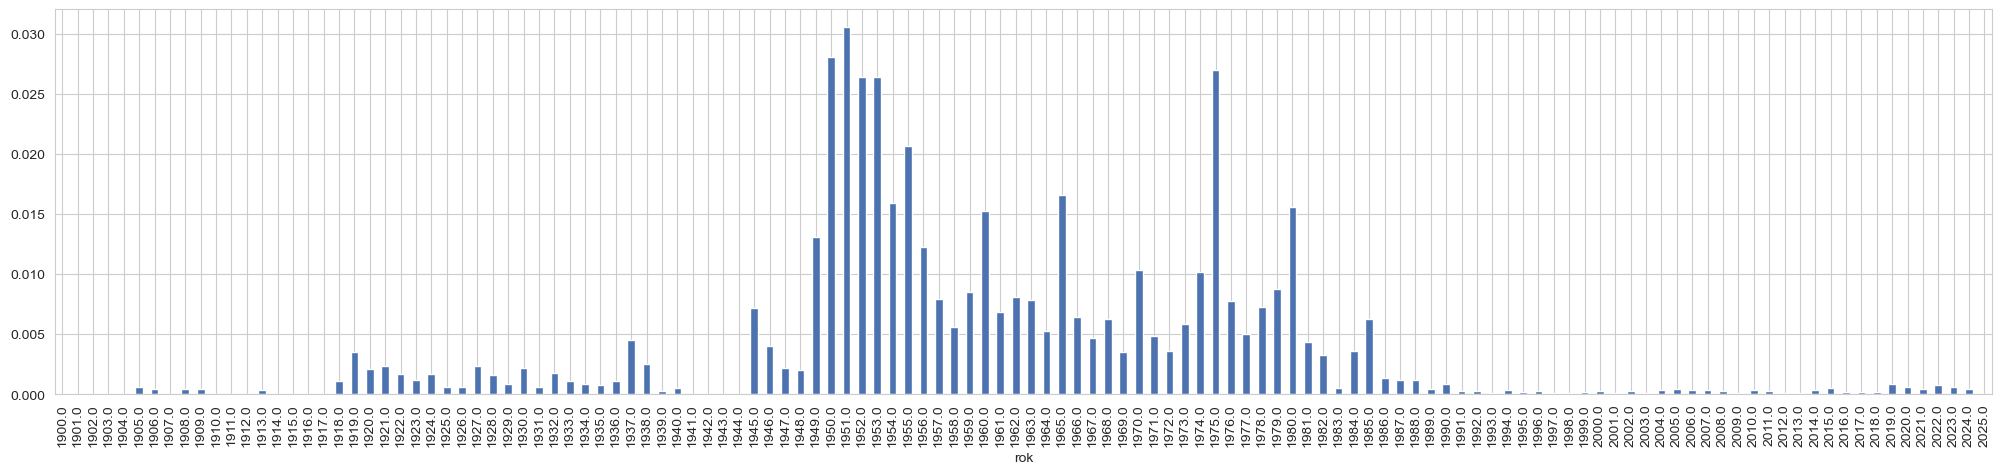

In [288]:
osvo = df2[(df2.apply(lambda row: any(" osvo" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()
osvo.plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

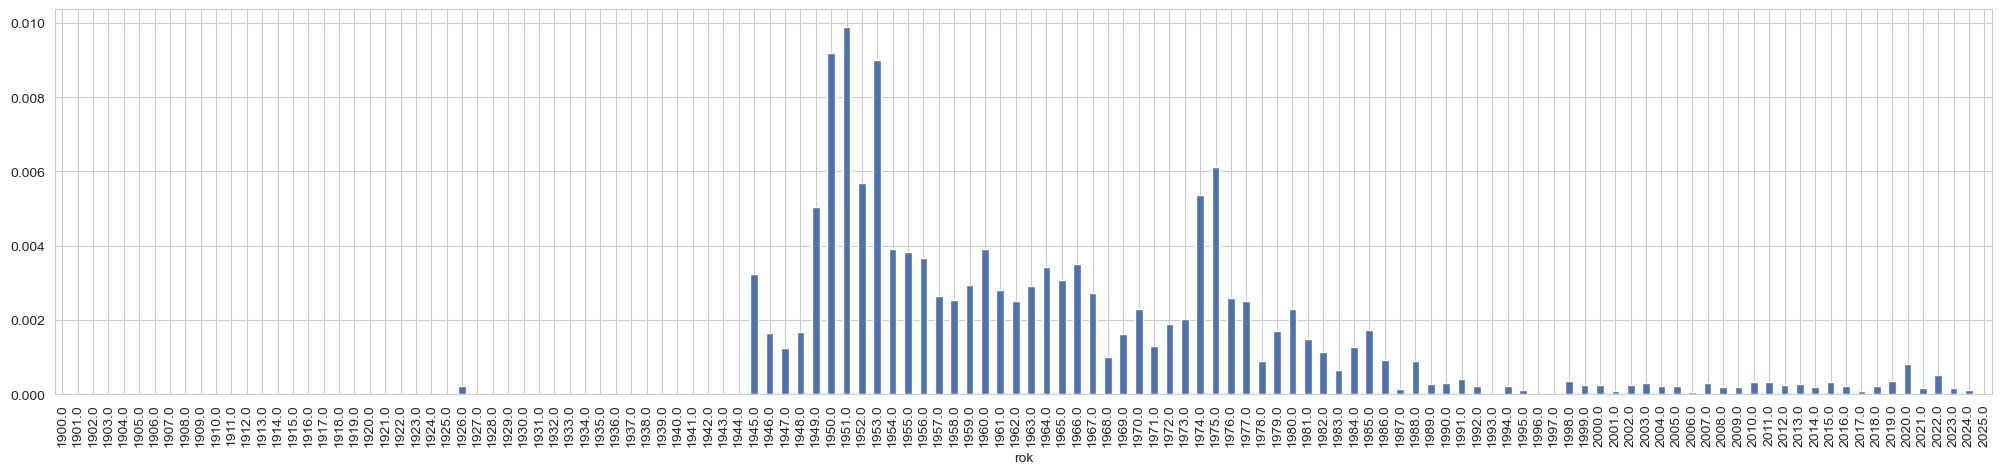

In [289]:
partyz = df2[(df2.apply(lambda row: any("partyz" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()
partyz.plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

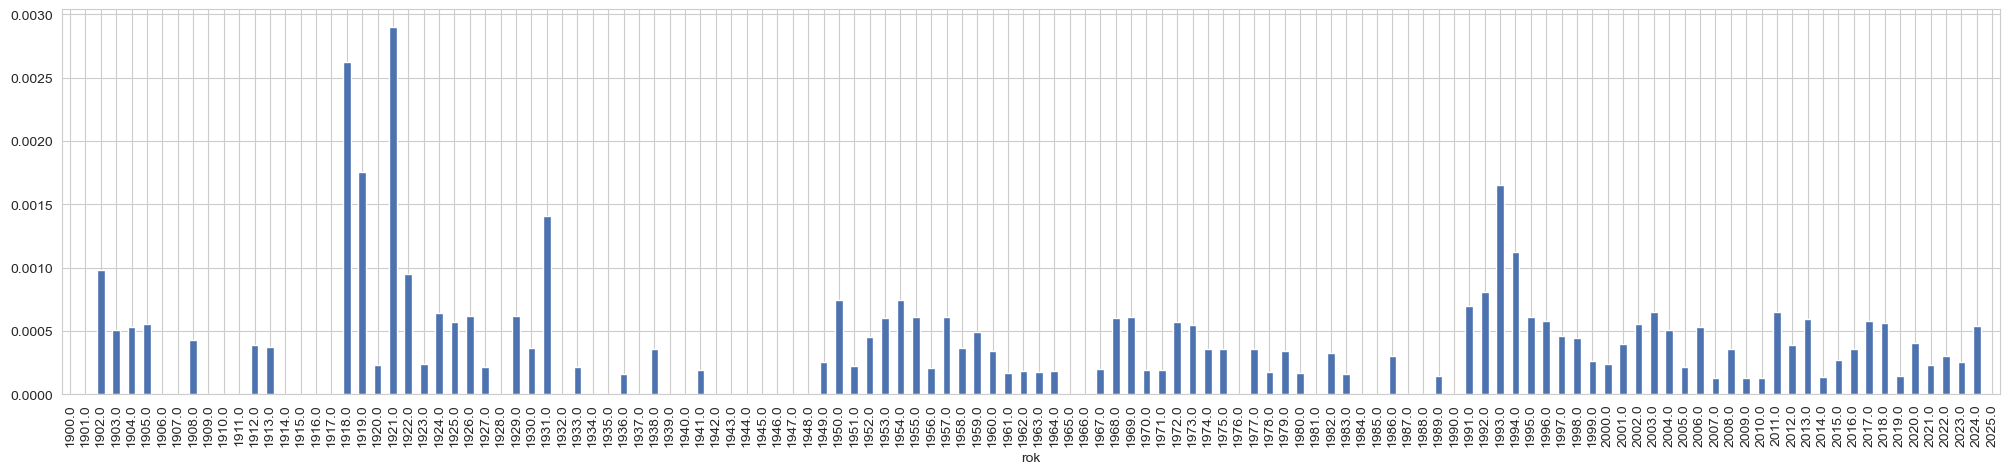

In [290]:
habsbur = df2[(df2.apply(lambda row: any("habsbur" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()
habsbur.plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

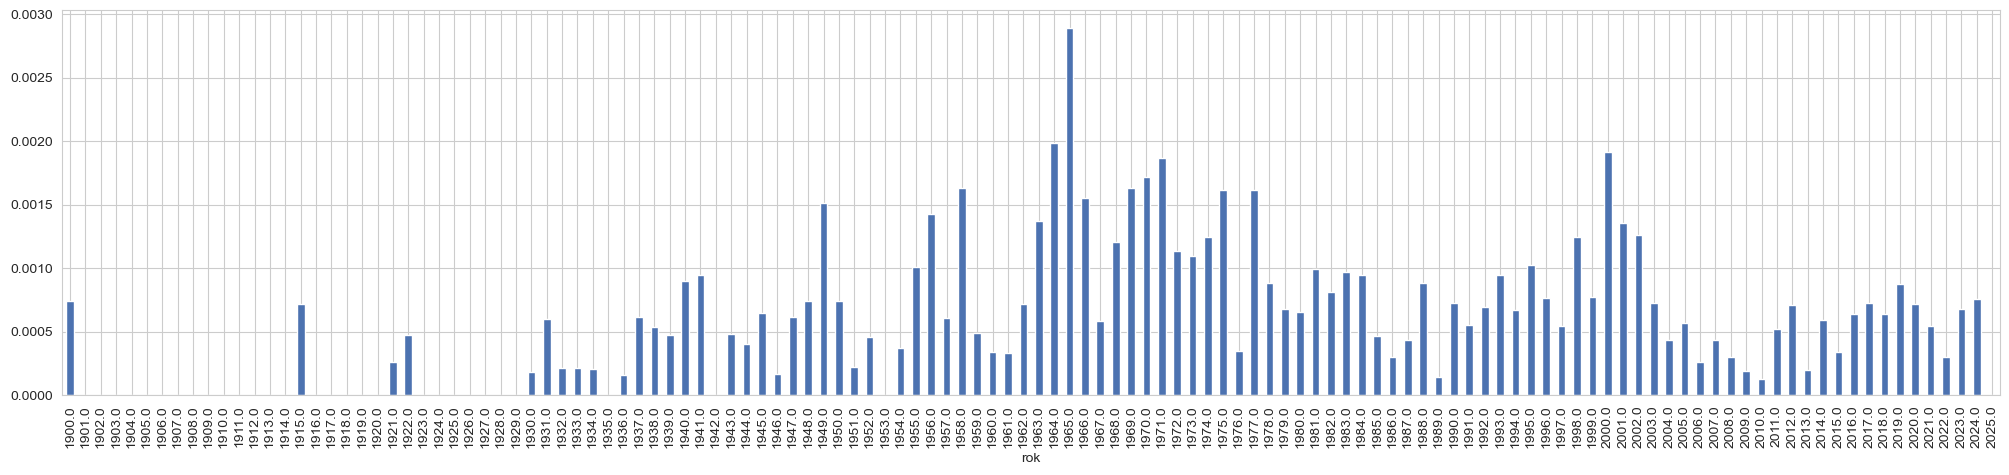

In [291]:
kutil = df2[(df2.apply(lambda row: any("kutil" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()
kutil.plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

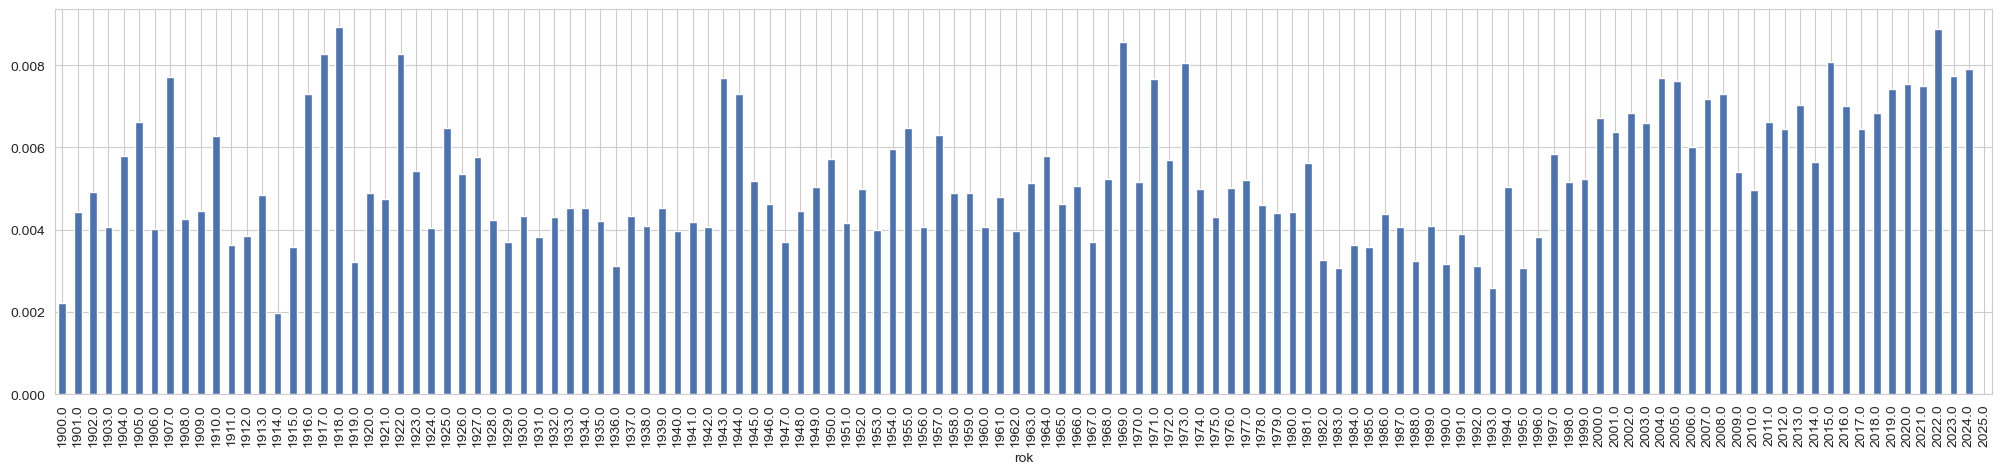

In [292]:
bazen = df2[(df2.apply(lambda row: any("bazén" in str(value).lower() for value in row), axis=1)) | (df2.apply(lambda row: any("zahrad" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()
bazen.plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

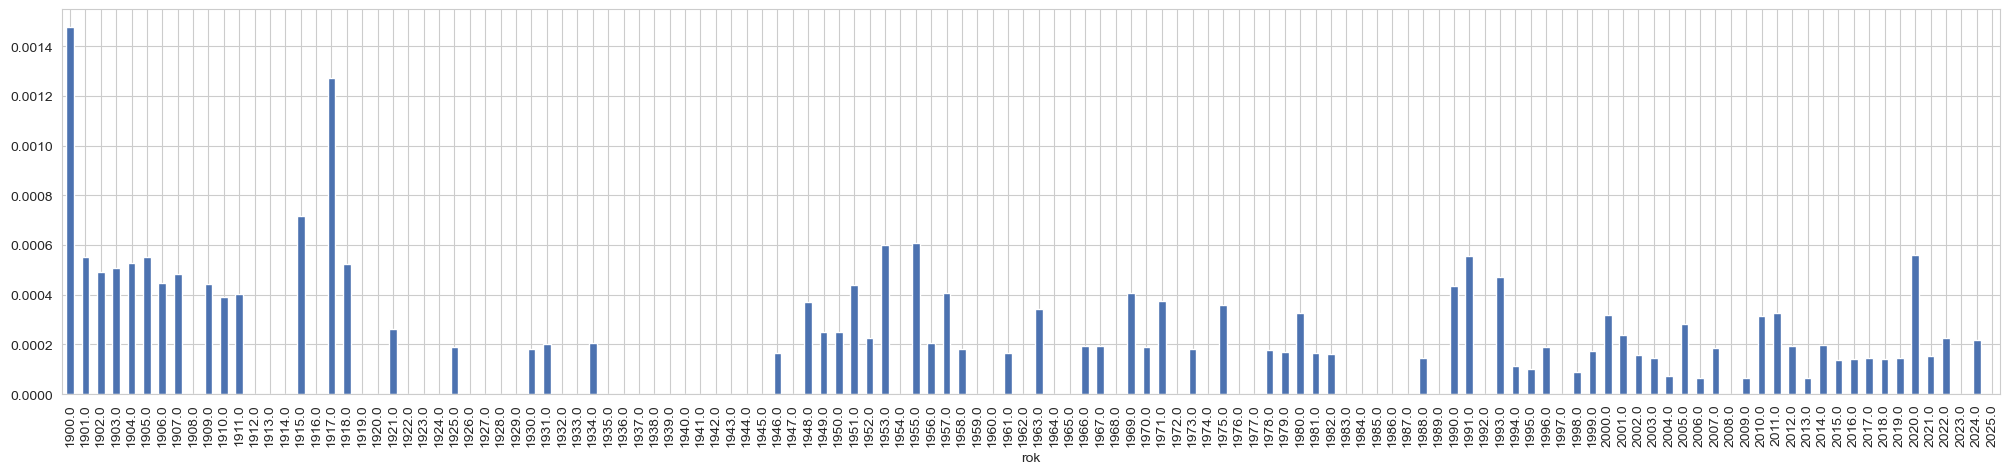

In [293]:
alpy = df2[(df2.apply(lambda row: any("Alpy" in str(value) for value in row), axis=1)) | (df2.apply(lambda row: any("Alpá" in str(value) for value in row), axis=1)) | (df2.apply(lambda row: any(" alpsk" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()
alpy.plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

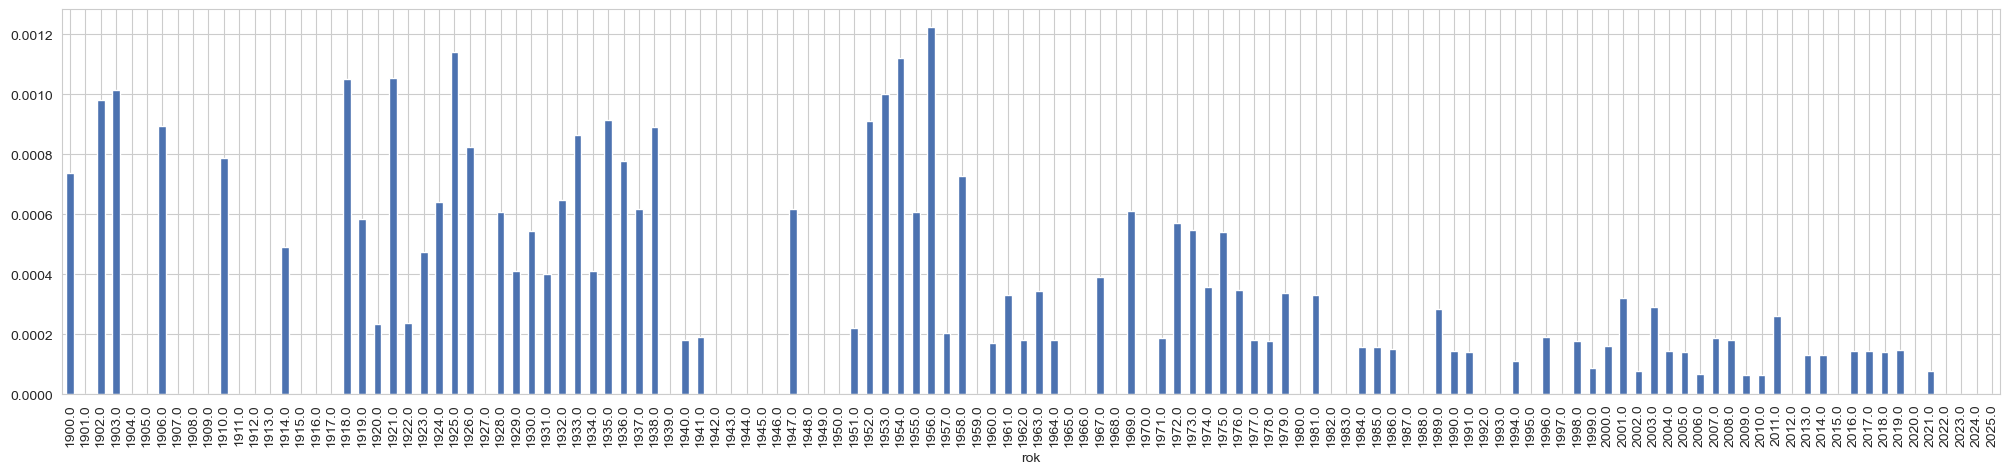

In [294]:
tatry = df2[(df2.apply(lambda row: any("Tatry" in str(value) for value in row), axis=1)) | (df2.apply(lambda row: any("Tatrá" in str(value) for value in row), axis=1)) | (df2.apply(lambda row: any("tatrans" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()
tatry.plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

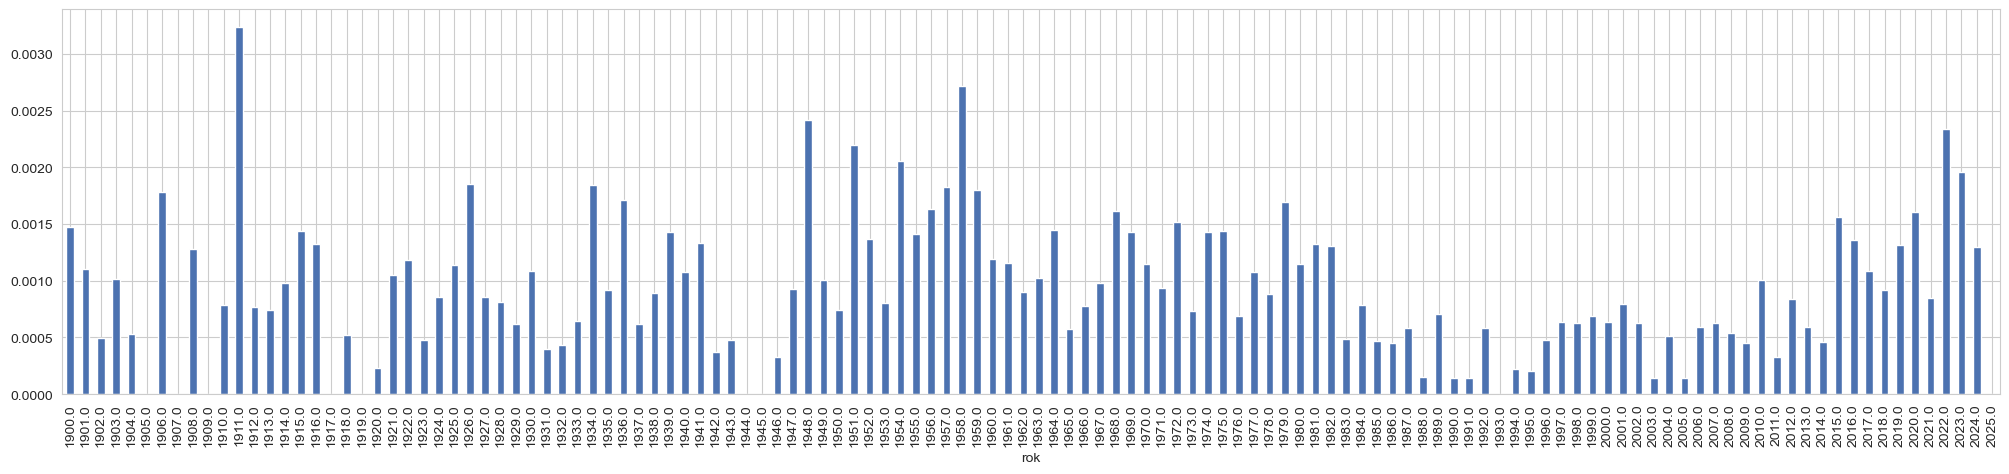

In [295]:
krkono = df2[(df2.apply(lambda row: any("krkono" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()
krkono.plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

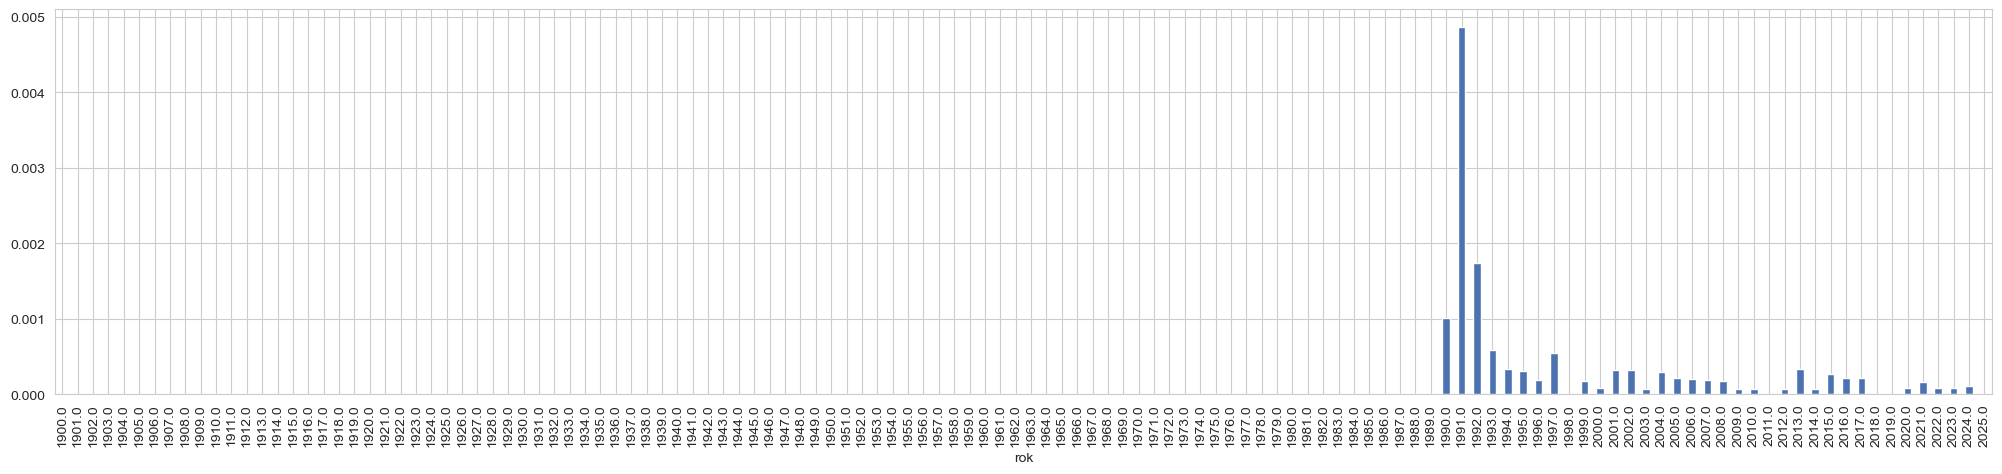

In [296]:
privatiz = df2[(df2.apply(lambda row: any("privatiz" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()
privatiz.plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

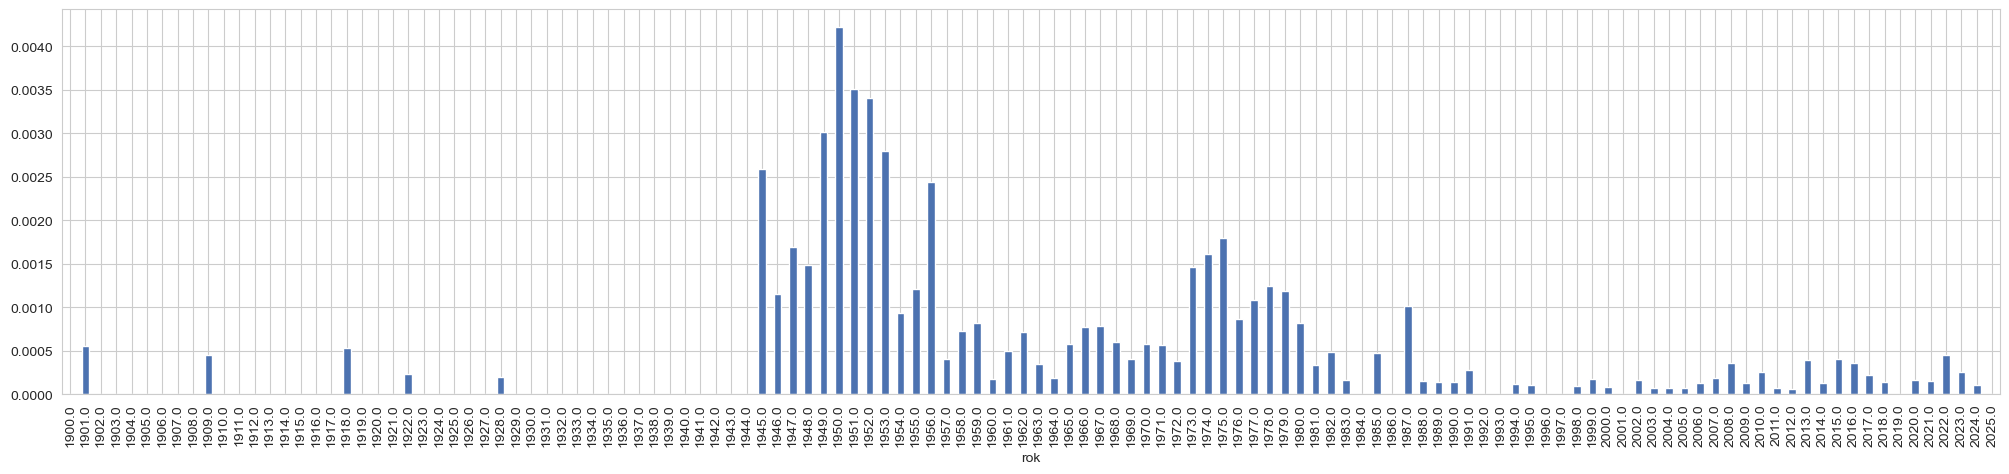

In [297]:
znarod = df2[(df2.apply(lambda row: any("znárod" in str(value).lower() for value in row), axis=1)) | (df2.apply(lambda row: any("kolektiviz" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()
znarod.plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

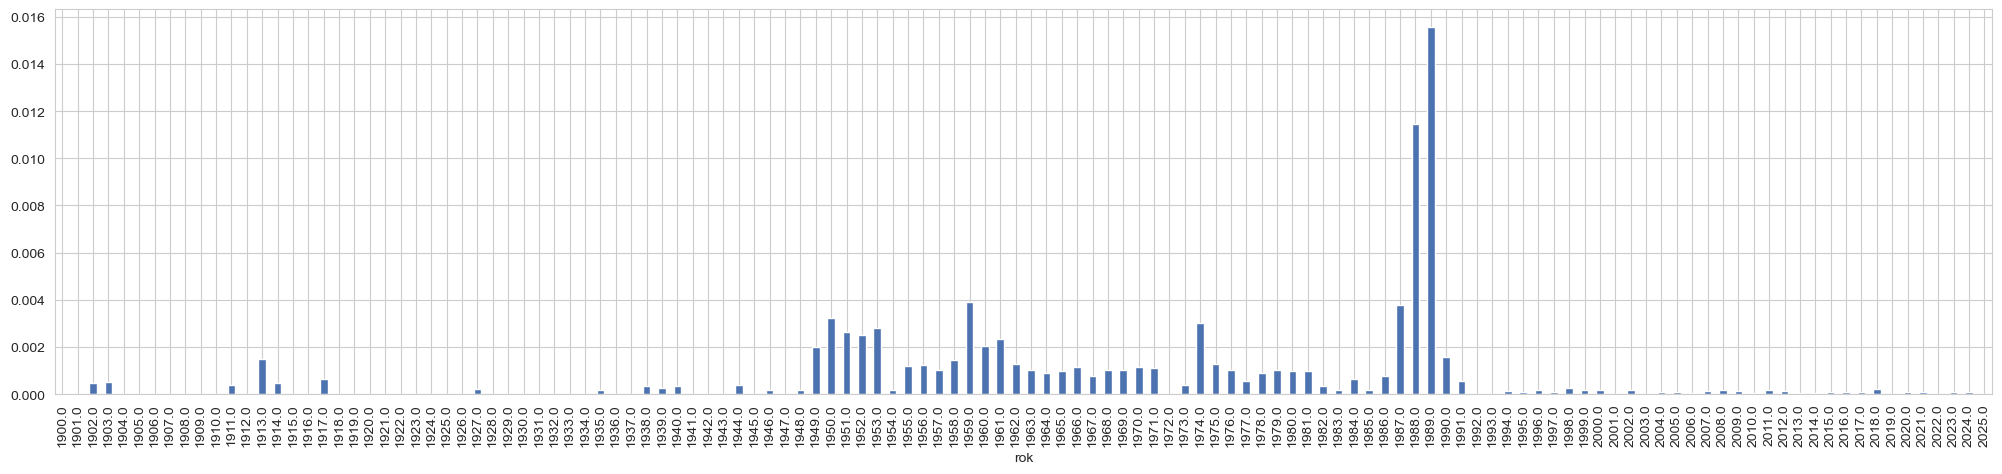

In [298]:
prestavb = df2[(df2.apply(lambda row: any("přestavb" in str(value).lower() for value in row), axis=1)) | (df2.apply(lambda row: any("perestroj" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()
prestavb.plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

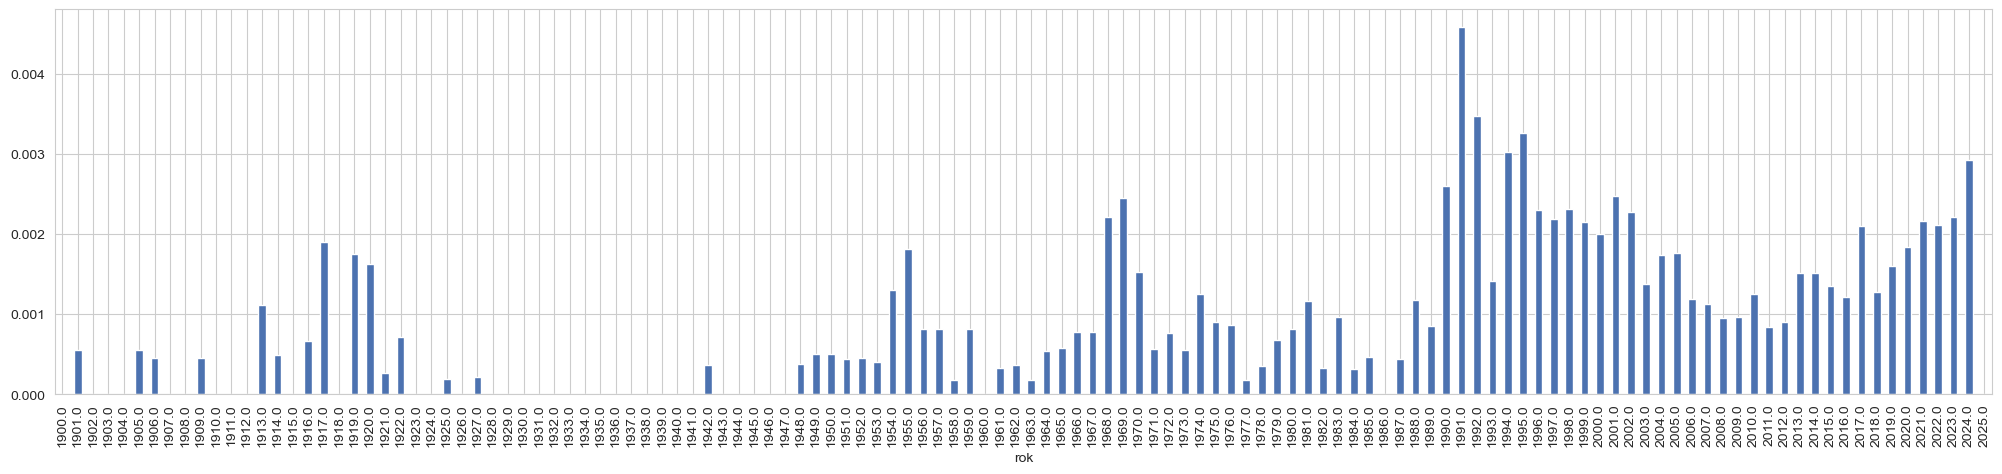

In [299]:
transform = df2[(df2.apply(lambda row: any("transforma" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()
transform.plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

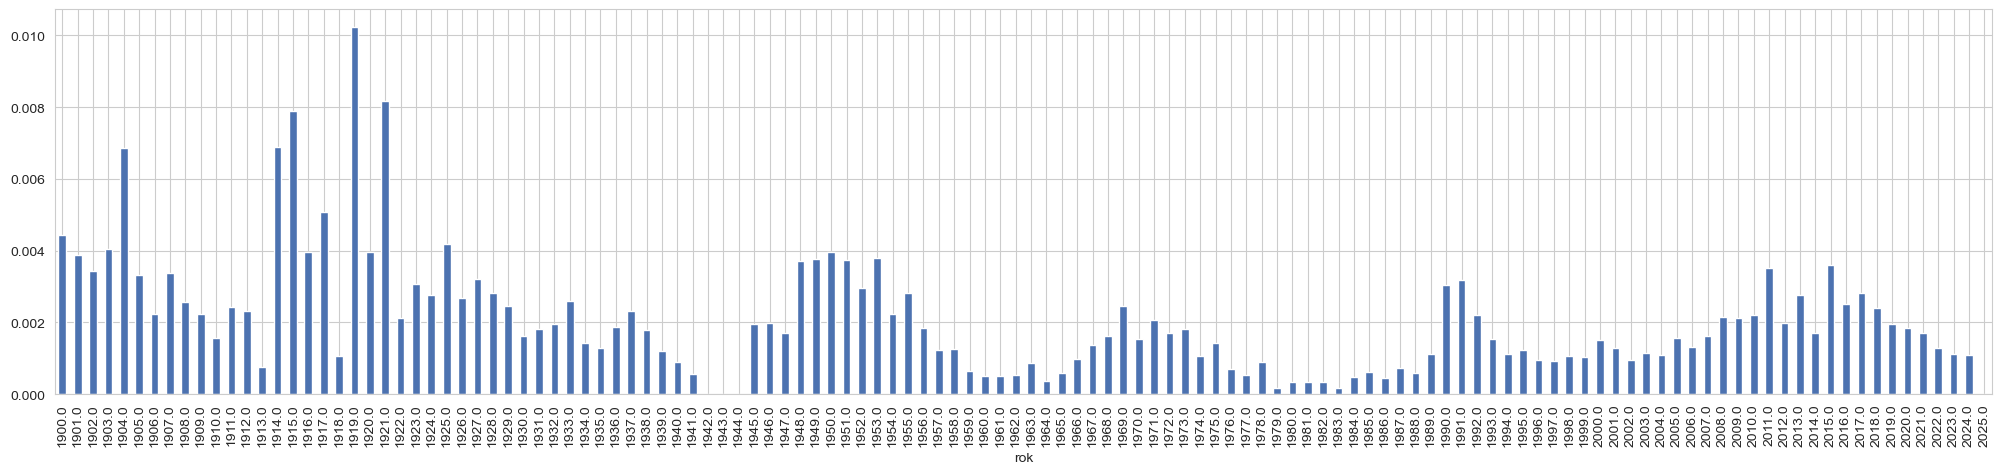

In [300]:
# Create a list of terms to search for
search_terms = ["reforma", "reformy"]

# Modified code to check for multiple terms
reform = df2[(df2.apply(lambda row: any(term in str(value).lower() 
                                      for value in row 
                                      for term in search_terms), axis=1))].groupby('rok').size() / df.groupby('rok').size()

# Create the bar plot
reform.plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

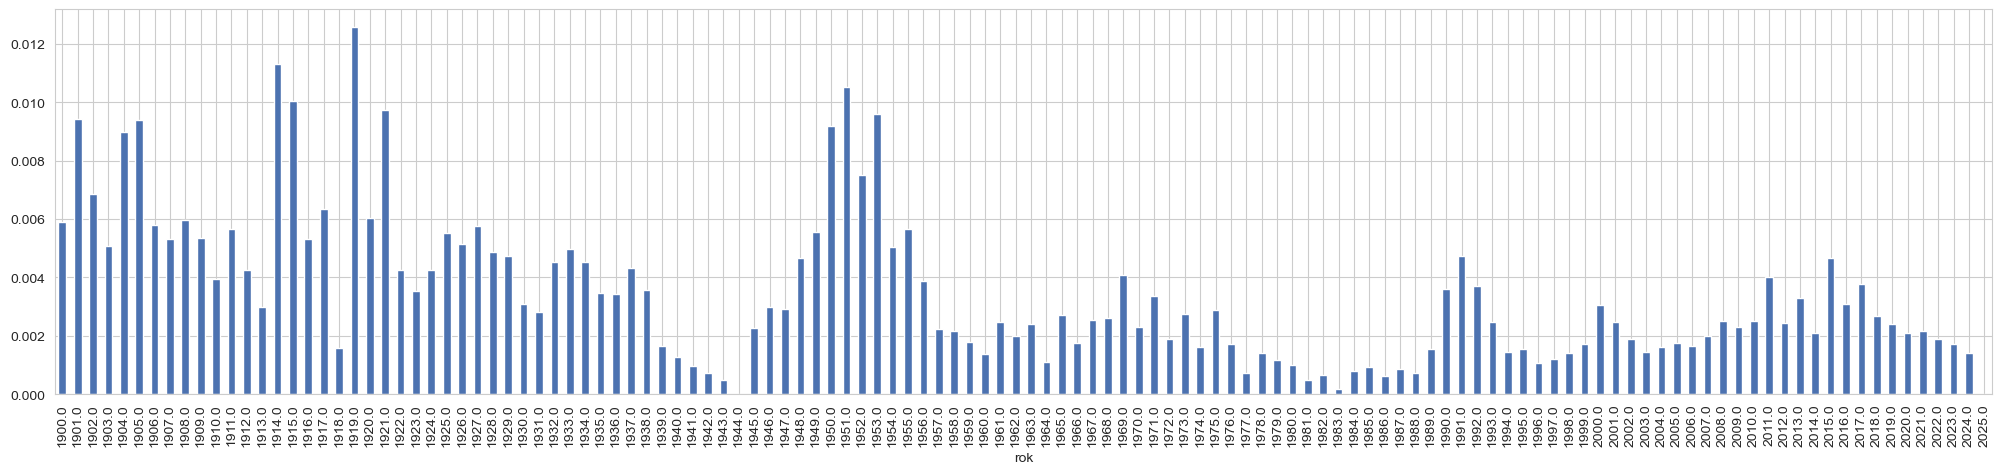

In [301]:
reformy = df2[(df2.apply(lambda row: any("reform" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()
reformy.plot.bar(figsize=(25,5))

<Figure size 640x480 with 0 Axes>

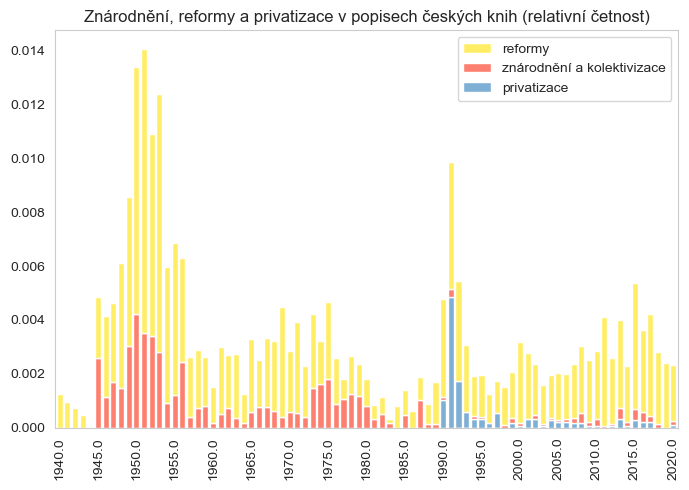

In [302]:
plt.figure()

# Set Seaborn style
sns.set_style("whitegrid", {'grid.alpha': 0.3})
sns.set_palette("deep")

# Assuming df_plot is already created as before
df_plot = pd.DataFrame({'privatizace': privatiz, 'znárodnění a kolektivizace': znarod, 'reformy': reformy}).tail(86).head(81)

# Create the stacked bar chart
ax = df_plot.plot(
    kind='bar',
    stacked=True,
    figsize=(7, 5),
    width=0.8,
    color = ["#7eb0d5", "#fd7f6f", "#ffee65"]
)
ax.grid(False)

# Customize the chart
plt.title('Znárodnění, reformy a privatizace v popisech českých knih (relativní četnost)')
plt.ylabel('')
plt.xlabel('')
plt.legend(loc='upper right', reverse=True)

# Set x-axis ticks
plt.xticks(
    [n for n in range(0, len(df_plot.index), 5)],  # Position of ticks
    [str(year) for year in df_plot.index[::5]],    # Labels for ticks
    rotation=90
)

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()

<Axes: xlabel='rok'>

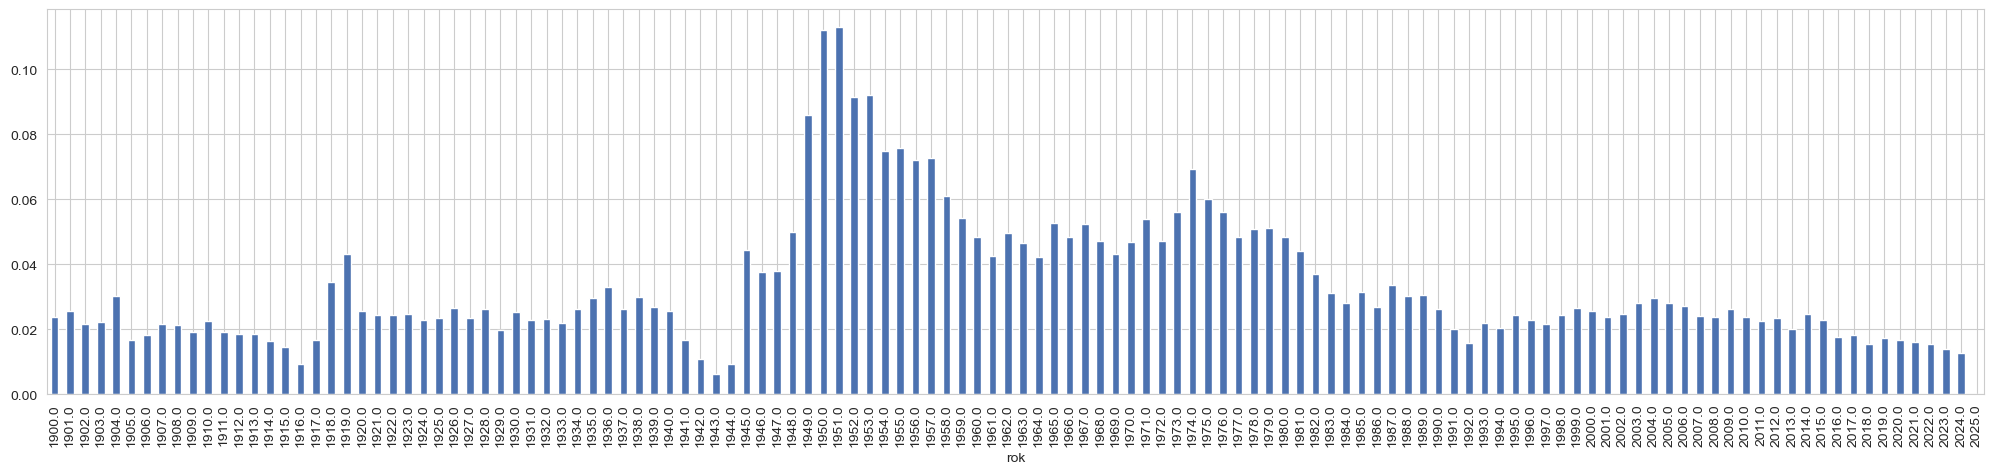

In [303]:
narod = df2[(df2.apply(lambda row: any("národ" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()
narod.plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

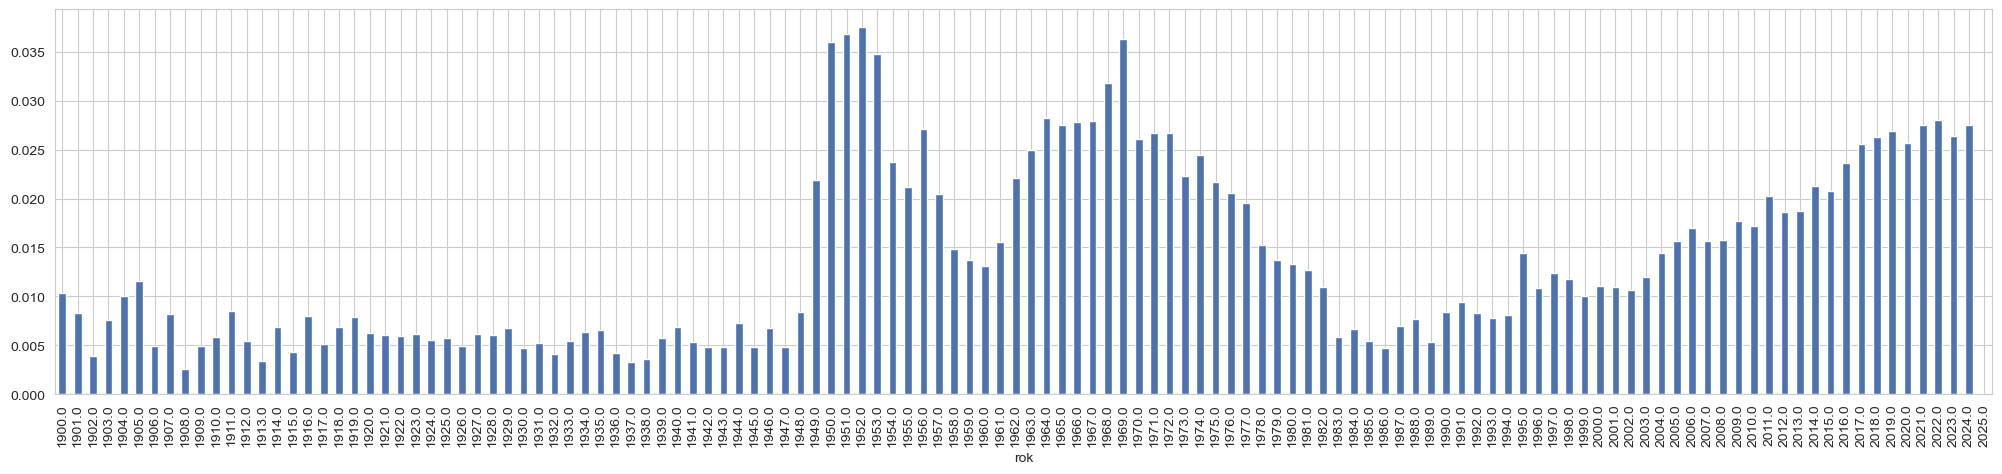

In [304]:
clovek = df2[(df2.apply(lambda row: any("člověk" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()
clovek.plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

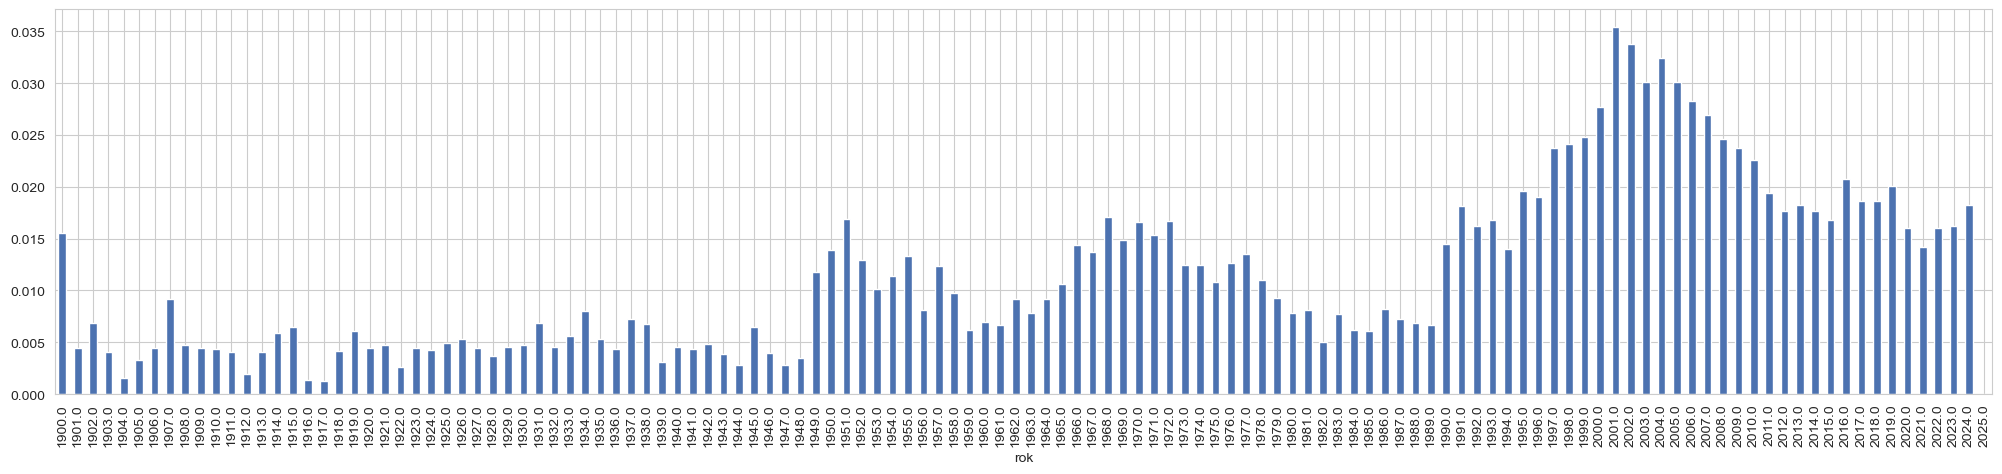

In [305]:
evrop = df2[(df2.apply(lambda row: any("evrop" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()
evrop.plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

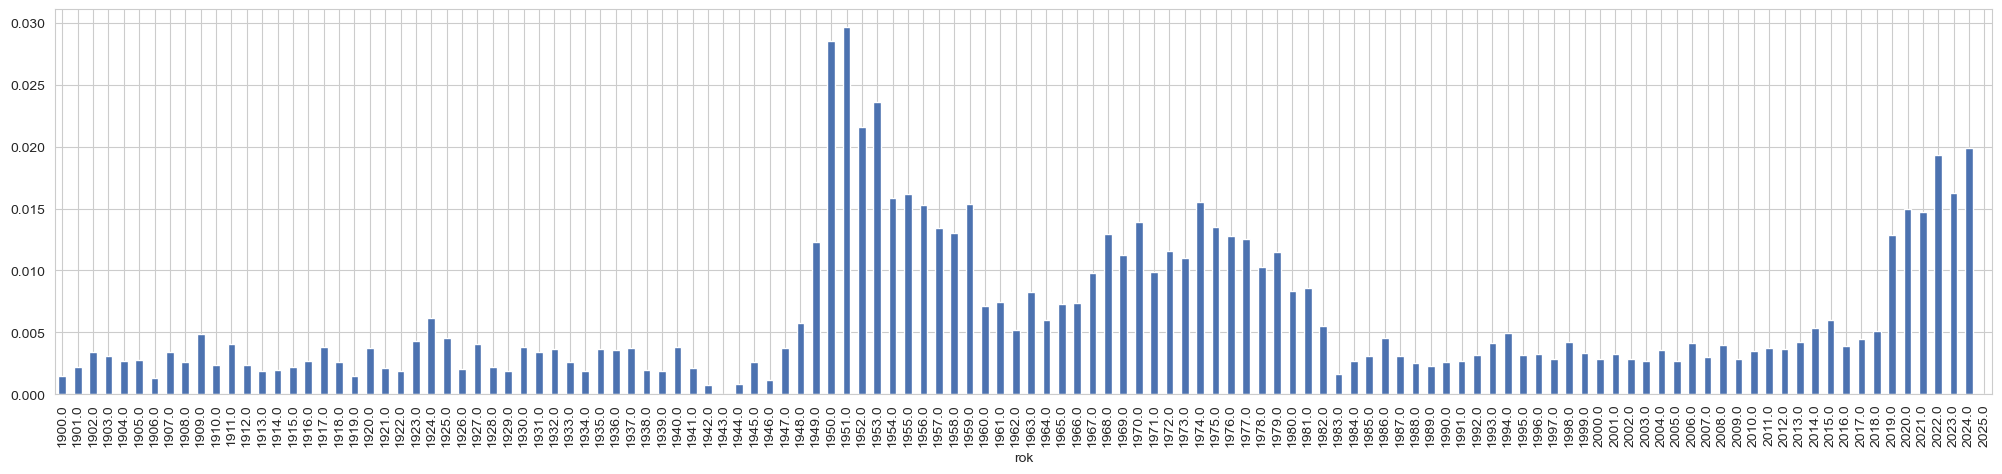

In [306]:
rodin = df2[(df2.apply(lambda row: any(" rodin" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()
rodin.plot.bar(figsize=(25,5))

<Figure size 640x480 with 0 Axes>

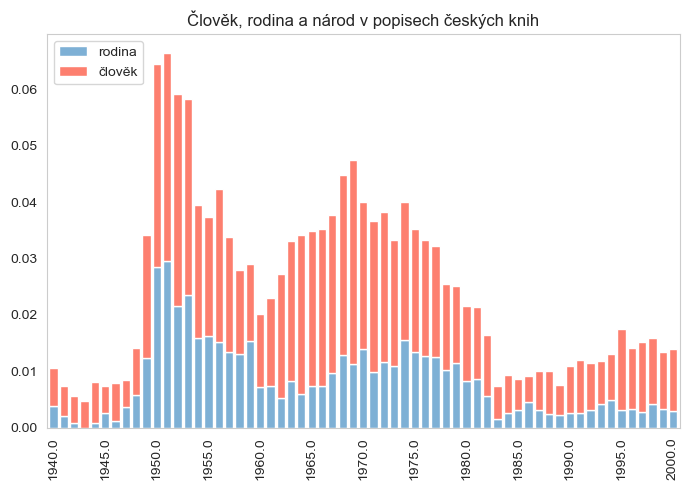

In [307]:
plt.figure()

# Set Seaborn style
sns.set_style("whitegrid", {'grid.alpha': 0.3})
sns.set_palette("deep")

# Assuming df_plot is already created as before
df_plot = pd.DataFrame({'rodina': rodin, 'člověk': clovek}).tail(86).head(61)

# Create the stacked bar chart
ax = df_plot.plot(
    kind='bar',
    stacked=True,
    figsize=(7, 5),
    width=0.8,
    color = ["#7eb0d5", "#fd7f6f", "#ffee65"]
)
ax.grid(False)

# Customize the chart
plt.title('Člověk, rodina a národ v popisech českých knih')
plt.ylabel('')
plt.xlabel('')
plt.legend(loc='upper left')

# Set x-axis ticks
plt.xticks(
    [n for n in range(0, len(df_plot.index), 5)],  # Position of ticks
    [str(year) for year in df_plot.index[::5]],    # Labels for ticks
    rotation=90
)

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()

<Axes: xlabel='rok'>

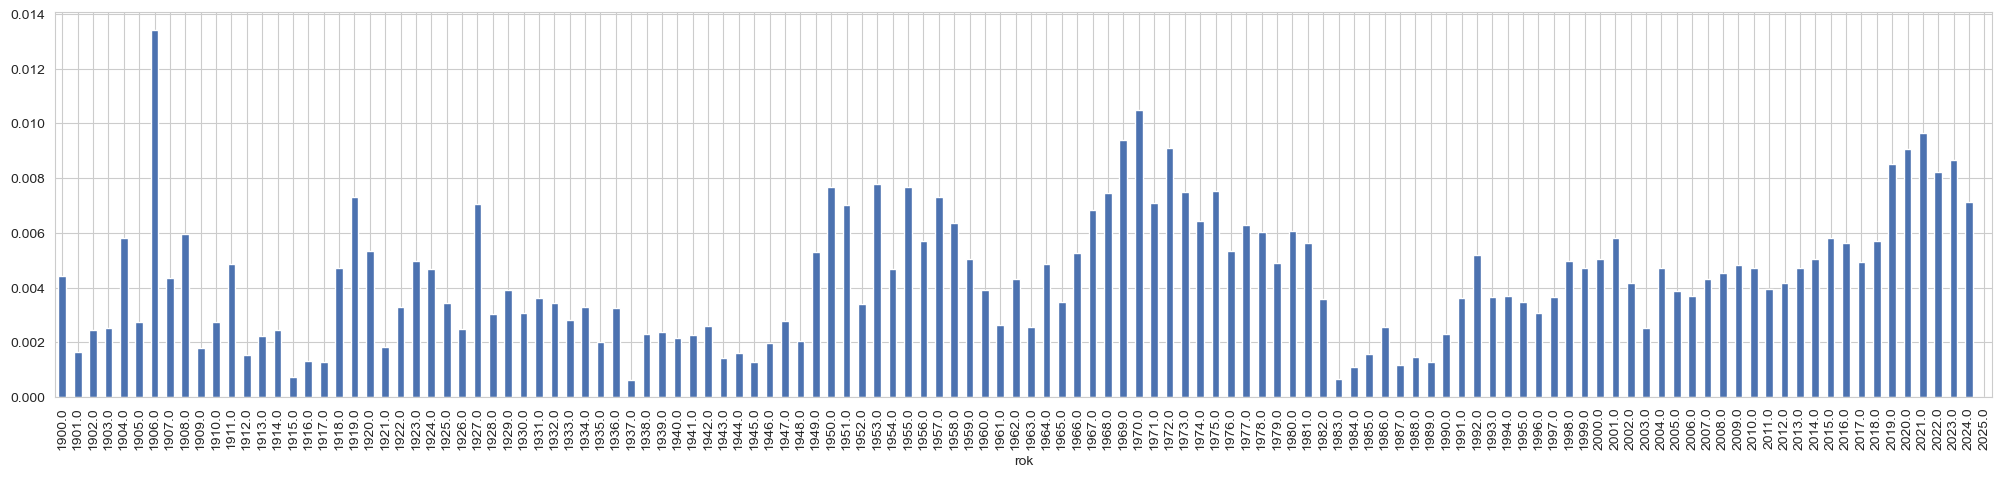

In [308]:
manzel = df2[(df2.apply(lambda row: any("manžel" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()
manzel.plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

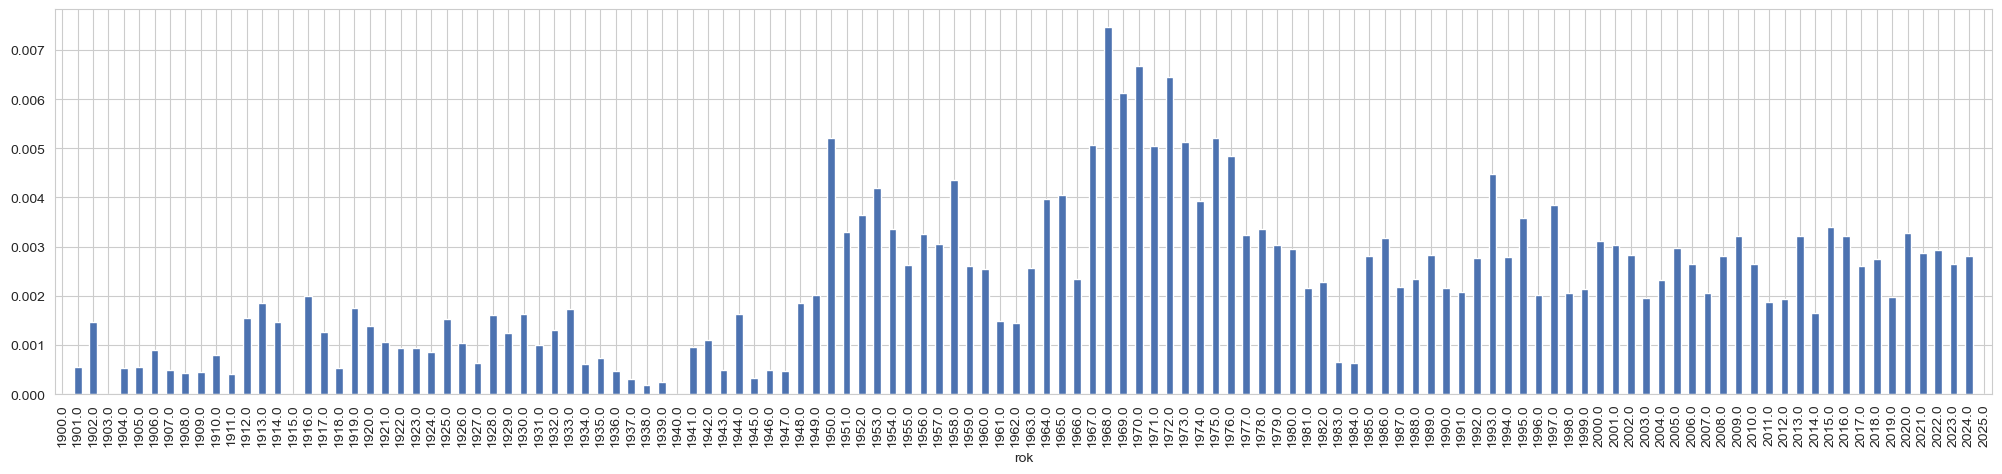

In [309]:
milen = df2[(df2.apply(lambda row: any(" milen" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()
milen.plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

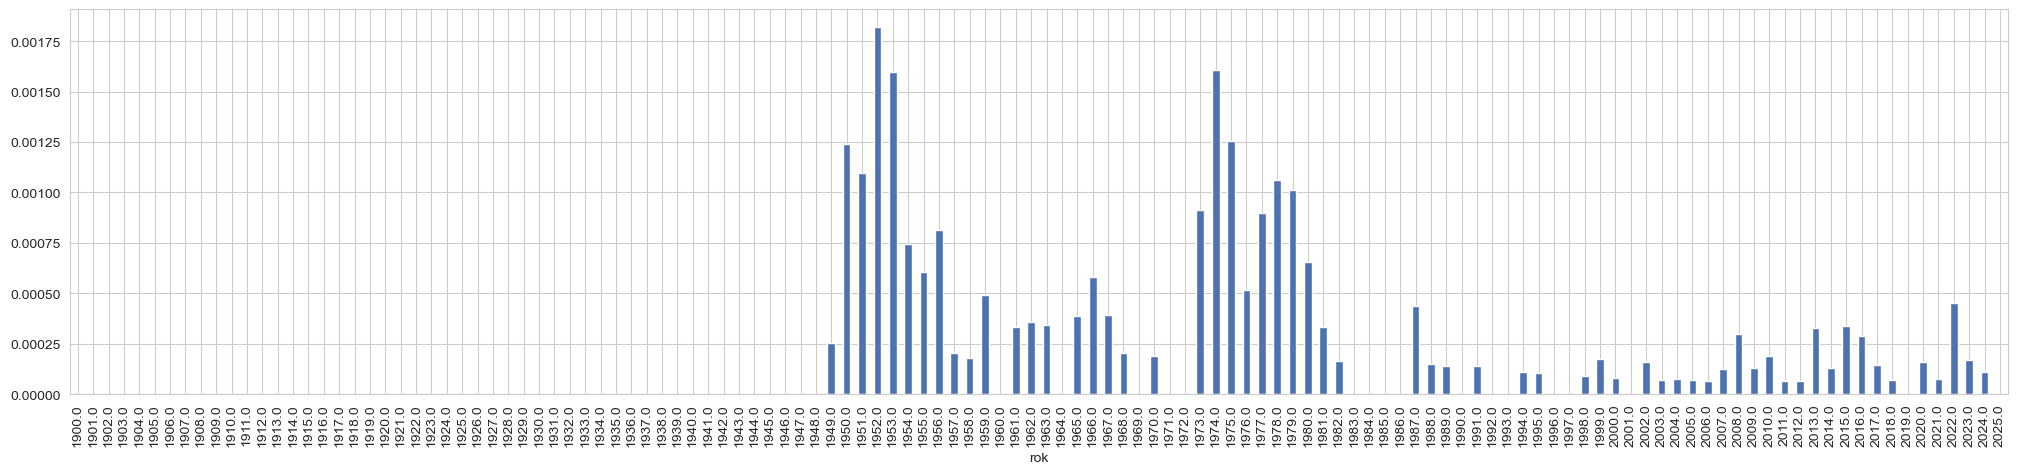

In [310]:
kolektiviz = df2[(df2.apply(lambda row: any("kolektiviz" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()
kolektiviz.plot.bar(figsize=(25,5))

In [311]:
df2[(df2.apply(lambda row: any("šumav" in str(value).lower() for value in row), axis=1))].sample(20)

,rok,072_x,245_a,245_c,520_a,650_a,653_a,655_a,964_a
001,,,,,,,,,
nkc20223447262,2022.0,['Dějiny Česka a Slovenska'],Osudy ze šumavských chalup /,Jan Voldřich,nan,['každodenní život' 'historický místopis' 'ven...,None,['populárně-naučné publikace' 'vzpomínky' 'pop...,None
nkc20112165909,1900.0,['České drama'],Šumavský pytlák :,napsal A.B. Šťastný,nan,None,None,['česká dramata'],None
nkc20122431533,2012.0,['Folklor. Lidové tradice'],"Jihočeské Vánoce - vánoční písně, koledy, obyč...",Lubomír Tyllner,nan,['vánoční zvyky' 'lidové zvyky' 'vánoční písně...,None,['monografie' 'písně' 'prameny' 'monographs' '...,None
cpk20193163856,2006.0,['Česká próza'],Úsměvy z našeho Pošumaví /,Milan Pokorný ; [ilustrace Martin Sekyra],nan,None,None,['české příběhy' 'humoristické příběhy' 'české...,None
cpk20162787057,2005.0,"['Geografie Evropy, reálie, cestování' 'Biogra...","Šumava, má láska /",Karel Neumann,nan,None,None,['autobiografické vzpomínky'],None
cpk20162785636,1928.0,['České drama'],Štědrý večer opuštěného dítka :,napsal Ant. Svoboda-Pošumavský,nan,None,None,['česká dramata'],None
bk194901231,1948.0,None,Pašijové hry v Hořicích na Šumavě ;,"Bohumír Janoušek ; Mapa: Max Šilha, Antonín Ho...",nan,None,None,None,['Povltaví horní - průvodce' 'Hořice na Šumavě...
bk195202152,1952.0,None,V cizině a doma /,M. Kondrašovová a I. Ťurin ; Přel. Josef Šumav...,['Vyprávění o životě a práci v Leninově kolcho...,None,None,None,['Kolchozy - vyprávění']
bk193801287,1938.0,None,V klínu pravěké Šumavy /,Mir. Hrdlička ; ilustrace Frant. Sobotky,nan,None,None,None,None


<Axes: xlabel='rok'>

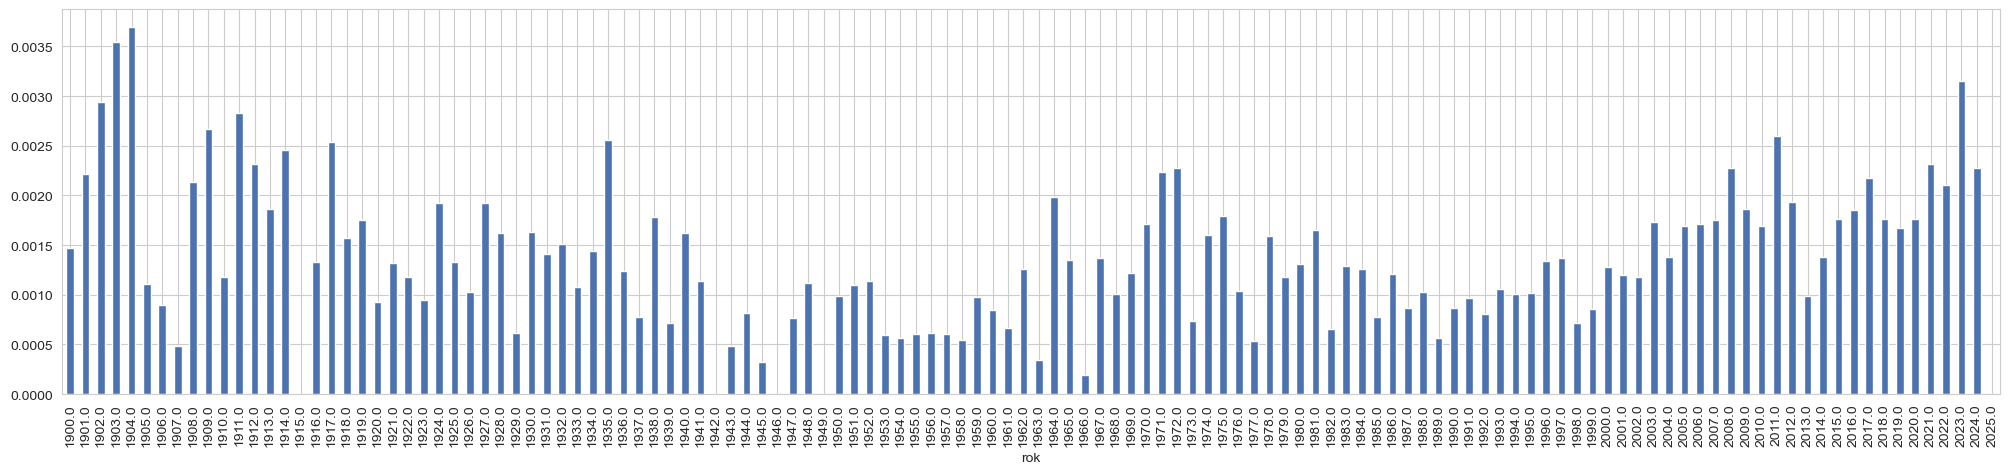

In [312]:
sumav = df2[(df2.apply(lambda row: any("šumav" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()
sumav.plot.bar(figsize=(25,5))

<Figure size 640x480 with 0 Axes>

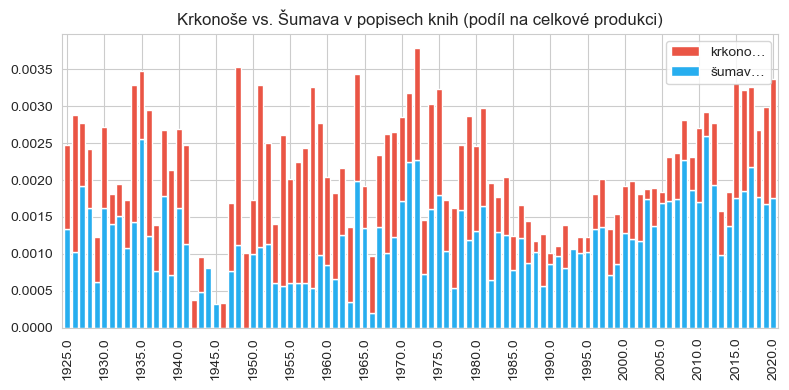

In [313]:
plt.figure()

# Set Seaborn style
# sns.set_style("whitegrid", {'grid.alpha': 0.3})
sns.set_palette("deep")

# Assuming df_plot is already created as before
df_plot = pd.DataFrame({'šumav…': sumav, 'krkono…': krkono}).tail(101).head(96)

# Create the stacked bar chart
ax = df_plot.plot(
    kind='bar',
    stacked=True,
    figsize=(8, 4),
    width=0.8,
    color = ['#27aeef', '#ea5545','#ef9b20']
)
# ax.grid(False)

# Customize the chart
plt.title('Krkonoše vs. Šumava v popisech knih (podíl na celkové produkci)')
plt.ylabel('')
plt.xlabel('')
plt.legend(loc="upper right", reverse=True)

# Set x-axis ticks
plt.xticks(
    [n for n in range(0, len(df_plot.index), 5)],  # Position of ticks
    [str(year) for year in df_plot.index[::5]],    # Labels for ticks
    rotation=90
)

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()

<Axes: xlabel='rok'>

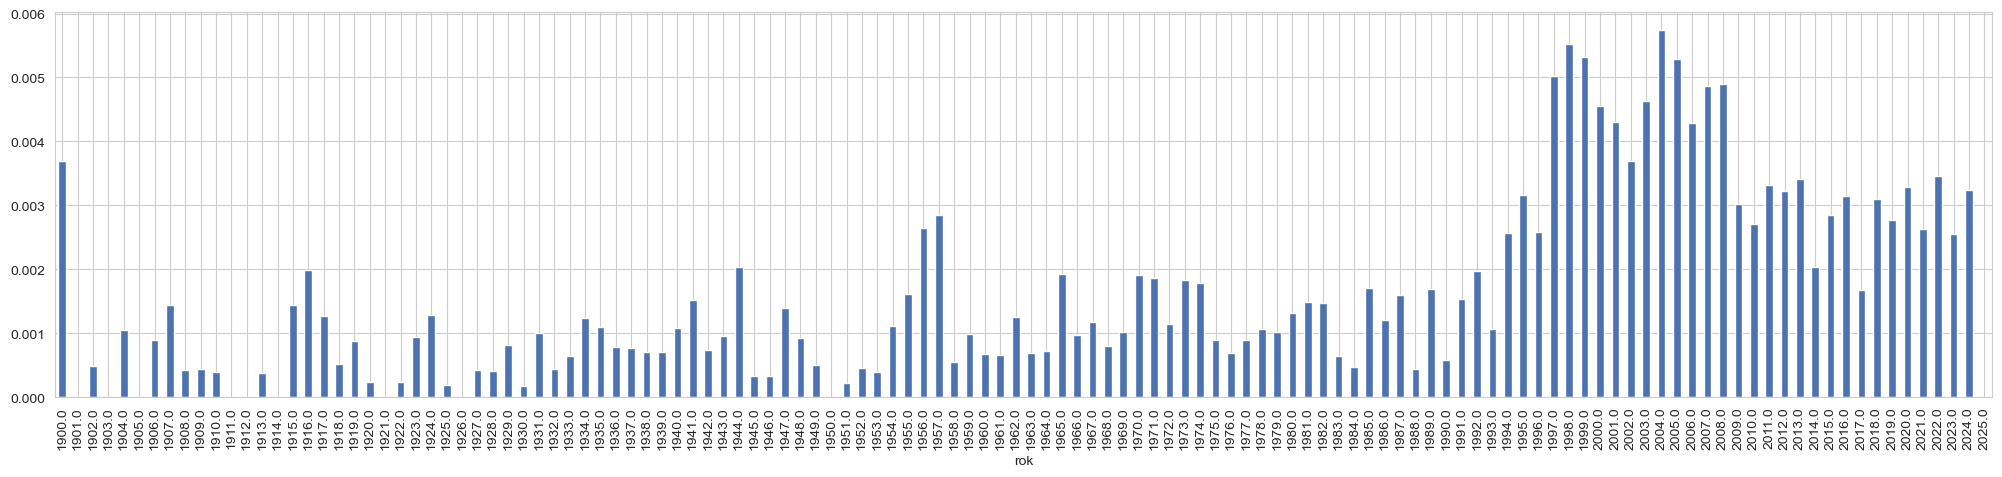

In [314]:
zahradkar = df2[(df2.apply(lambda row: any("zahrádkář" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()
zahradkar.plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

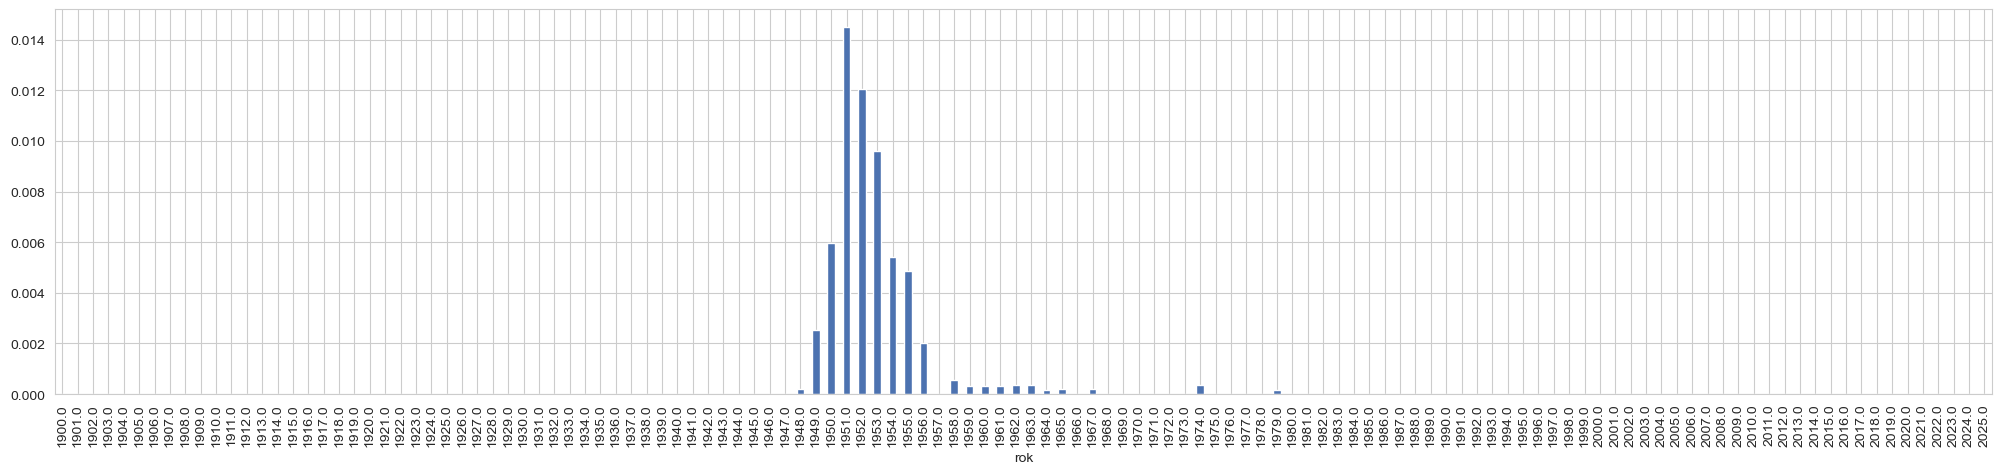

In [315]:
kolchozn = df2[(df2.apply(lambda row: any("kolchozn" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()
kolchozn.plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

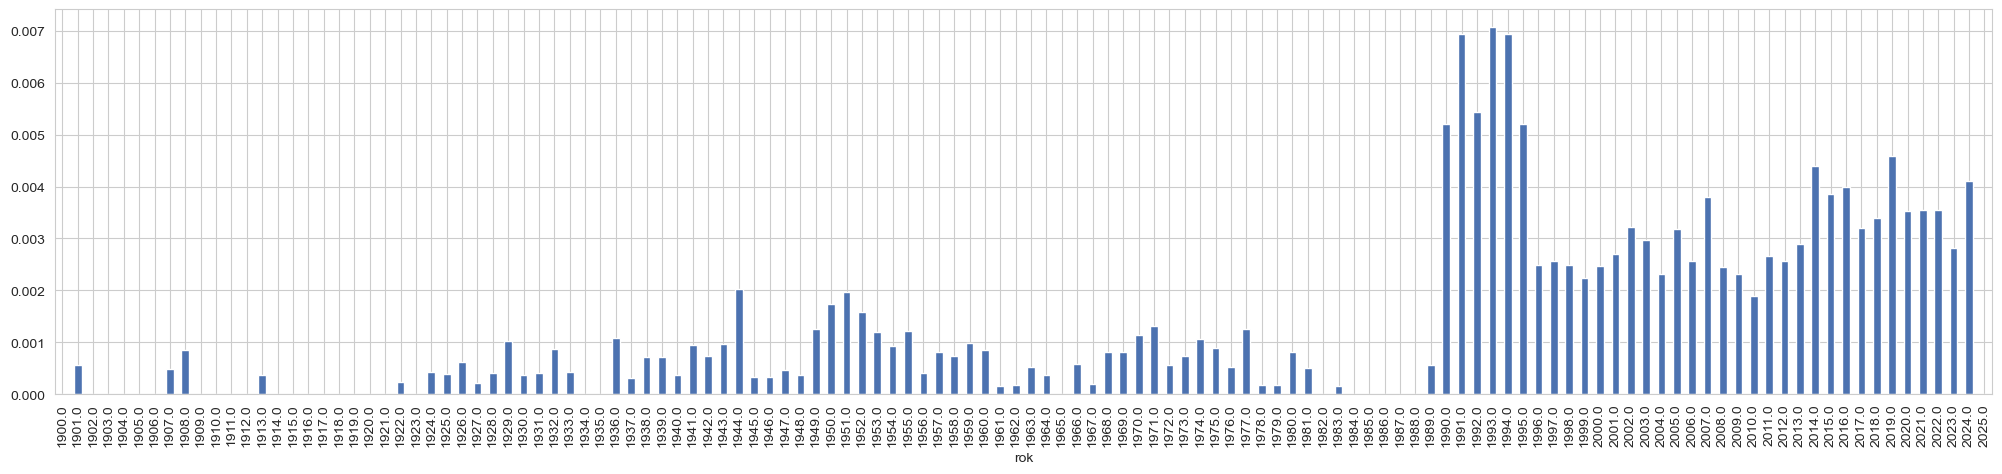

In [316]:
podnikatel = df2[(df2.apply(lambda row: any("podnikatel" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()
podnikatel.plot.bar(figsize=(25,5))

In [317]:
zhub = df2[(df2.apply(lambda row: any("zhubnout" in str(value).lower() for value in row), axis=1)) | (df2.apply(lambda row: any("junák" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()
prib = df2[(df2.apply(lambda row: any("přibrat" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()

<Figure size 640x480 with 0 Axes>

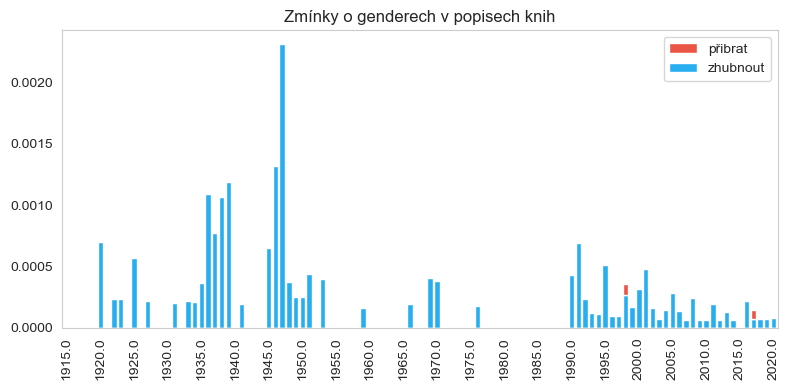

In [318]:
plt.figure()

# Set Seaborn style
# sns.set_style("whitegrid", {'grid.alpha': 0.3})
sns.set_palette("deep")

# Assuming df_plot is already created as before
df_plot = pd.DataFrame({'zhubnout': zhub, 'přibrat': prib}).tail(111).head(106)

# Create the stacked bar chart
ax = df_plot.plot(
    kind='bar',
    stacked=True,
    figsize=(8, 4),
    width=0.8,
    color = ['#27aeef', '#ea5545','#ef9b20']
)
ax.grid(False)

# Customize the chart
plt.title('Zmínky o genderech v popisech knih')
plt.ylabel('')
plt.xlabel('')
plt.legend(loc="upper right", reverse=True)

# Set x-axis ticks
plt.xticks(
    [n for n in range(0, len(df_plot.index), 5)],  # Position of ticks
    [str(year) for year in df_plot.index[::5]],    # Labels for ticks
    rotation=90
)

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()

In [319]:
zbohatn = df2[(df2.apply(lambda row: any("zbohatn" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()

<Axes: xlabel='rok'>

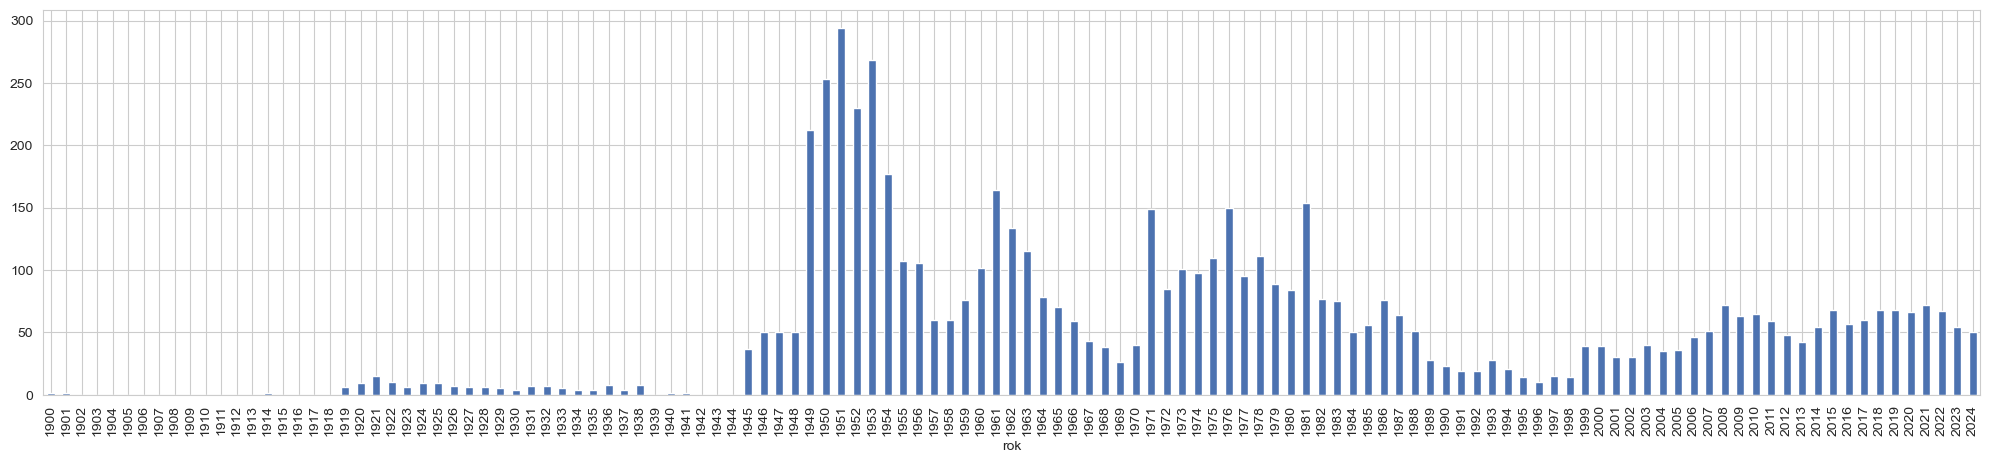

In [320]:
r(df2[df2.apply(lambda row: any("komunis" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

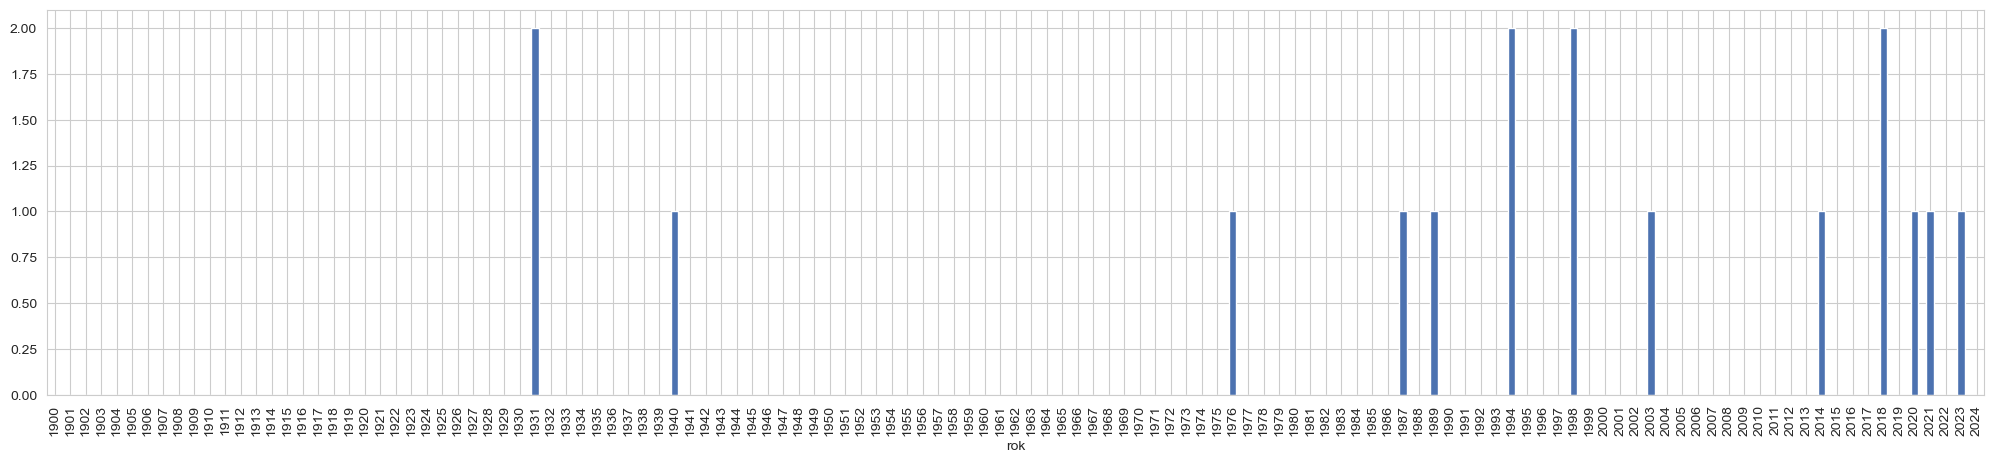

In [321]:
r(df2[df2.apply(lambda row: any("baseball" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

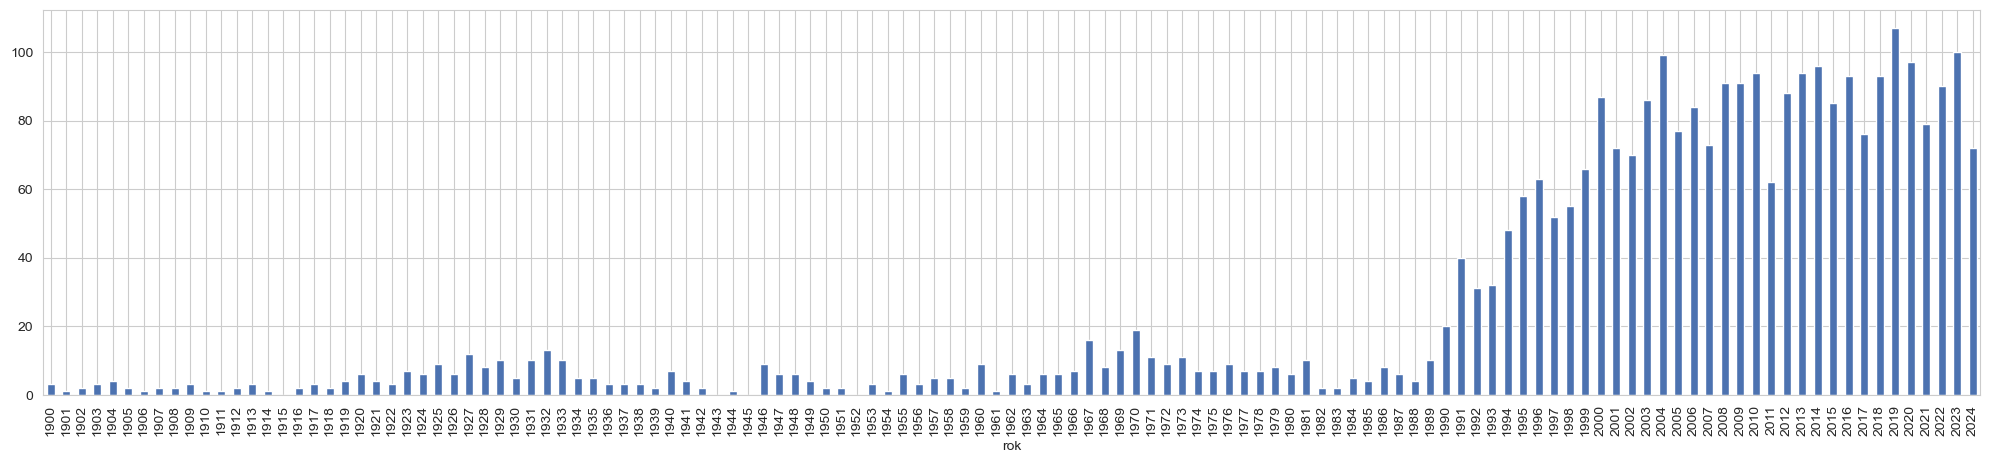

In [322]:
r(df2[df2.apply(lambda row: any("sex" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

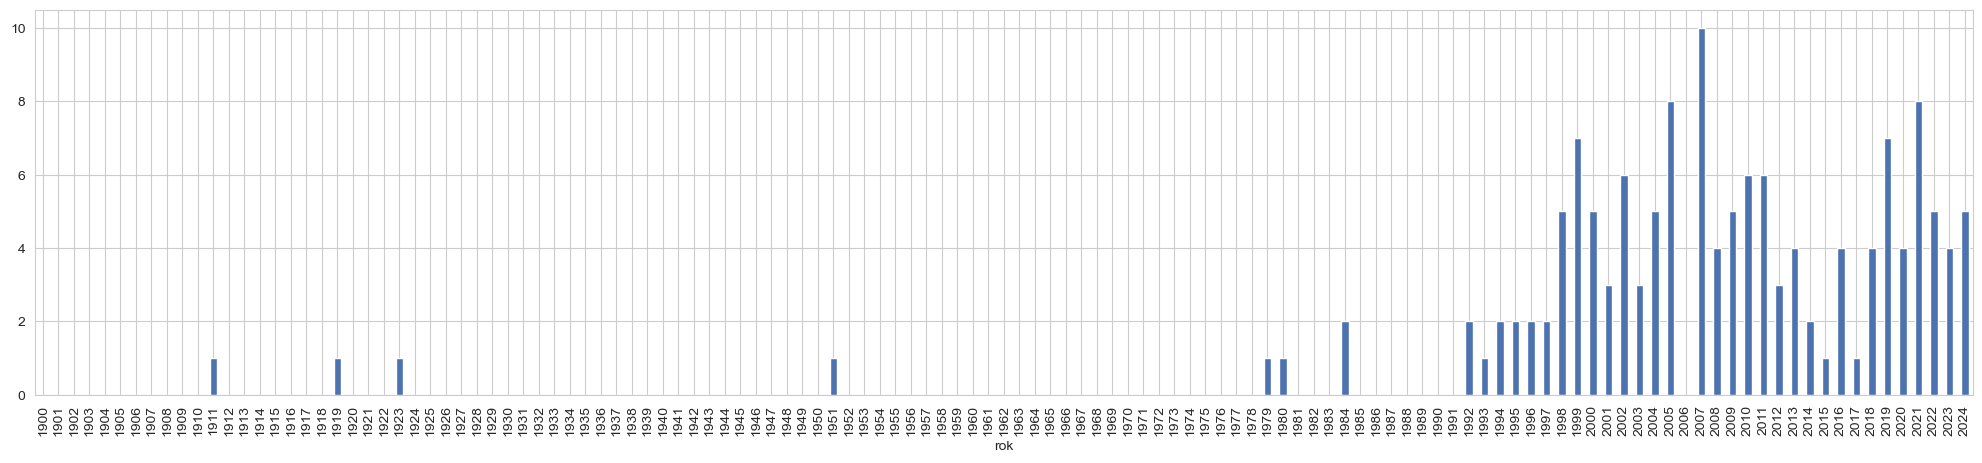

In [323]:
r(df2[df2.apply(lambda row: any("feminism" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

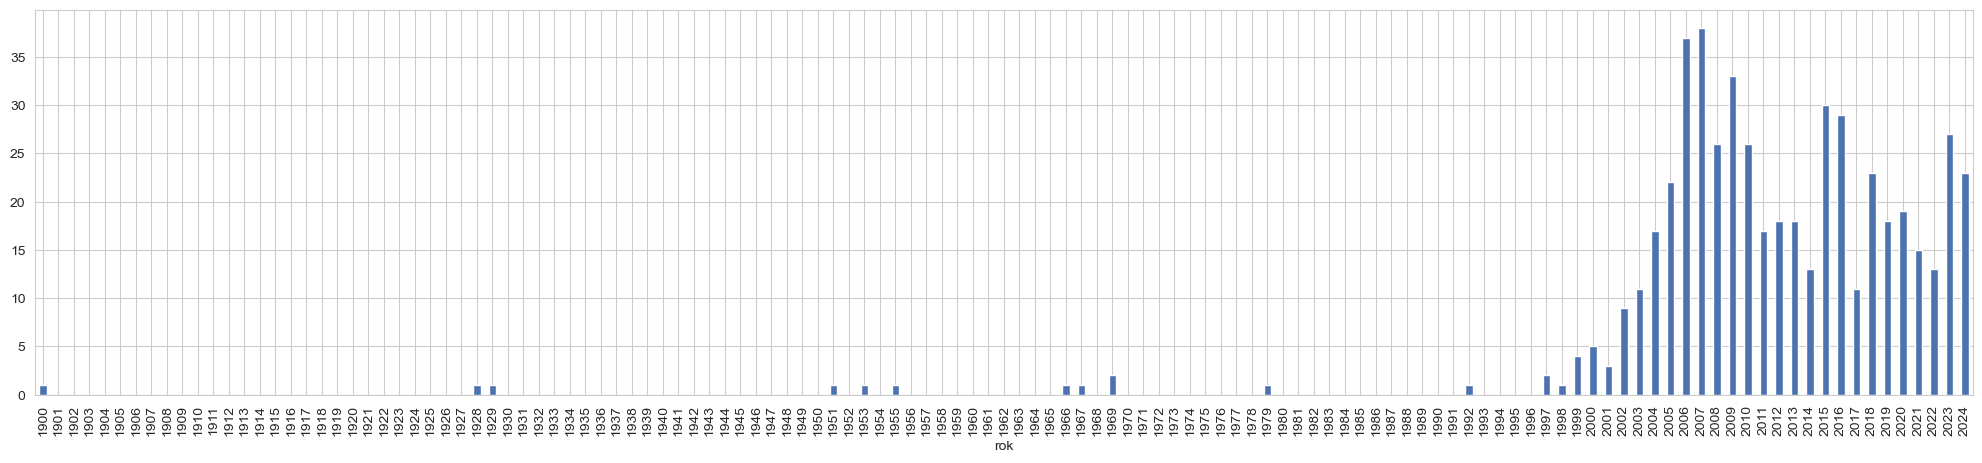

In [324]:
r(df2[df2.apply(lambda row: any("gender" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

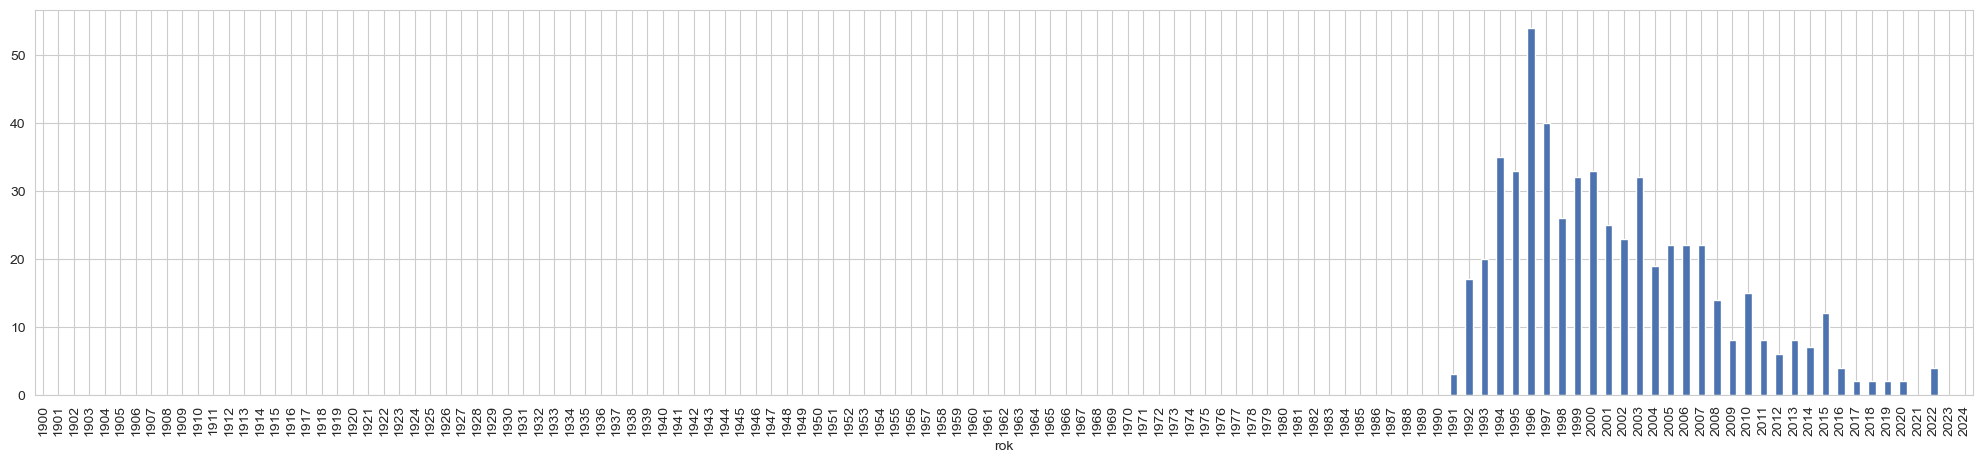

In [325]:
r(df2[df2.apply(lambda row: any("Windows" in str(value) for value in row), axis=1)])

<Axes: xlabel='rok'>

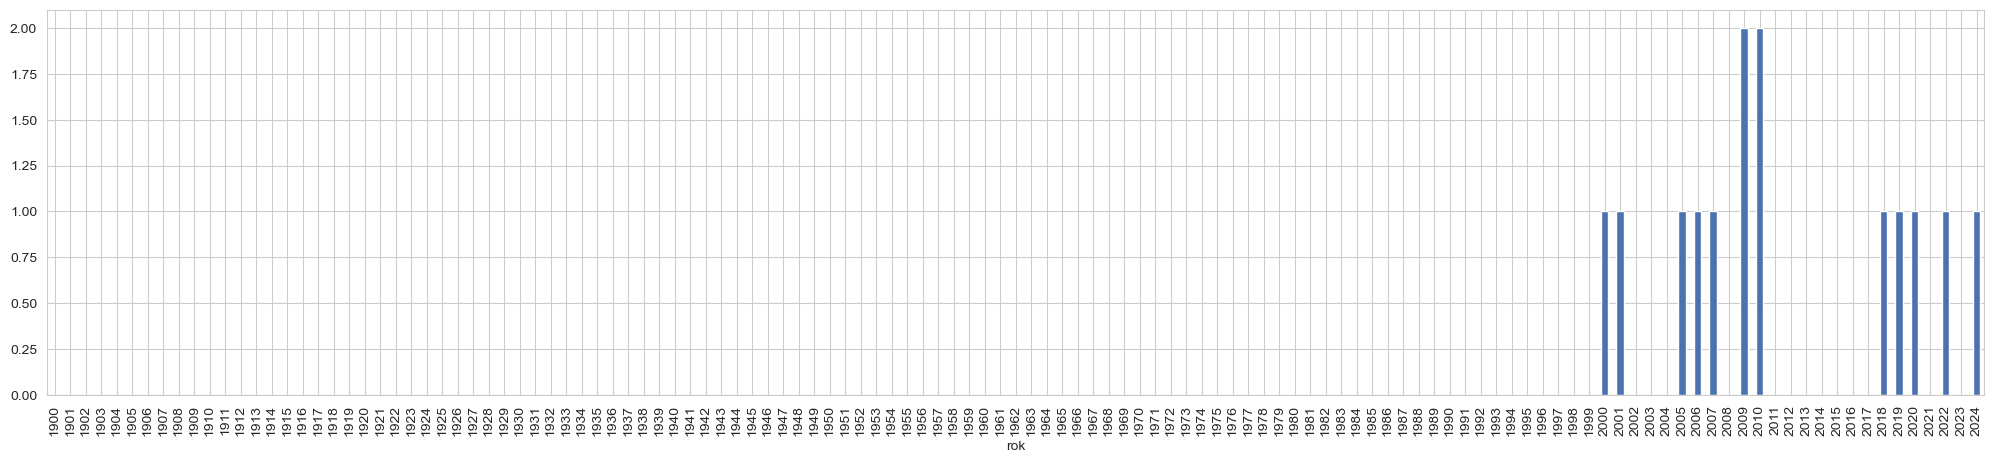

In [326]:
r(df2[df2.apply(lambda row: any("florbal" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

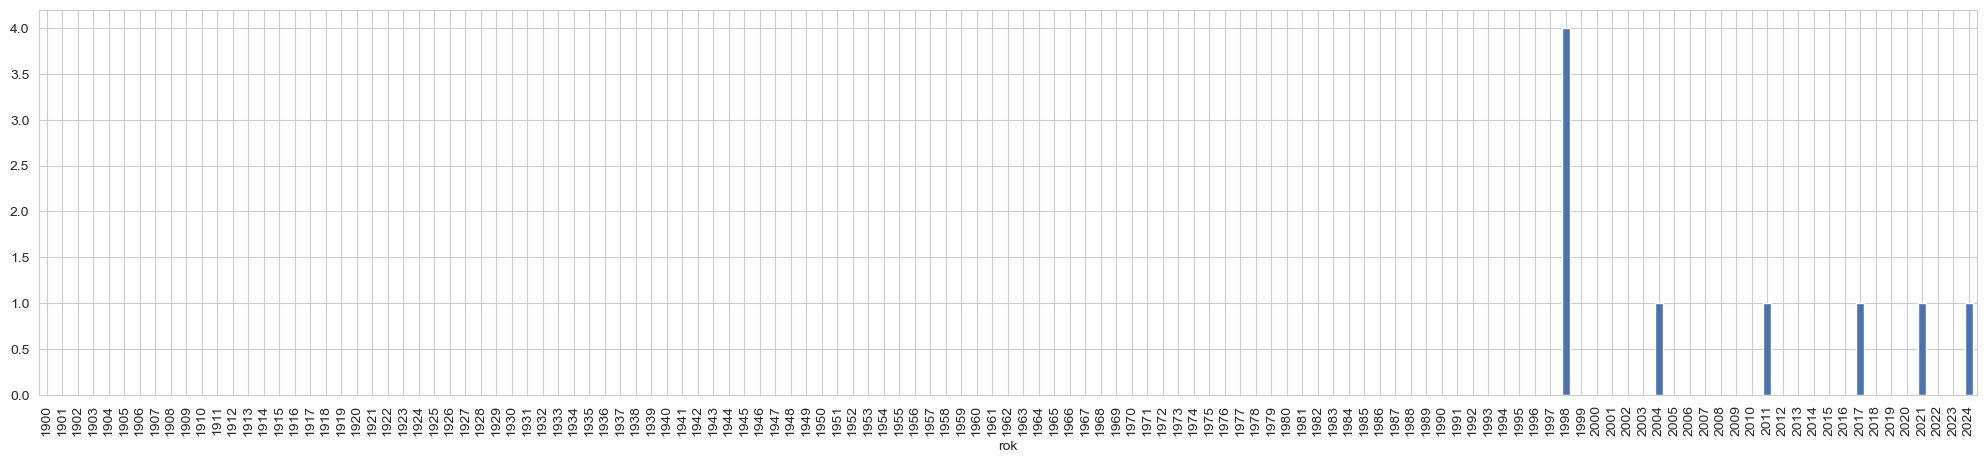

In [327]:
r(df2[df2.apply(lambda row: any("Nagan" in str(value) for value in row), axis=1)])

<Axes: xlabel='rok'>

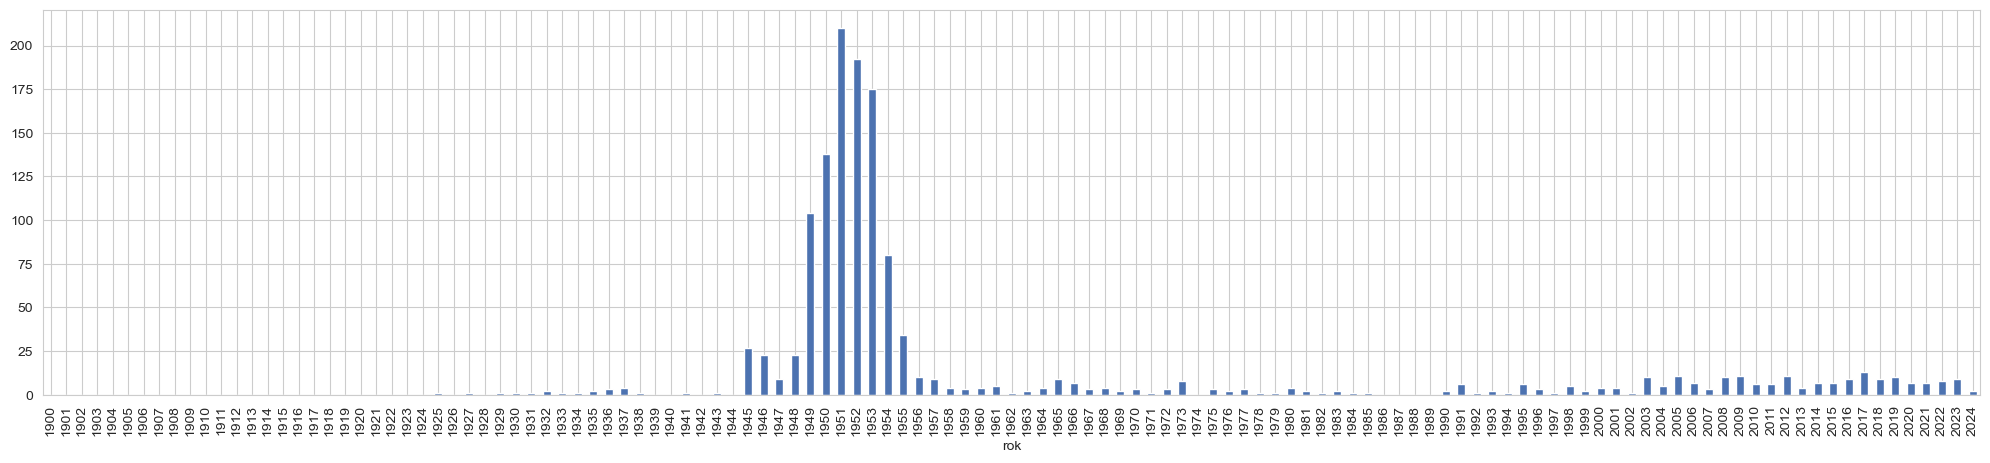

In [328]:
r(df2[df2.apply(lambda row: any("Stalin" in str(value) for value in row), axis=1)])

<Axes: xlabel='rok'>

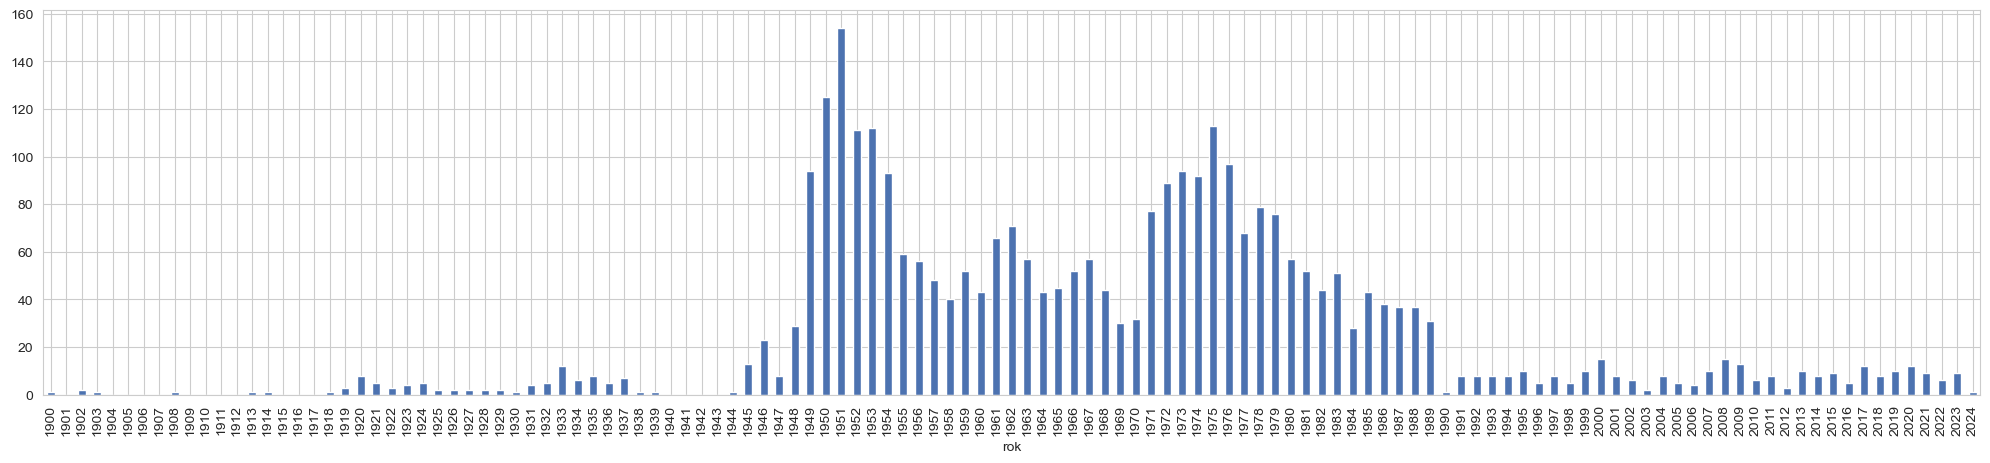

In [329]:
r(df2[df2.apply(lambda row: any("marx" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

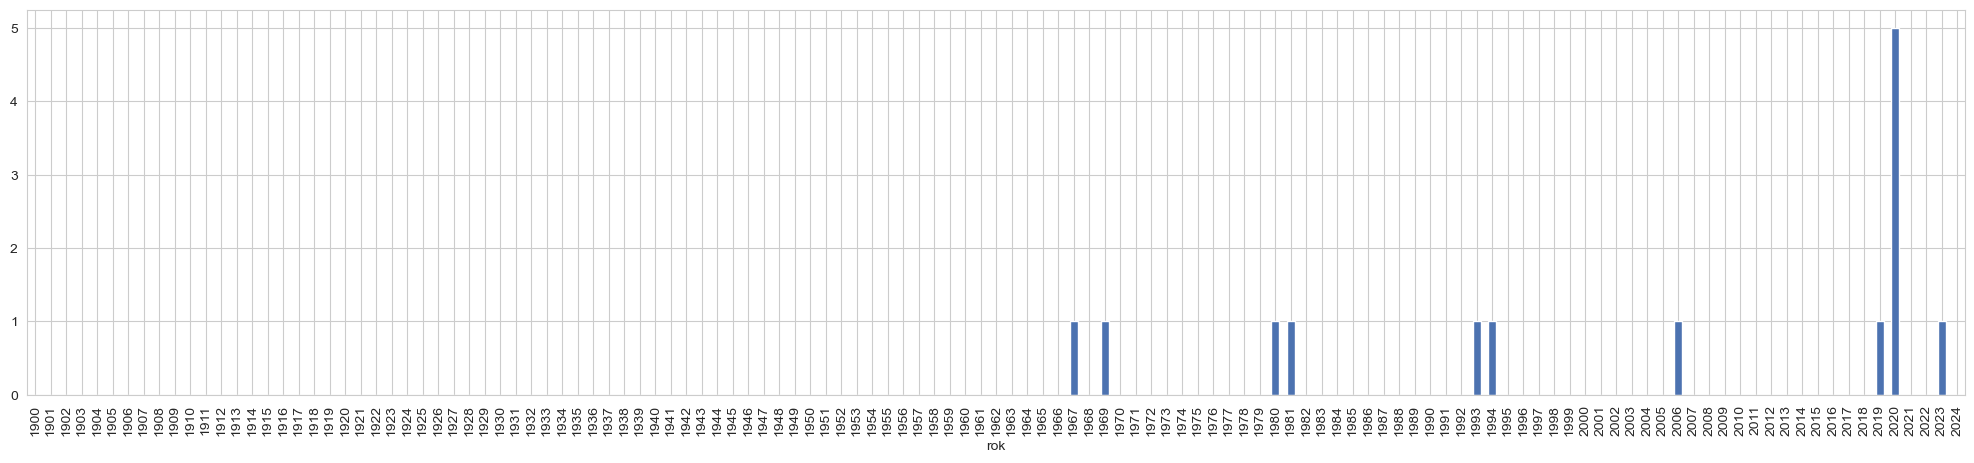

In [330]:
r(df2[df2.apply(lambda row: any("Pelé" in str(value) for value in row), axis=1)])

<Axes: xlabel='rok'>

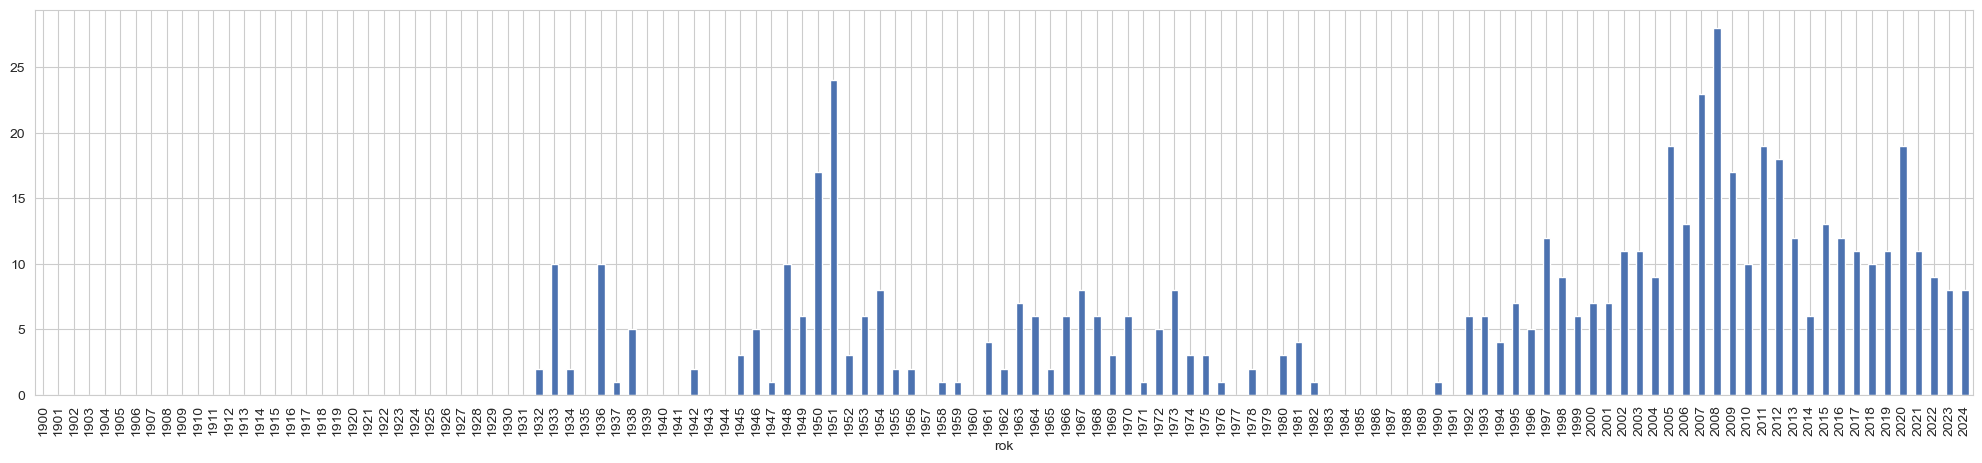

In [331]:
r(df2[df2.apply(lambda row: any("Hitler" in str(value) for value in row), axis=1)])

<Axes: xlabel='rok'>

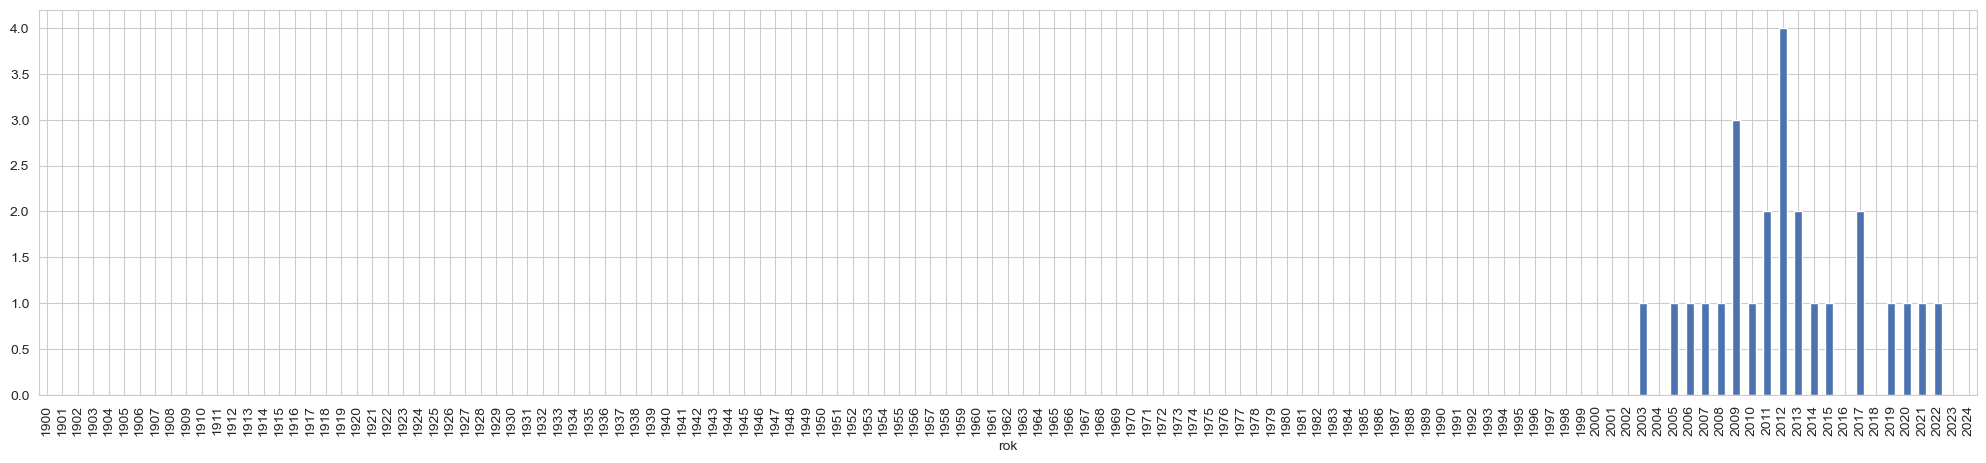

In [332]:
r(df2[df2.apply(lambda row: any("Google" in str(value) for value in row), axis=1)])